In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
# from datetime import datetime
from torch.utils.data import Dataset, DataLoader
import torch
# from distutils.util import strtobool
import random

# from scipy.stats import norm
# import torch.optim as optim
# import torch.nn as nn
from tqdm import tqdm
import pandas as pd

# This is just until temporary implementation
import os 
import sys
cwd = os.getcwd()
sys.path.insert(0,cwd + '/../timetransformers')

from data_handling import TimeSeriesDataset, download_data
from utils import convert_df_to_numpy, convert_tsf_to_dataframe

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [22]:
# "pedestrian_counts_dataset": "10.5281/zenodo.4656626",
# "bitcoin_dataset_without_missing_values": "10.5281/zenodo.5122101",
# "dominick_dataset": "10.5281/zenodo.4654802",
# "covid_mobility_dataset_without_missing_values": "10.5281/zenodo.4663809",
# "kdd_cup_2018_dataset_without_missing_values": "10.5281/zenodo.4656756",
# "covid_deaths_dataset": "10.5281/zenodo.4656009",
# "us_births_dataset": "10.5281/zenodo.4656049",

# "m4_daily_dataset": "10.5281/zenodo.4656548", ### Has large cliffs in the data
# "m4_weekly_dataset": "10.5281/zenodo.4656522", ### Has large cliffs in the data
# "m4_monthly_dataset": "10.5281/zenodo.4656480", ### Has large cliffs in the data
# "m4_quarterly_dataset": "10.5281/zenodo.4656410", ### Has large cliffs in the data
# "m4_yearly_dataset": "10.5281/zenodo.4656379", ### Has large cliffs in the data
# "electricity_hourly_dataset": "10.5281/zenodo.4656140", ### Has large cliffs in the data
# "tourism_yearly_dataset": "10.5281/zenodo.4656103", ### Too small
# "car_parts_dataset_without_missing_values": "10.5281/zenodo.4656021", ### Basically delta functions
# "weather_dataset": "10.5281/zenodo.4654822", ### Some parts are basically delta functions
# "temperature_rain_dataset_without_missing_values": "10.5281/zenodo.5129091", ### Some parts are basically delta functions
# "saugeenday_dataset": "10.5281/zenodo.4656058", ### Small with fairly large deviation
# "rideshare_dataset_without_missing_values": "10.5281/zenodo.5122232", ### Has large cliffs in the data
# "vehicle_trips_dataset_without_missing_values": "10.5281/zenodo.5122537", ### Very noisy and small
# "kaggle_web_traffic_weekly_dataset": "10.5281/zenodo.4656664", ### Huge spikes

# "wind_farms_minutely_dataset_without_missing_values": "10.5281/zenodo.4654858", ### Crazy deviations but very large dataset # 172,178,060 tokens
# "london_smart_meters_dataset_with_missing_values": "10.5281/zenodo.4656072", ### Large deviations but large dataset # 166,528,896 tokens
# "kaggle_web_traffic_dataset_without_missing_values": "10.5281/zenodo.4656075", ### Large deviations but large dataset # 116,485,589 tokens


datasets_to_load = {
    "kaggle_web_traffic_dataset_without_missing_values": "10.5281/zenodo.4656075",
}
dfs = download_data(datasets_to_load)

# Tested datasets
# electricity_hourly_dataset
# traffic_hourly_dataset


# New datasets
# traffic_weekly_dataset ########################Small dataset
# solar_4_seconds_dataset
# solar_weekly_dataset
# solar_10_minutes_dataset
# wind_4_seconds_dataset
# oikolab_weather_dataset
# nn5_weekly_dataset ########################Small dataset
# nn5_daily_dataset_without_missing_values ########################Small dataset
# cif_2016_dataset ########################Small dataset
# fred_md_dataset ########################Small dataset
# hospital_dataset ########################Small dataset
# m4_hourly_dataset
# electricity_weekly_dataset
# australian_electricity_demand_dataset
# tourism_monthly_dataset ########################Fairly small
# tourism_quarterly_dataset ########################Small dataset
# elecdemand_dataset ########################Small dataset
# sunspot_dataset_without_missing_values ########################Small dataset and they have filled in missing values using LOCF
# "wind_4_seconds_dataset": "10.5281/zenodo.4656032", ########################Might be challenging: has many flat lines and steep cliffs


(
    training_data_list,
    test_data_list,
    train_masks,
    test_masks,
) = convert_df_to_numpy(dfs, 0.95)

kaggle_web_traffic_dataset_without_missing_values.tsf already exists. Skipping download.


In [23]:
# for data in dfs[0]["series_value"]:
#     print(data[-1000:])
# #     # plt.plot(data)
# # plt.show()

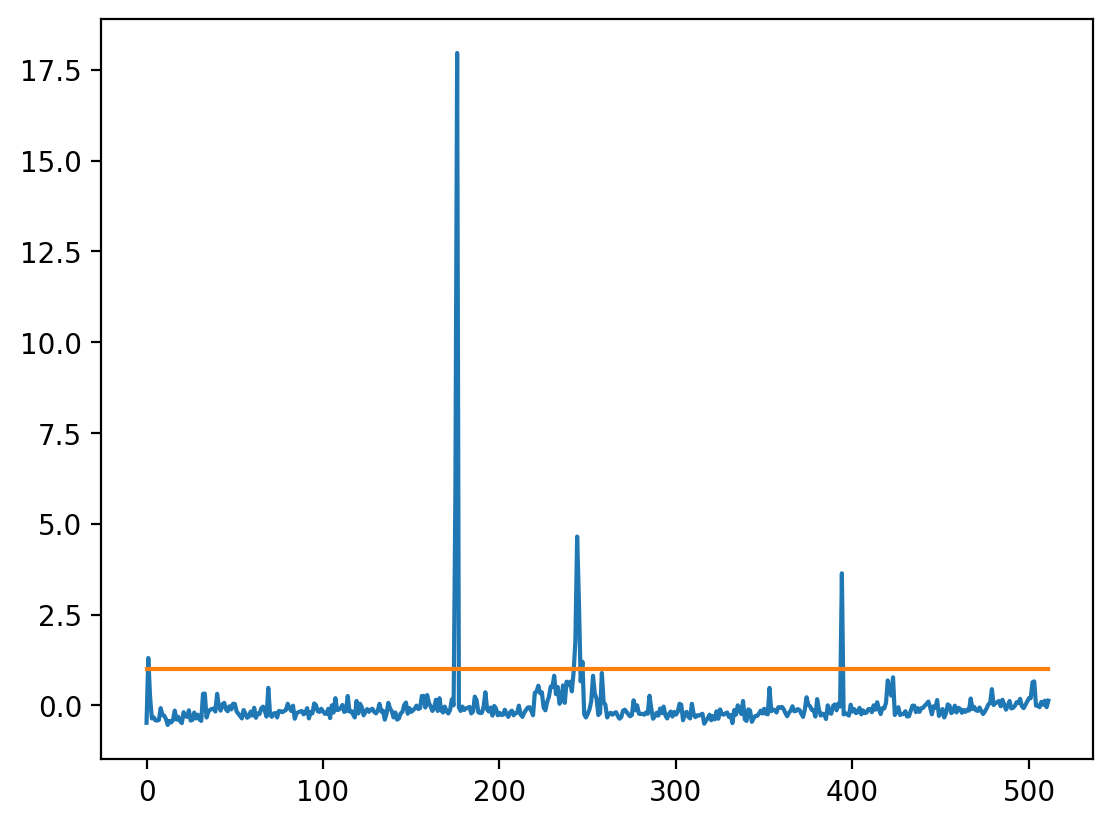

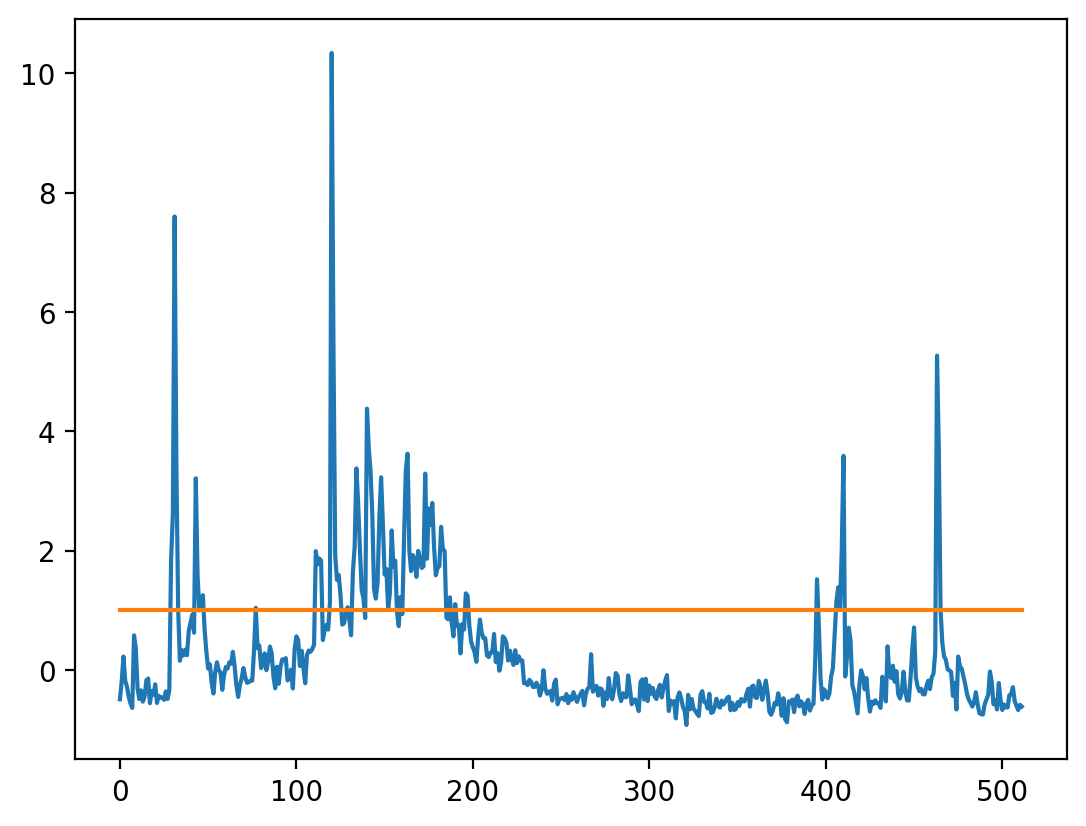

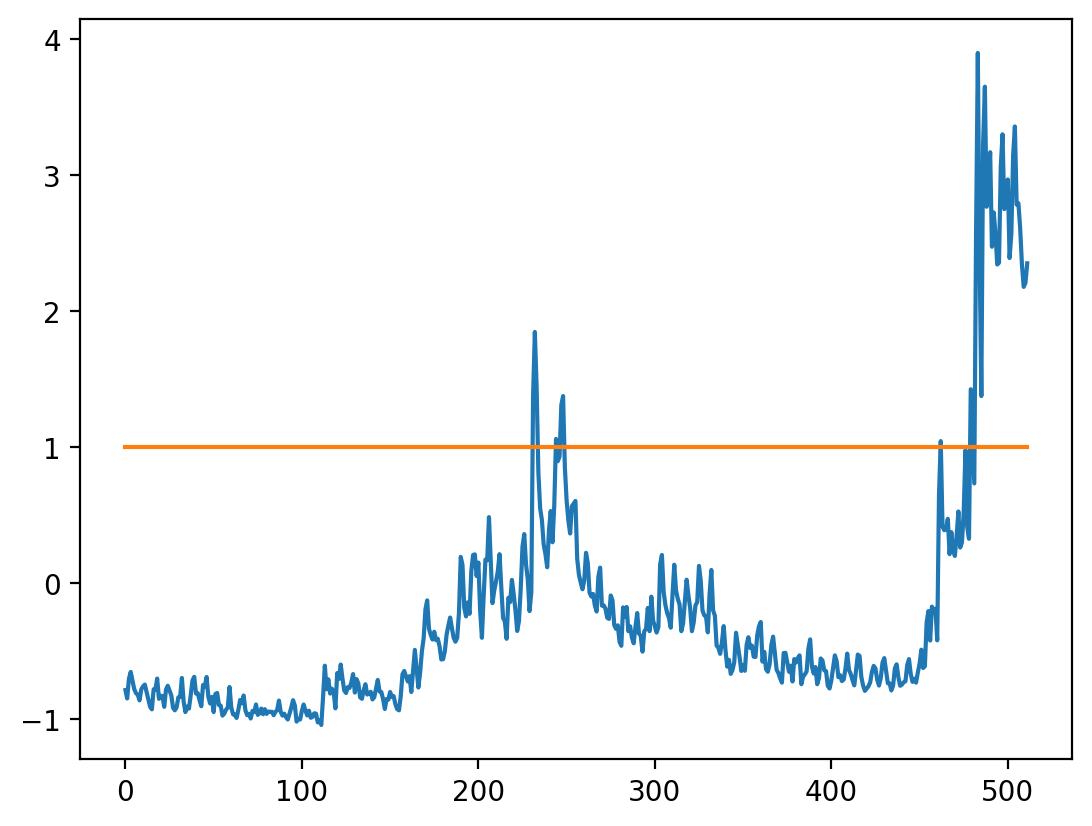

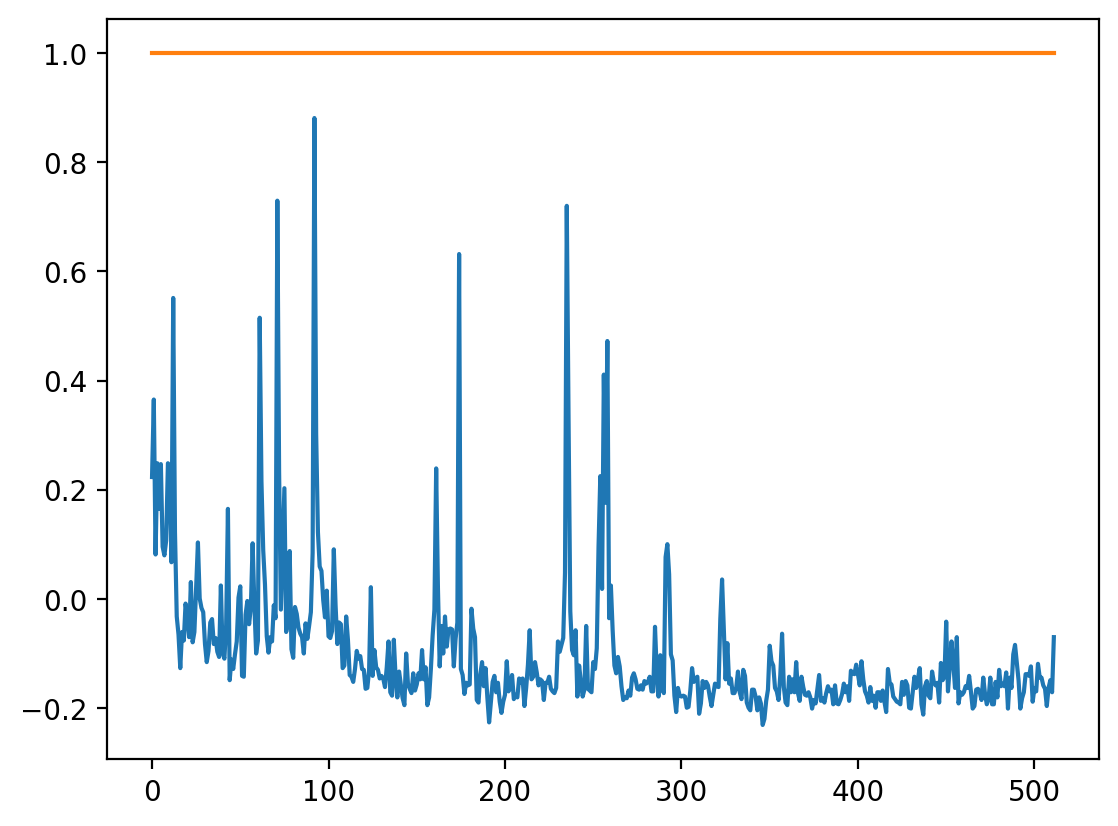

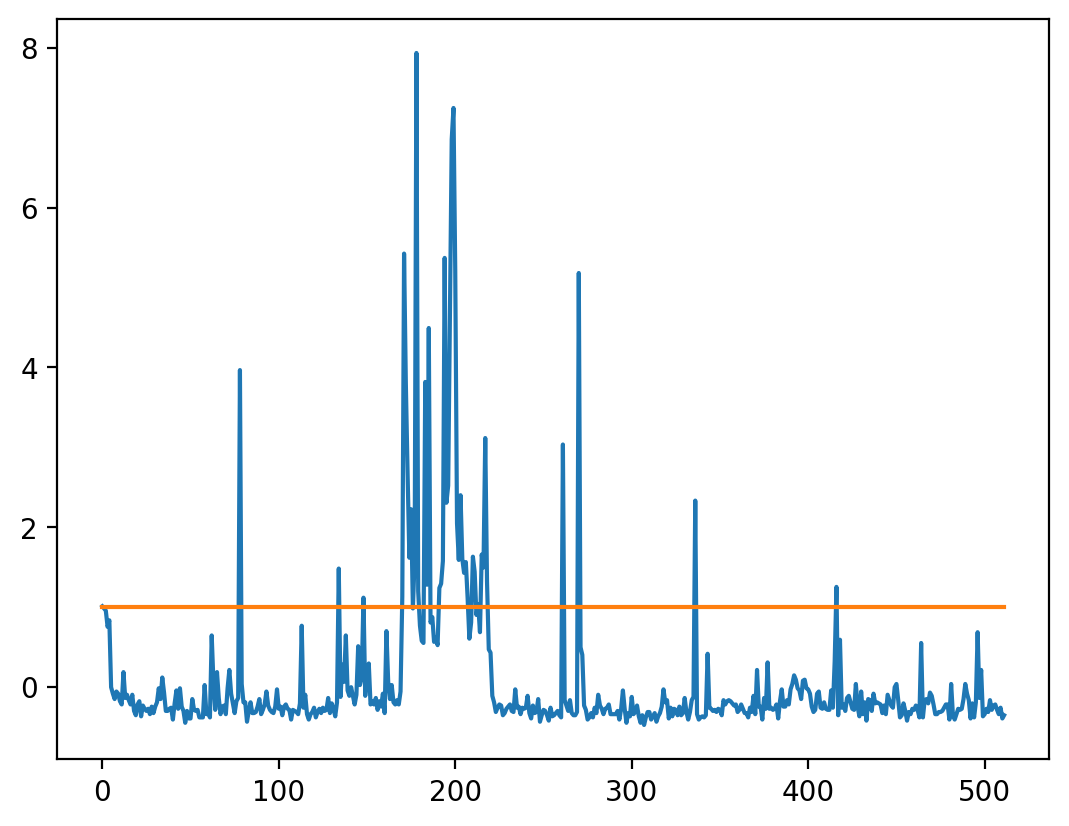

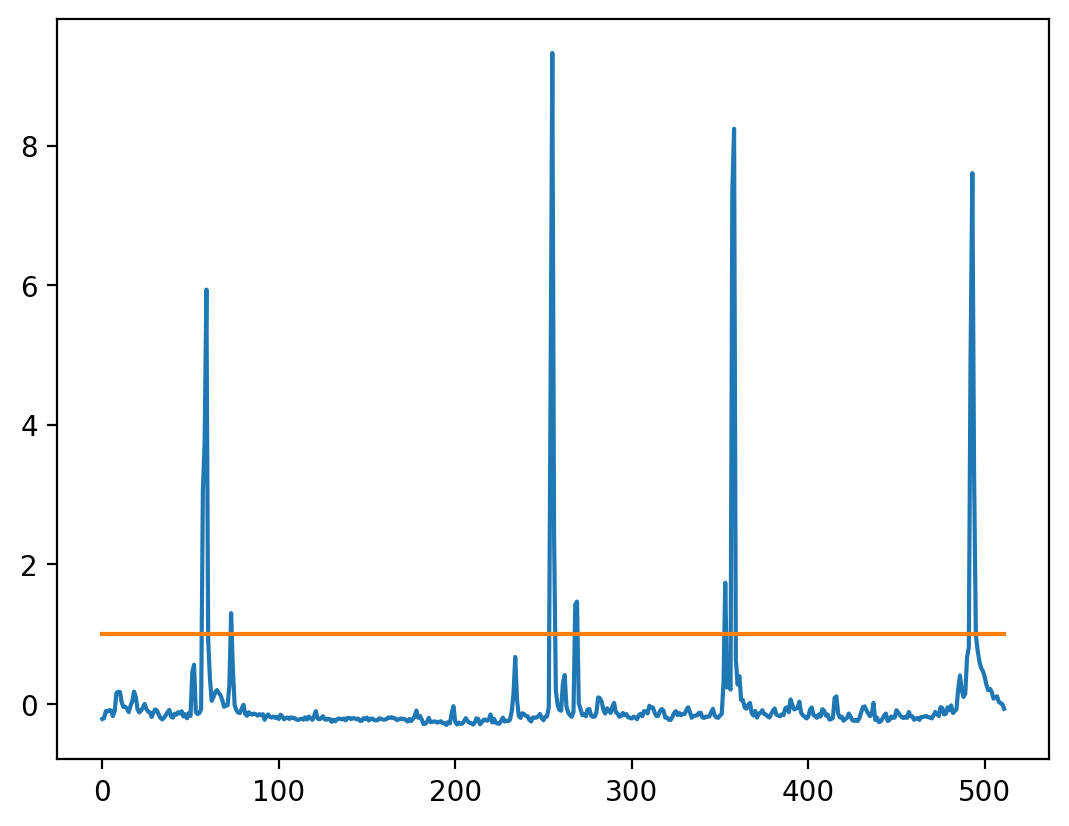

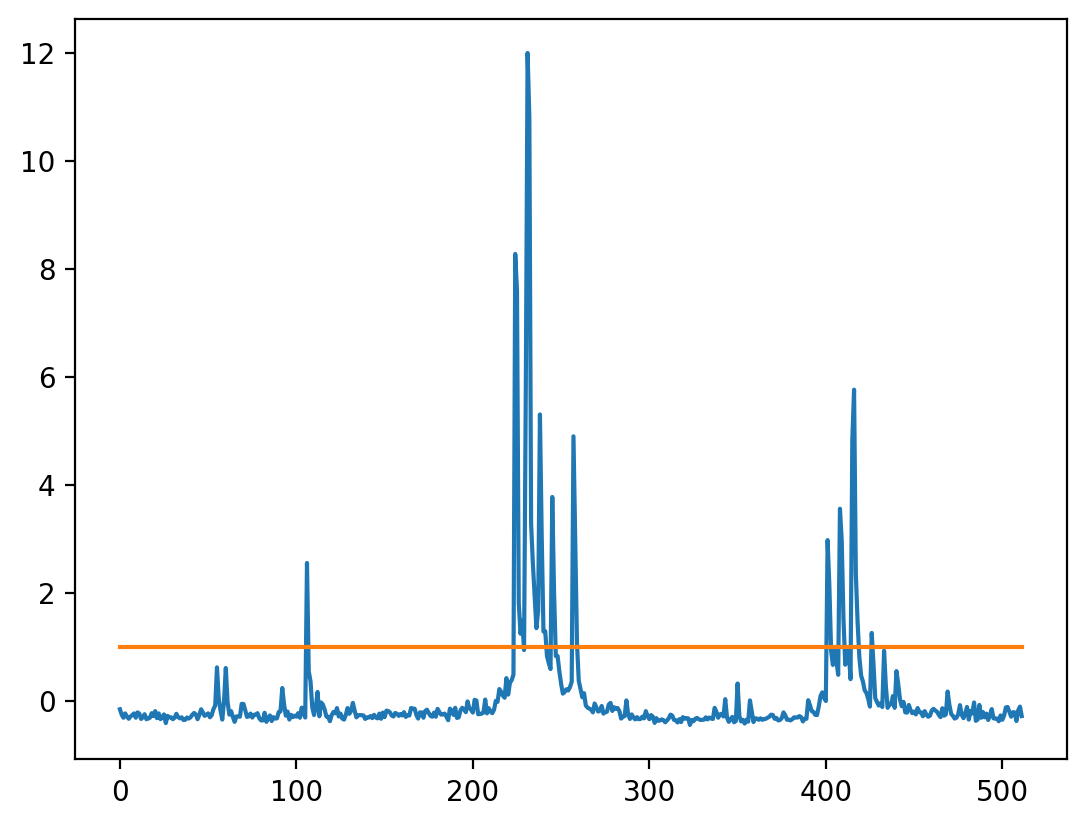

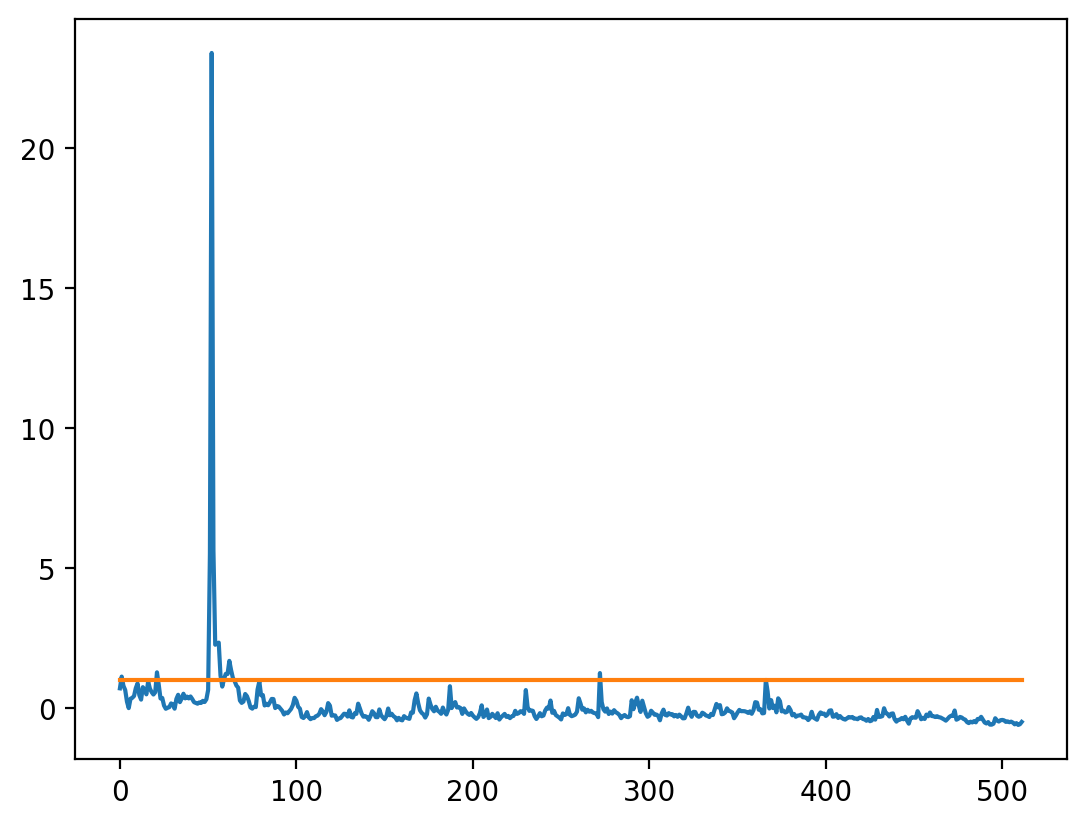

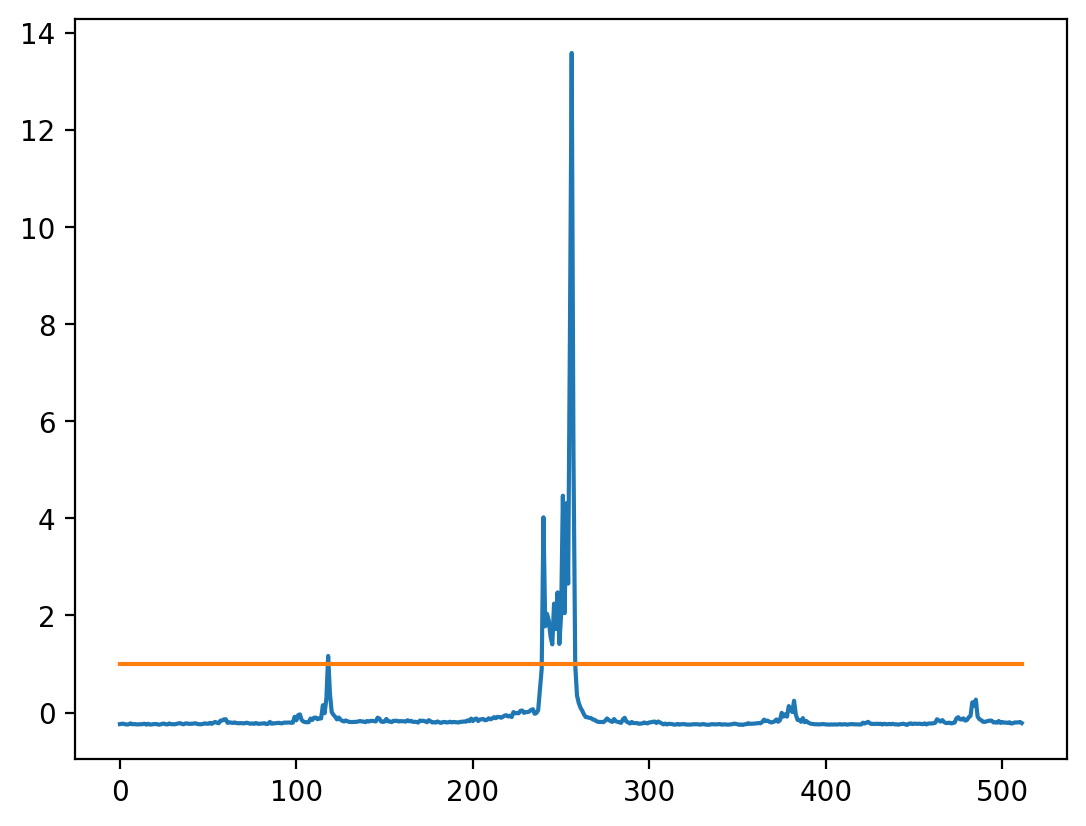

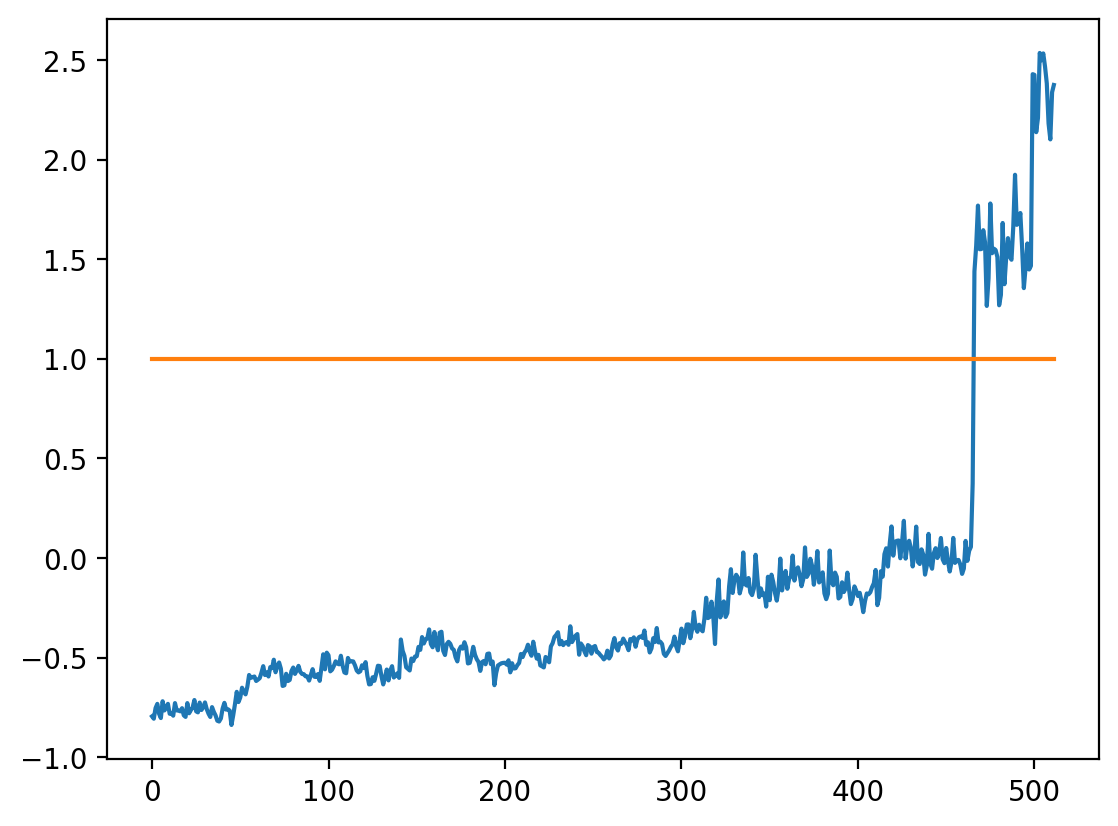

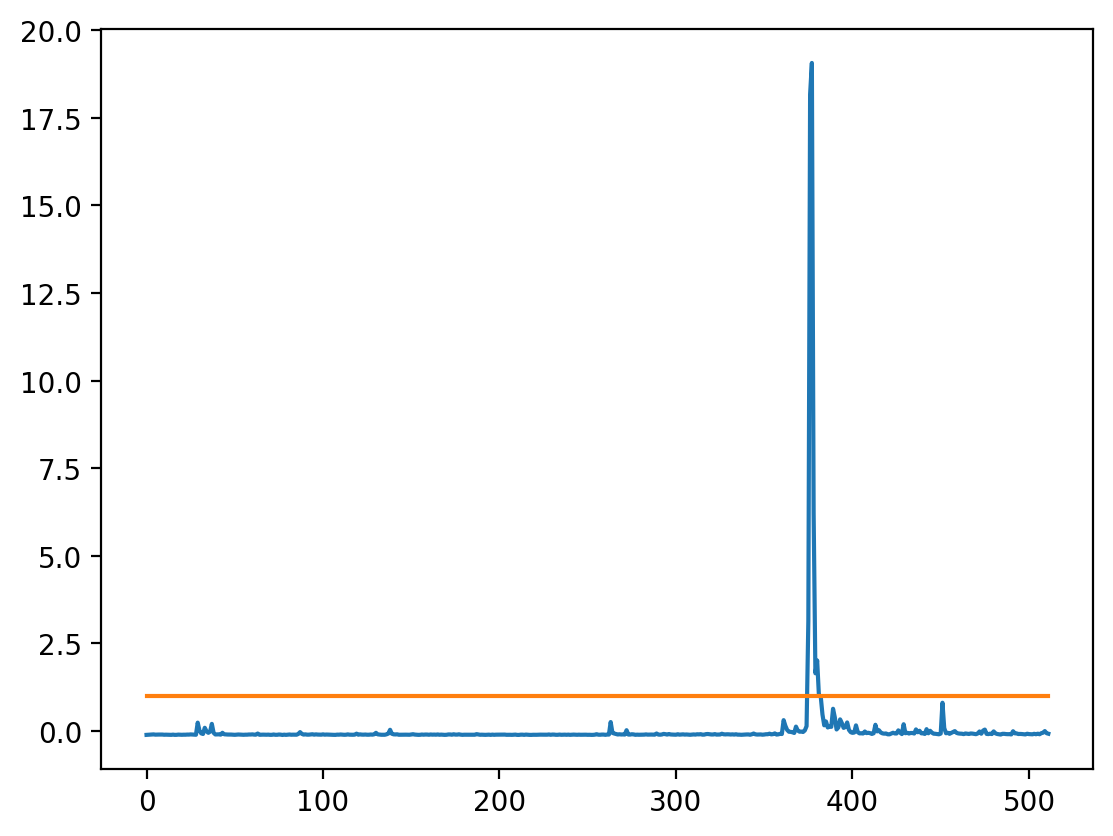

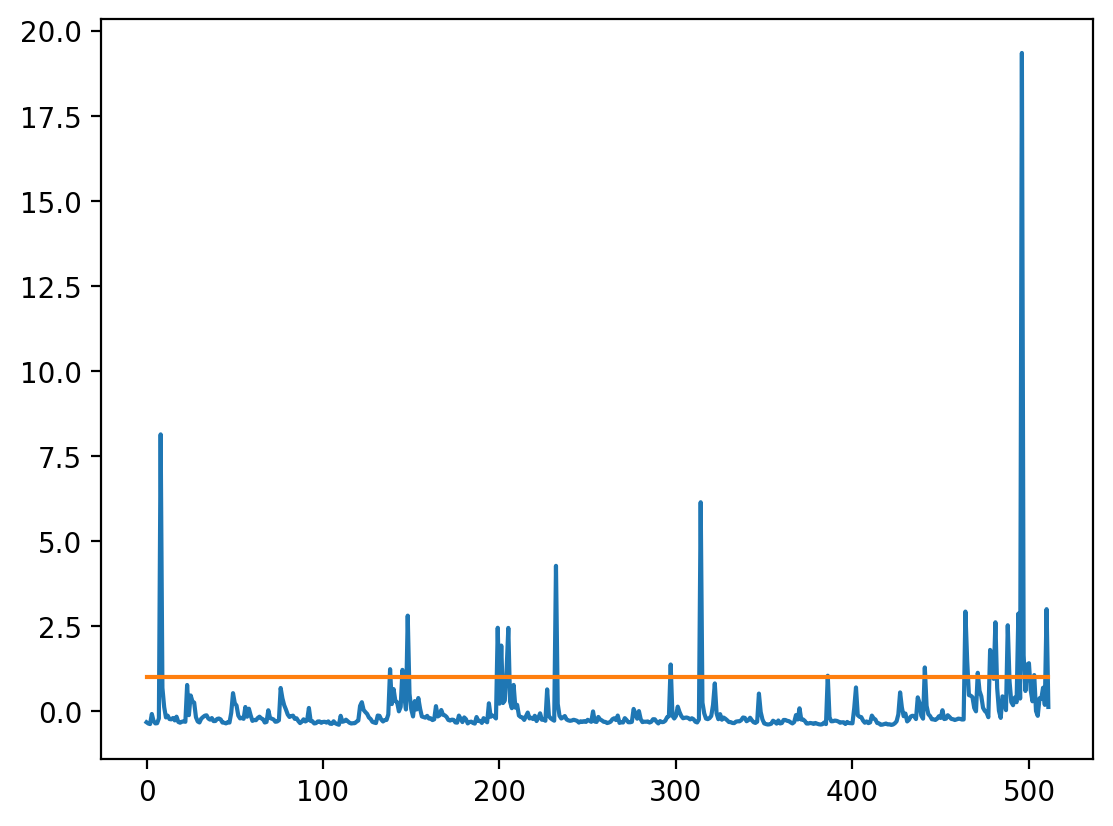

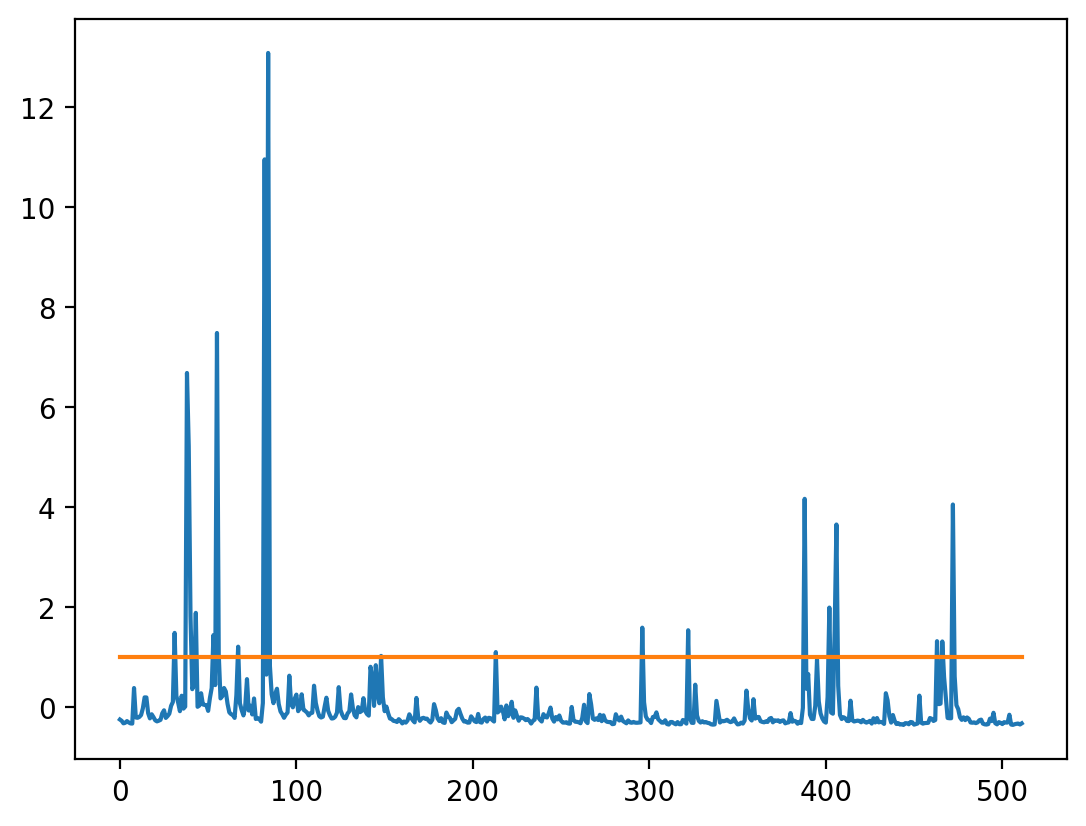

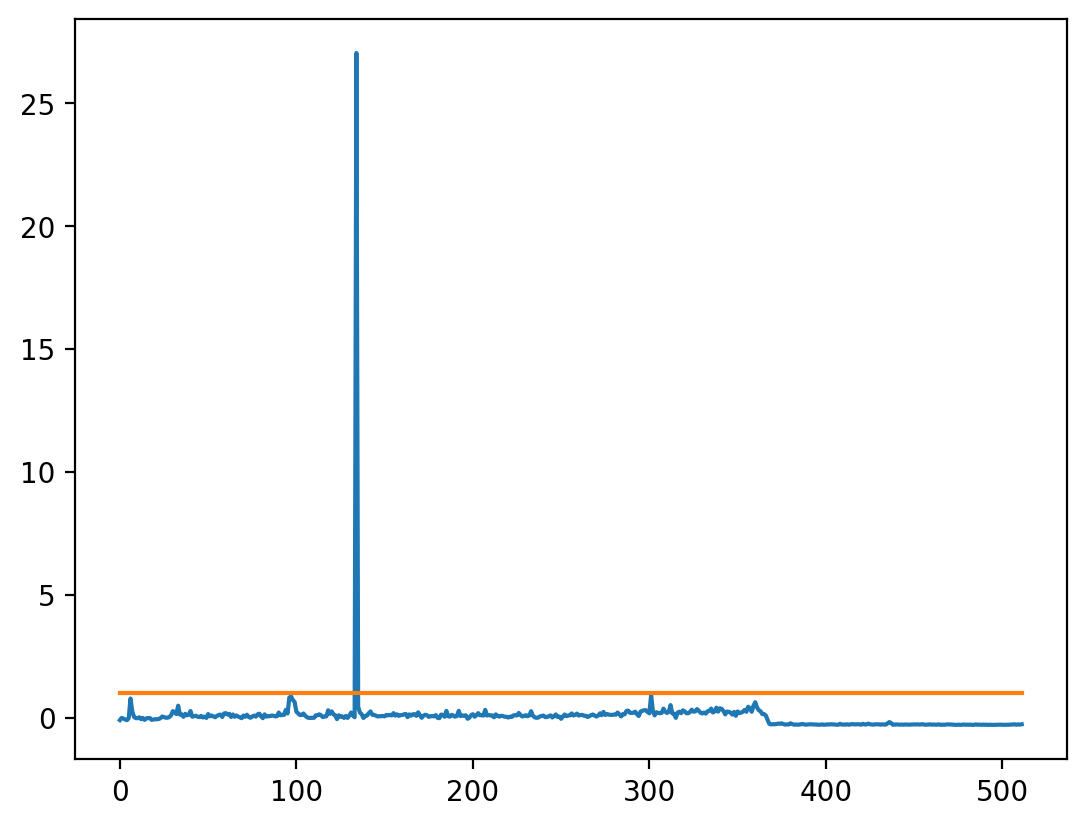

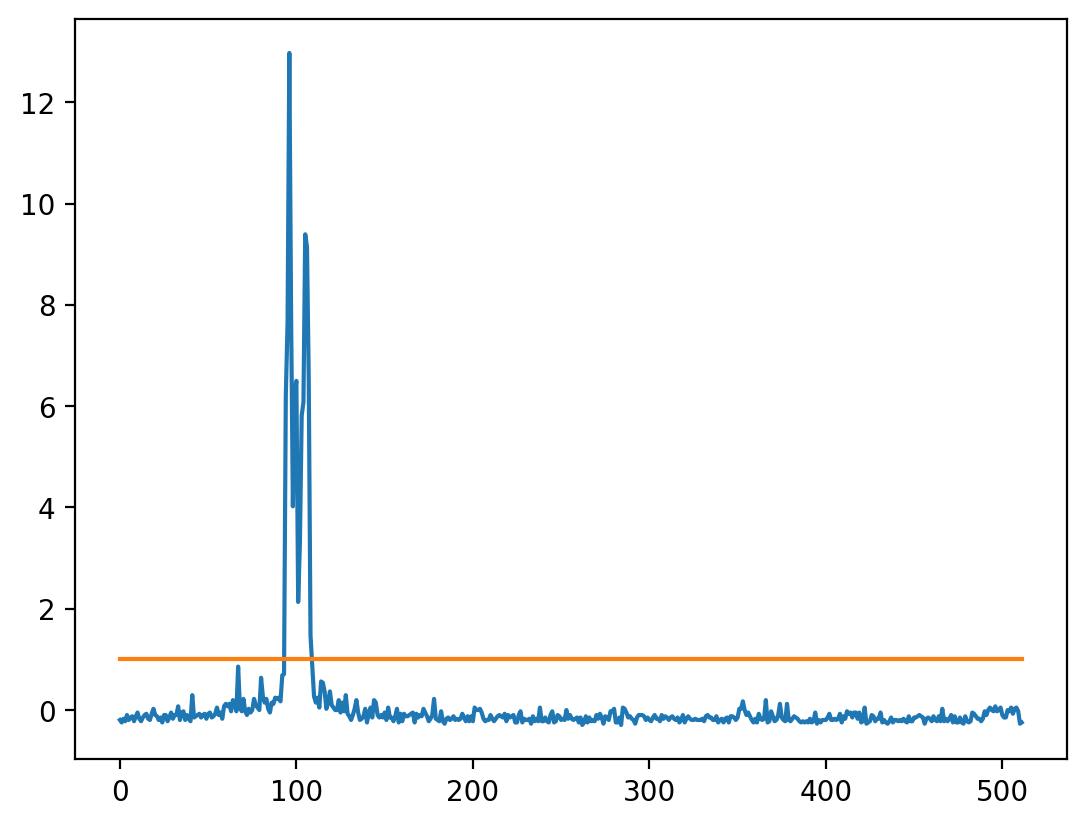

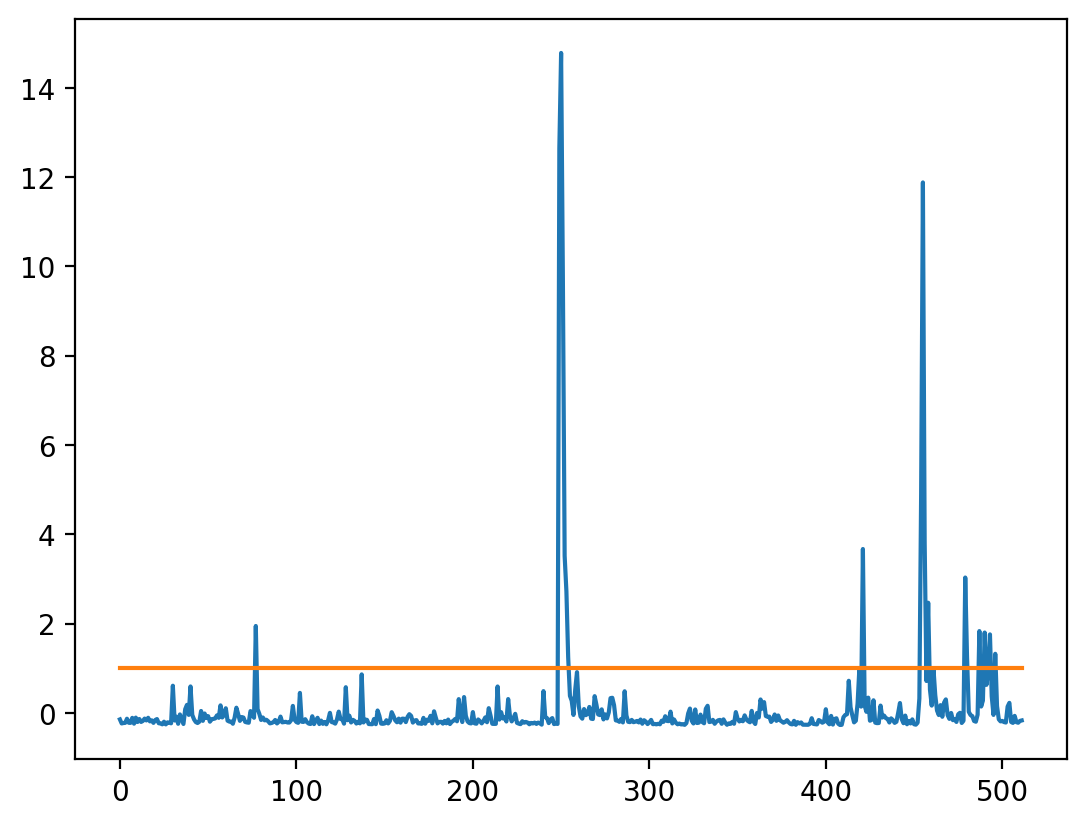

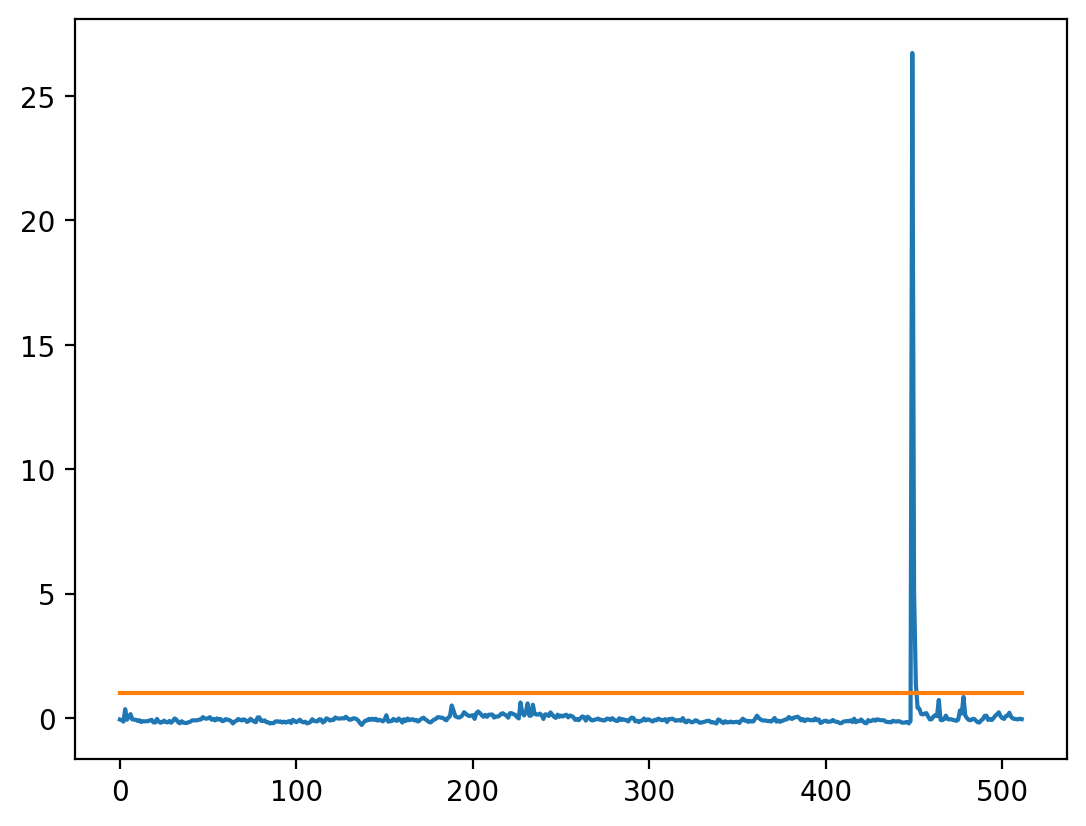

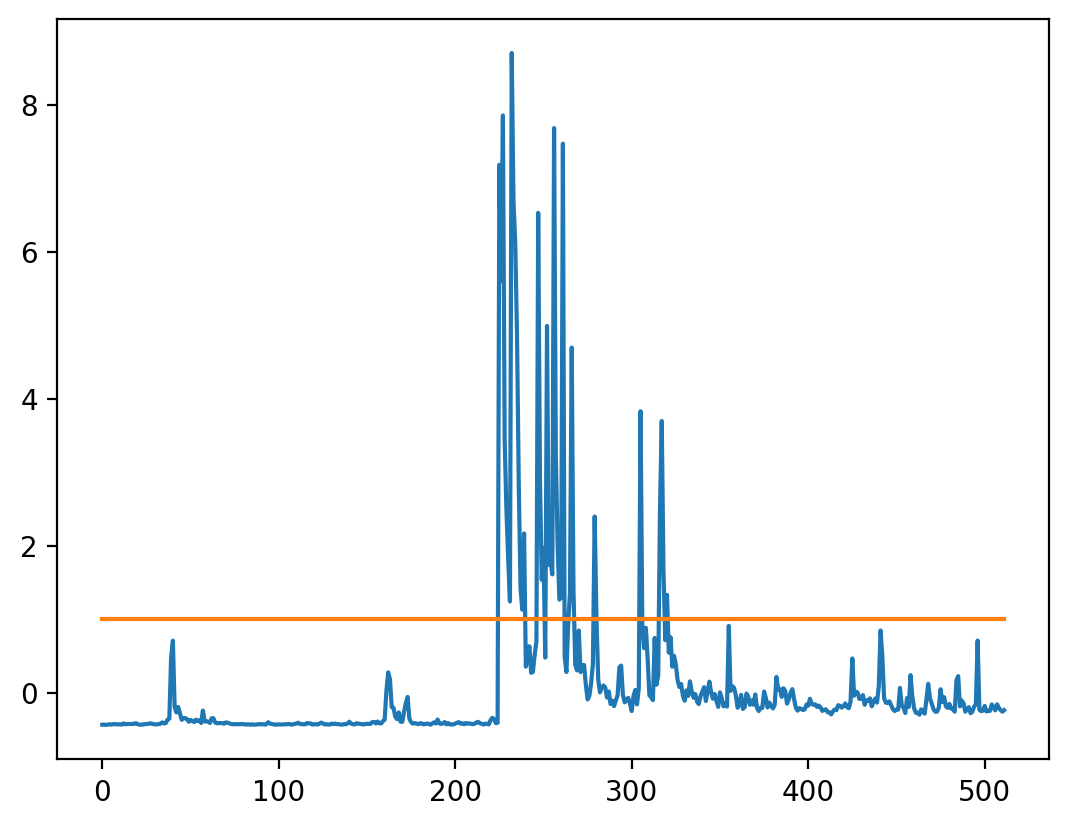

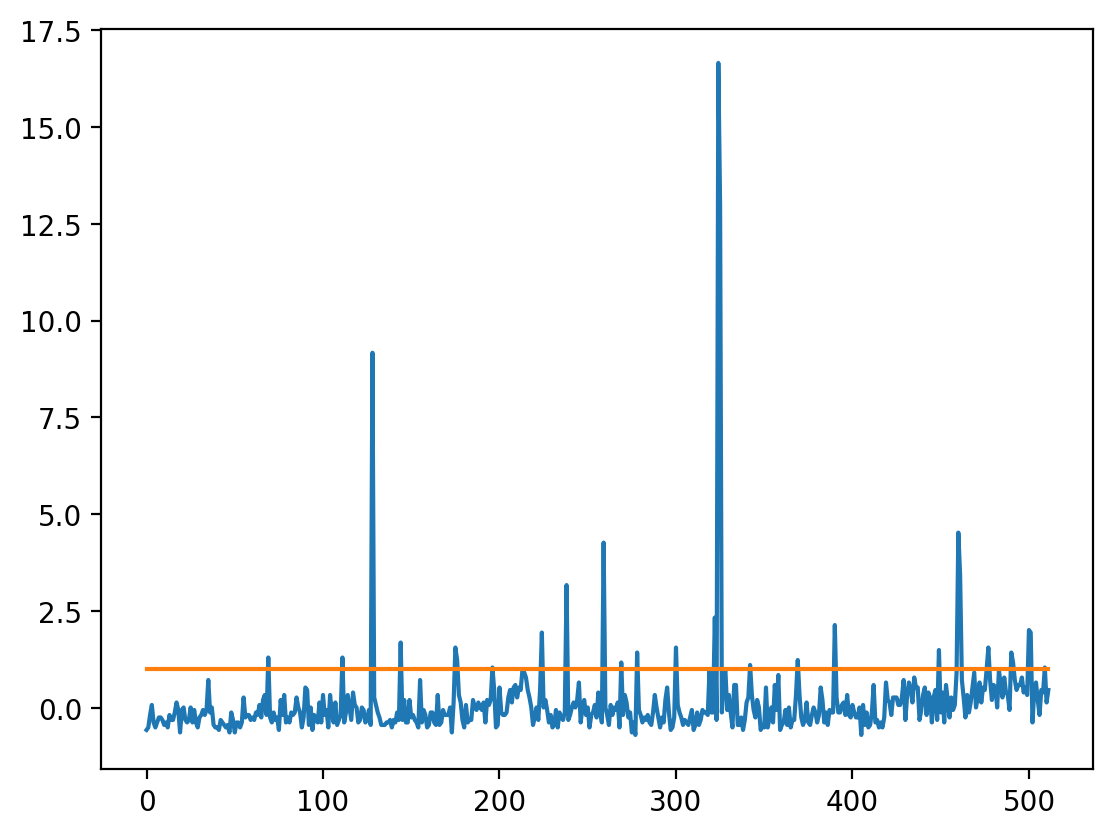

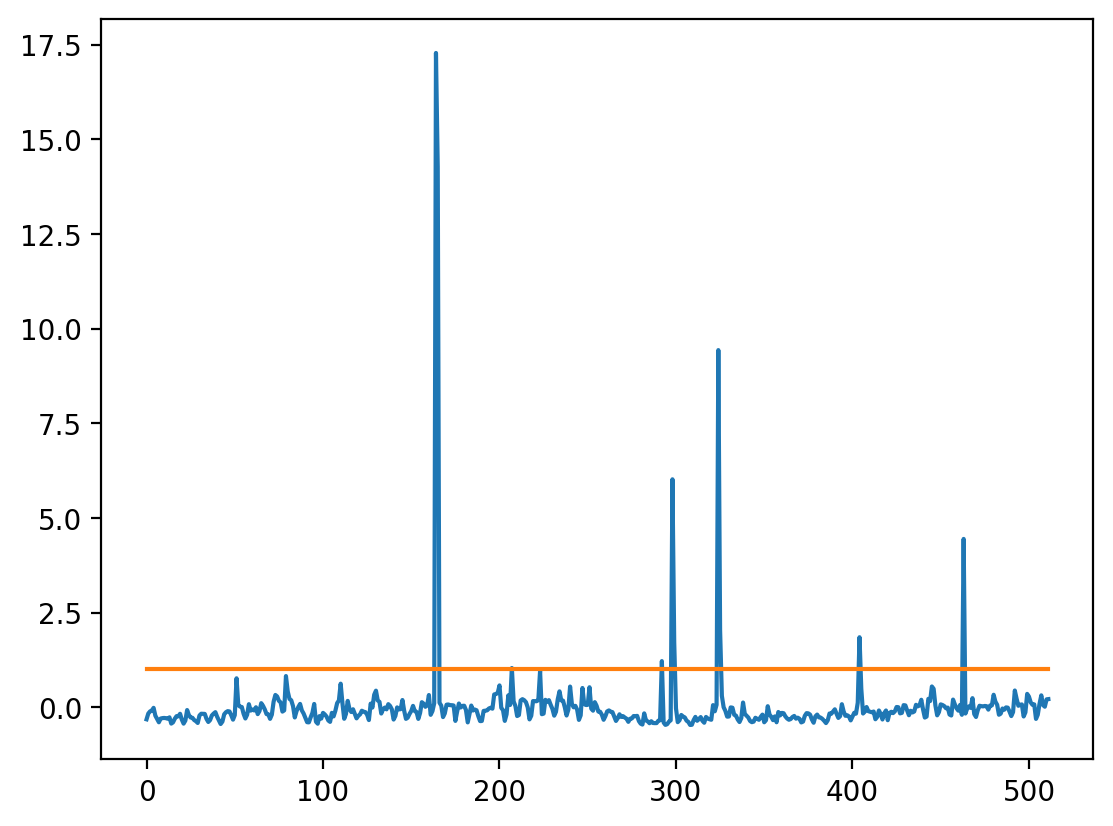

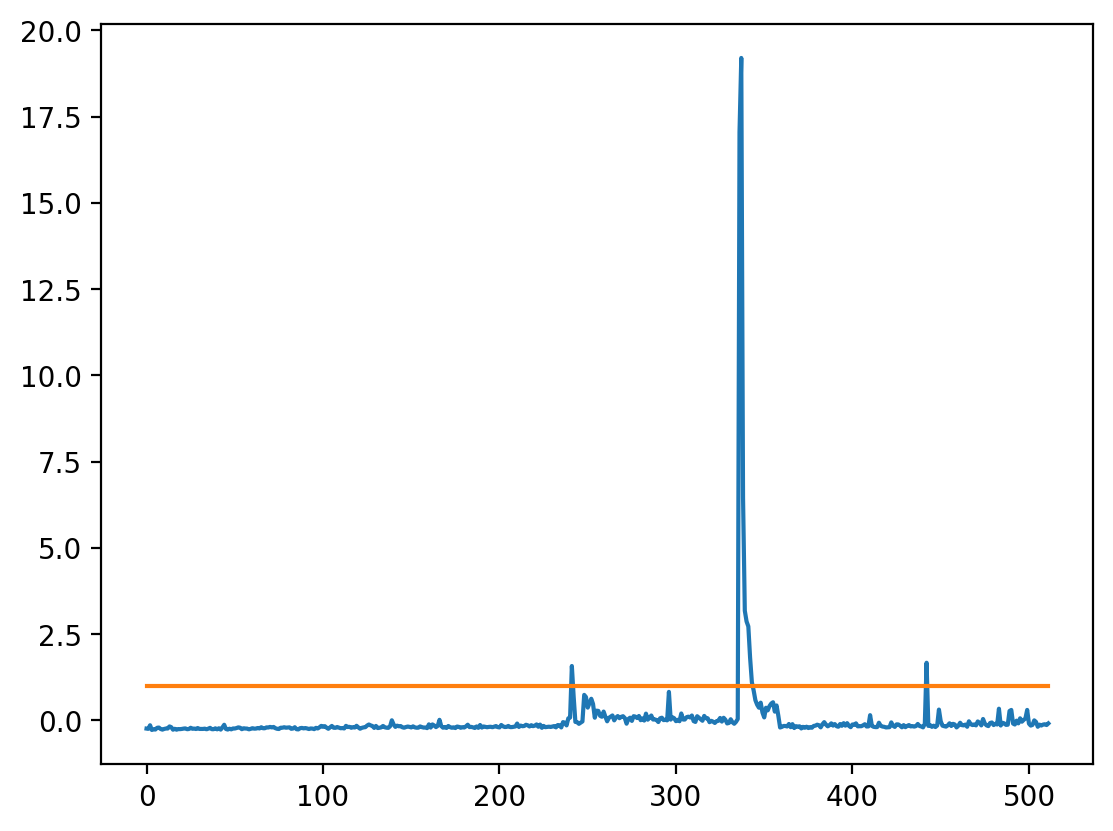

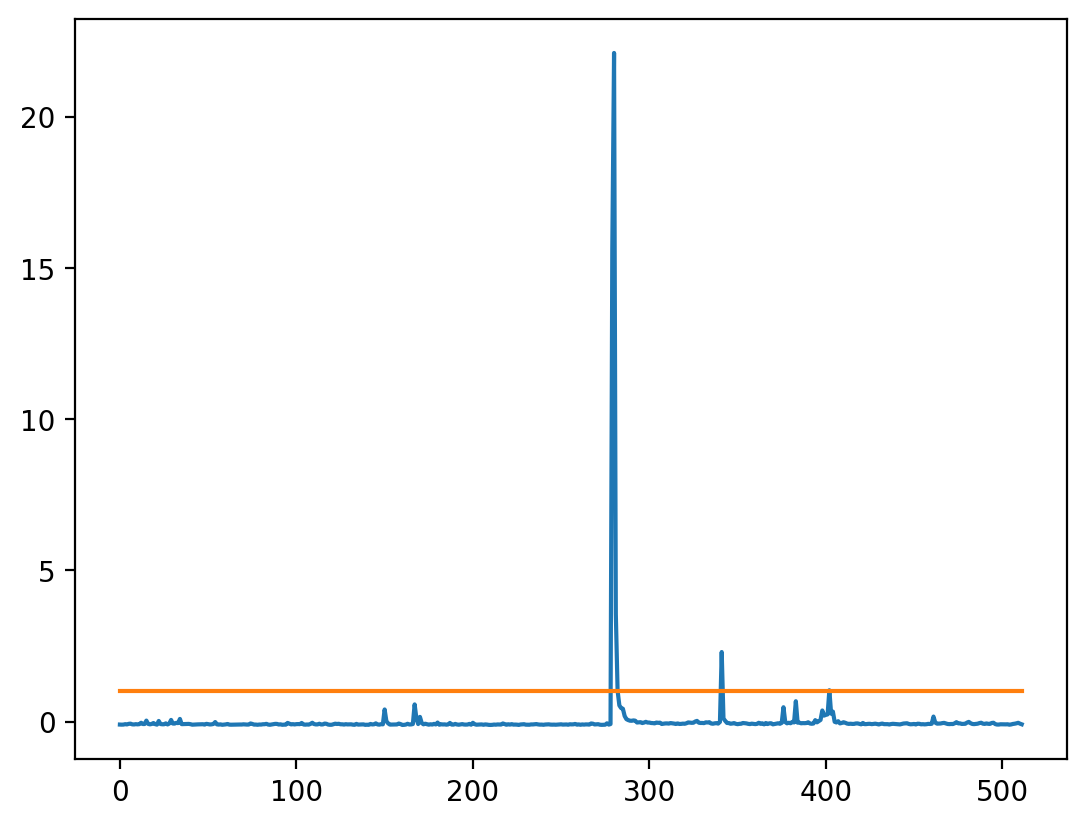

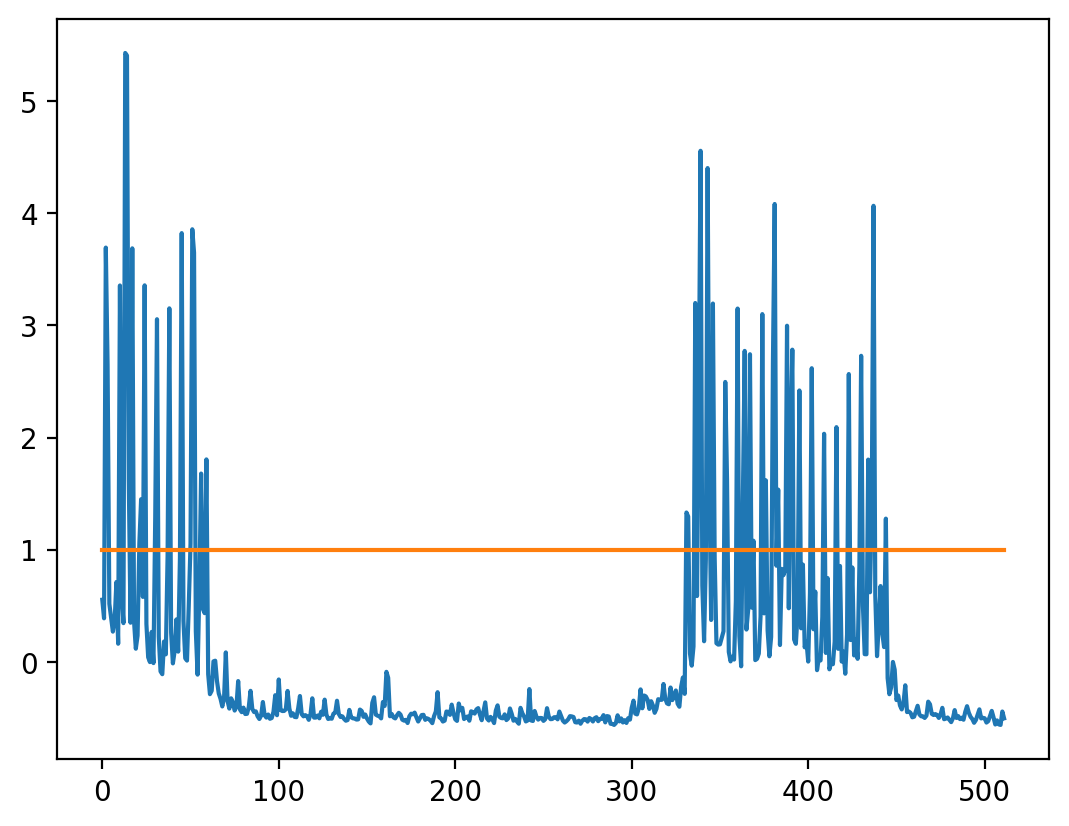

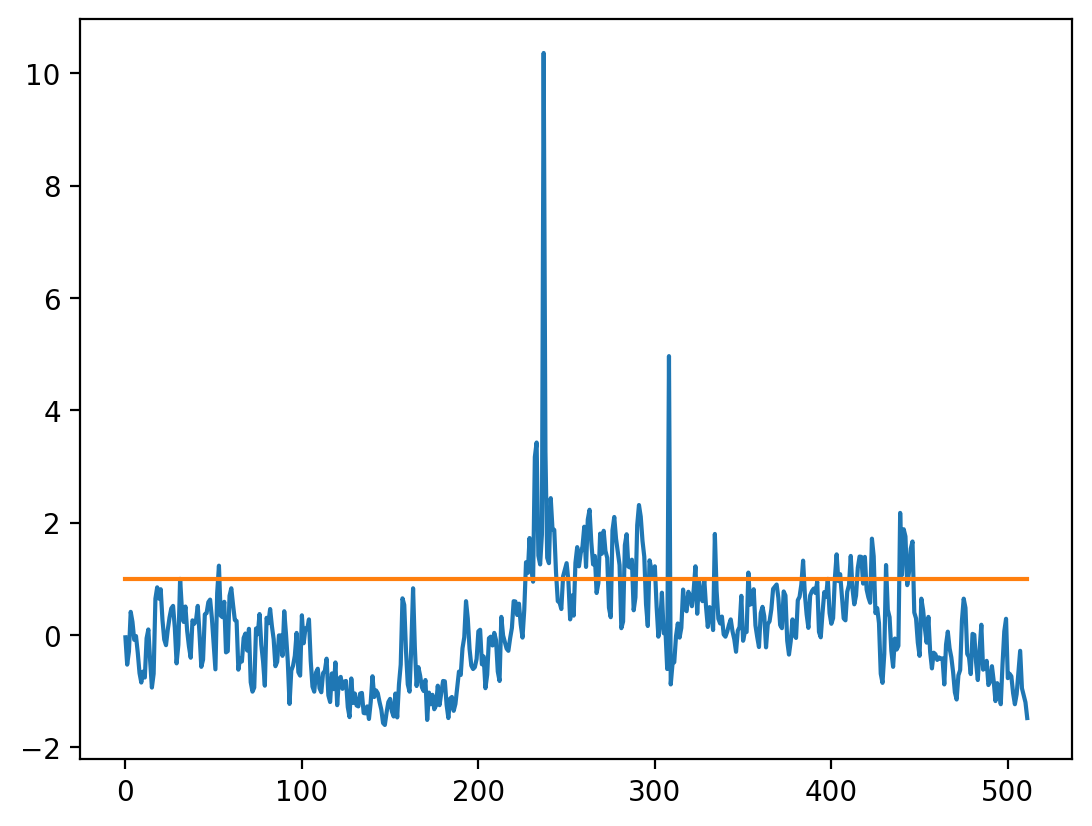

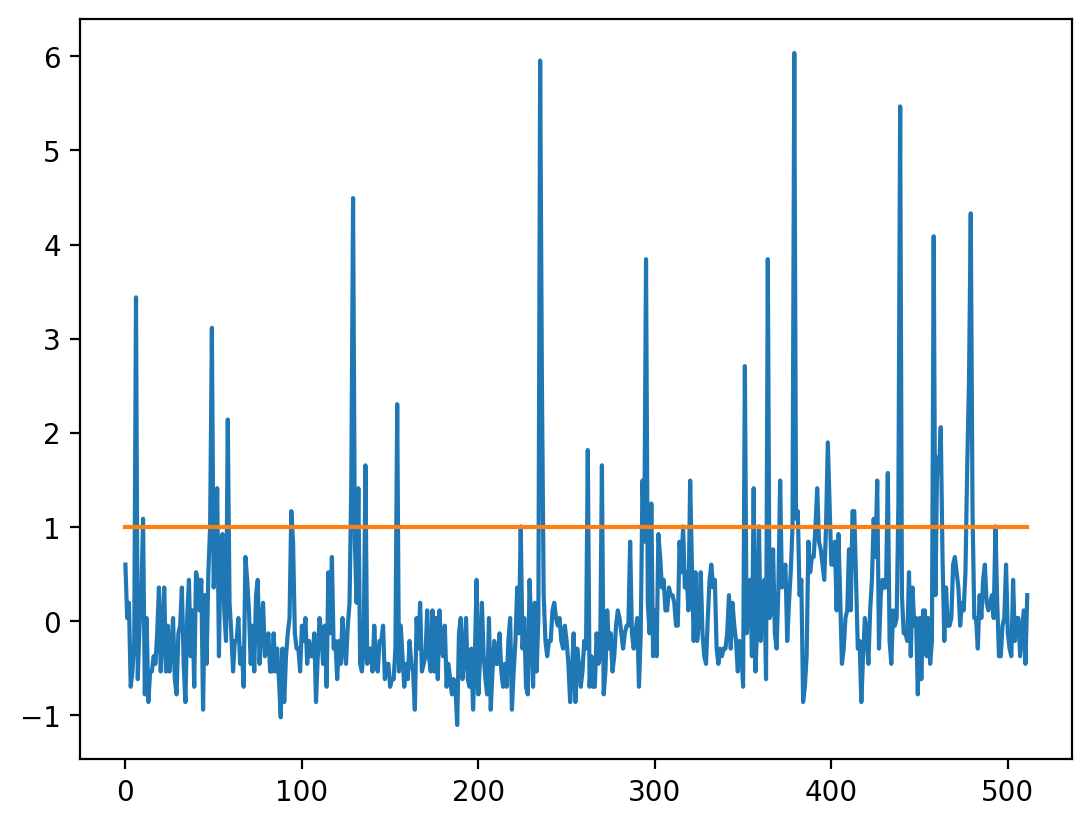

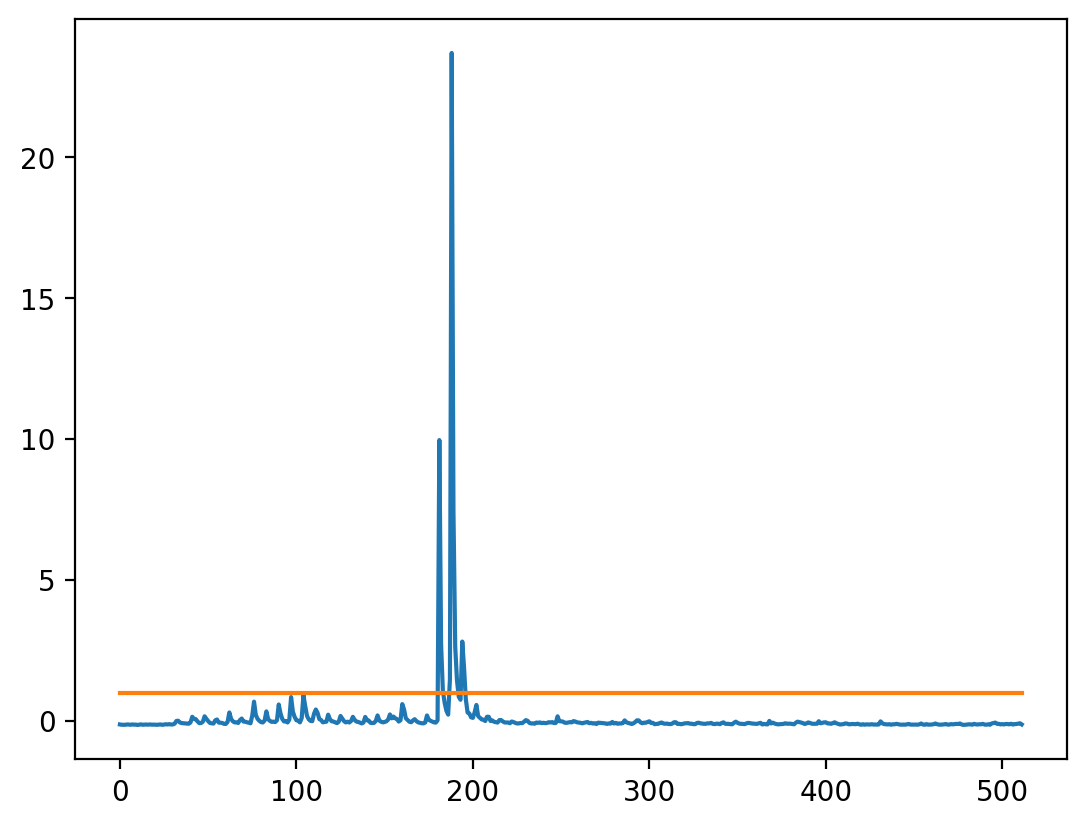

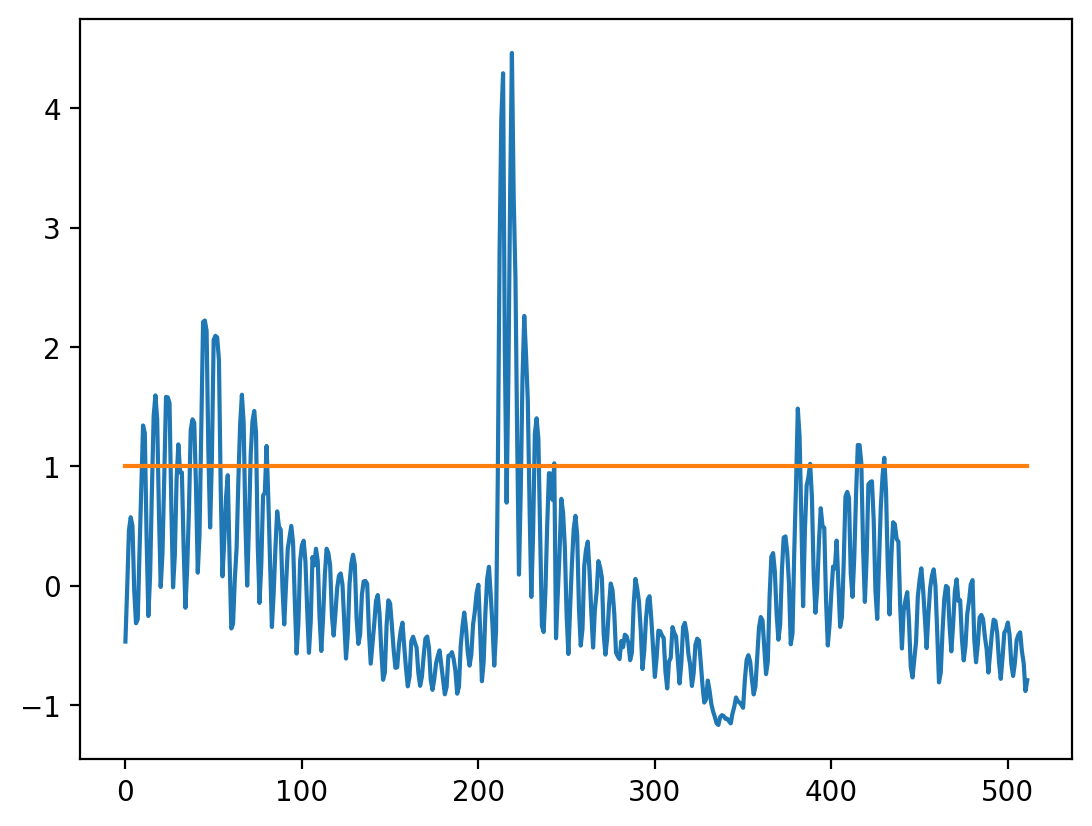

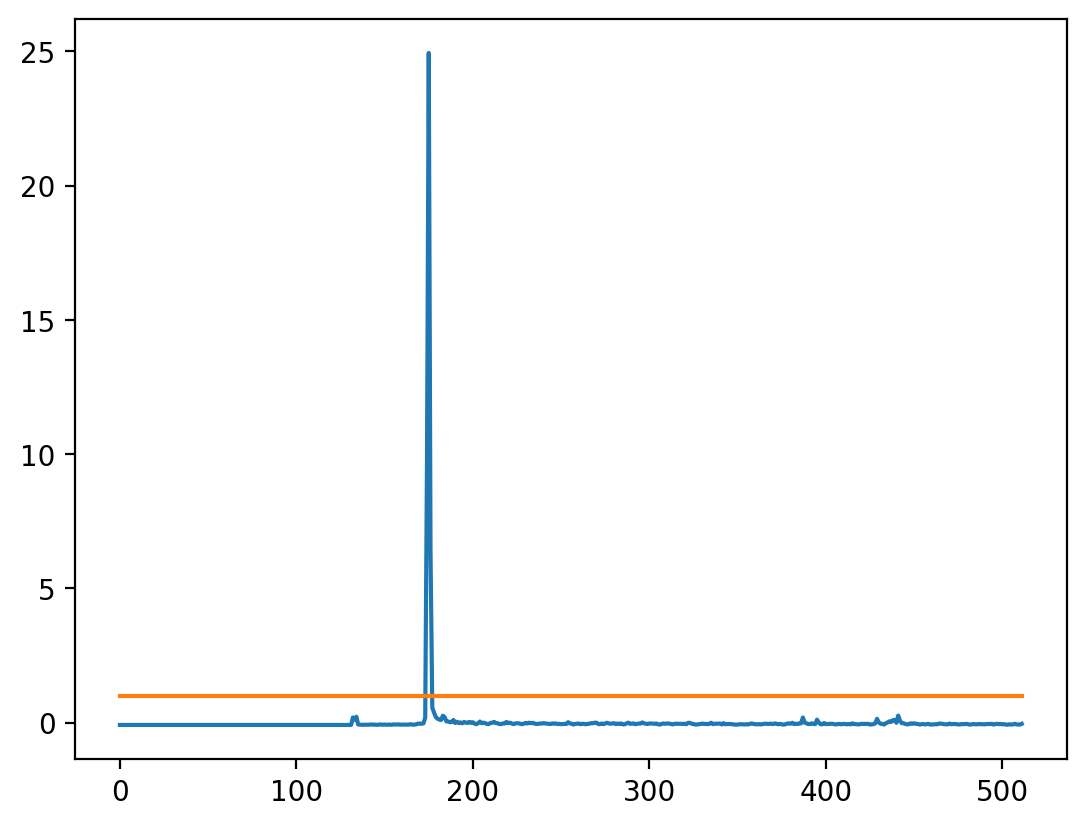

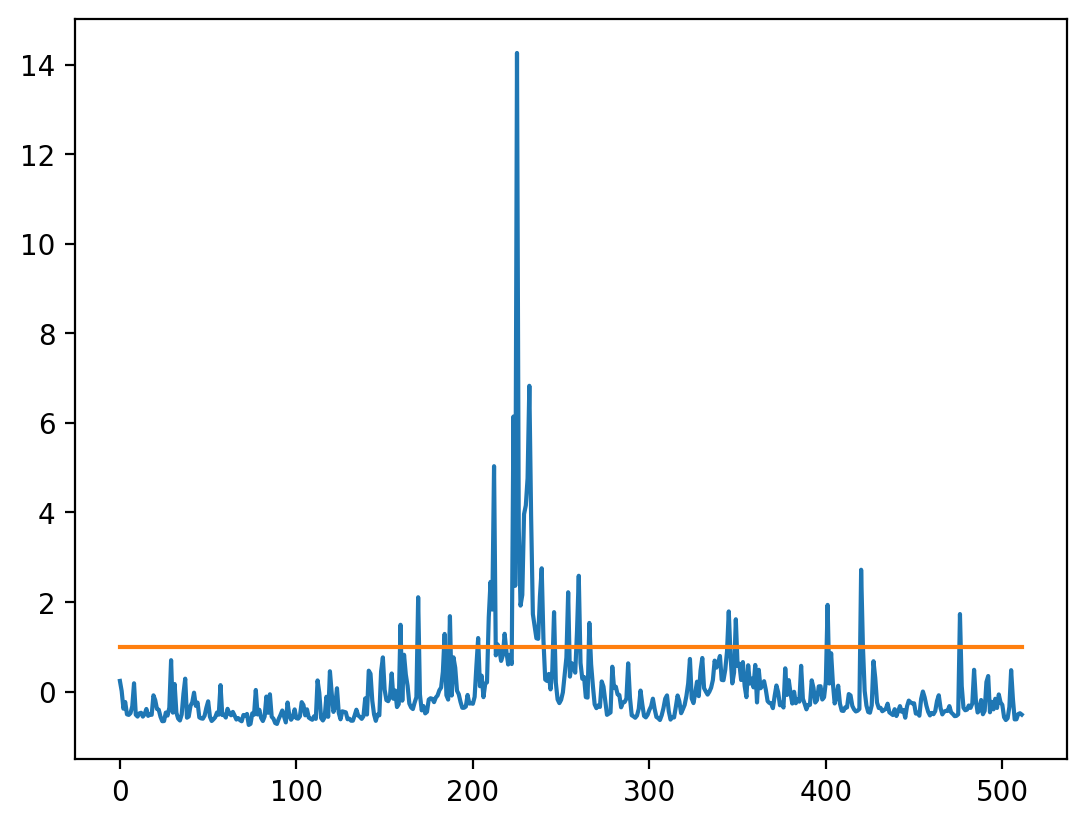

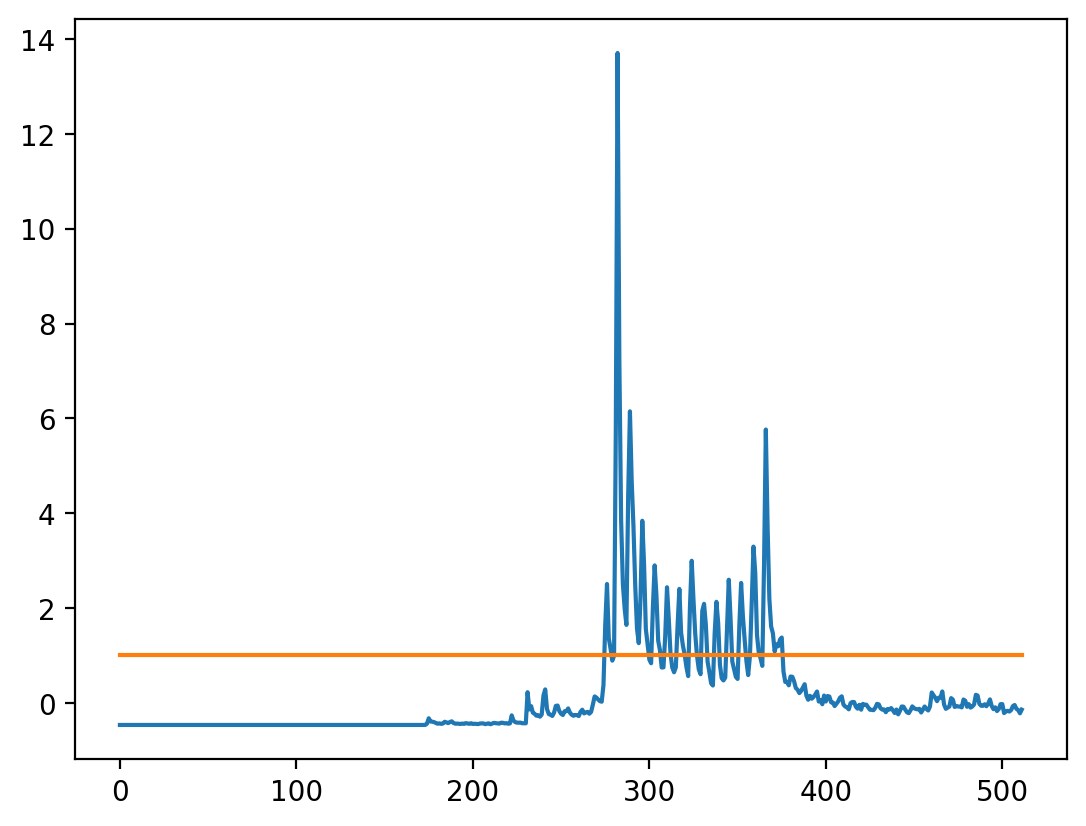

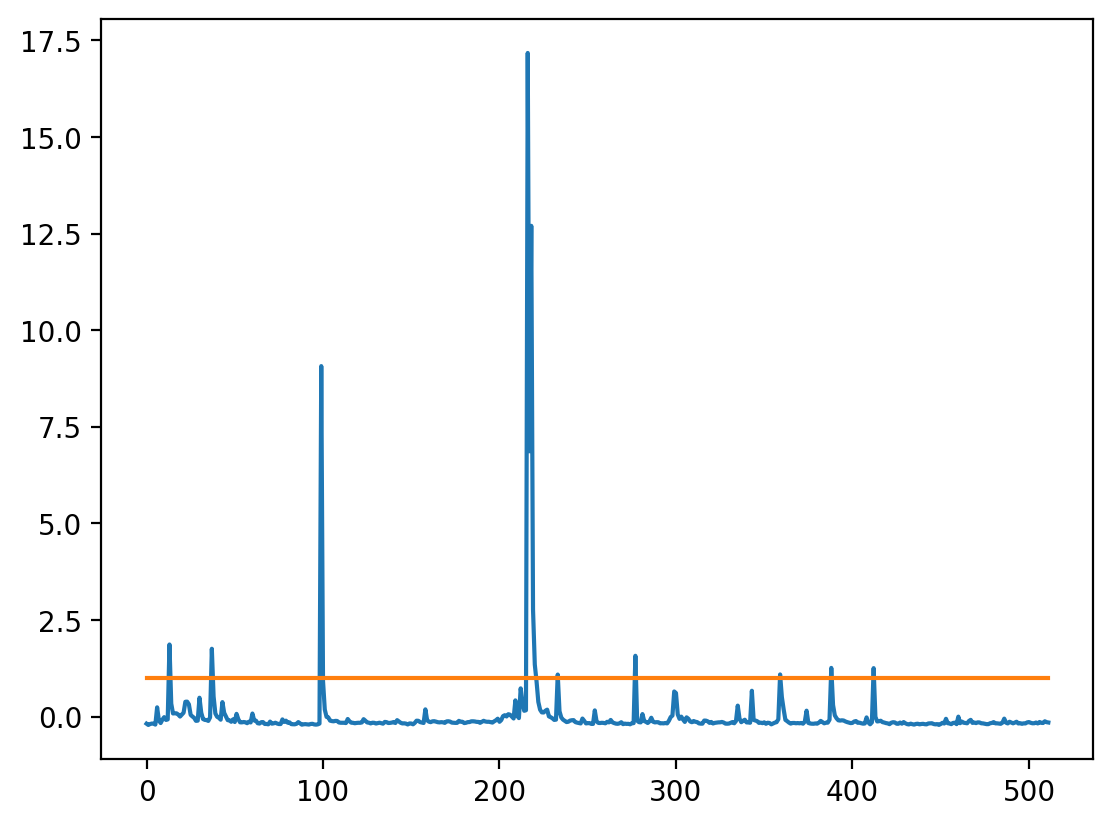

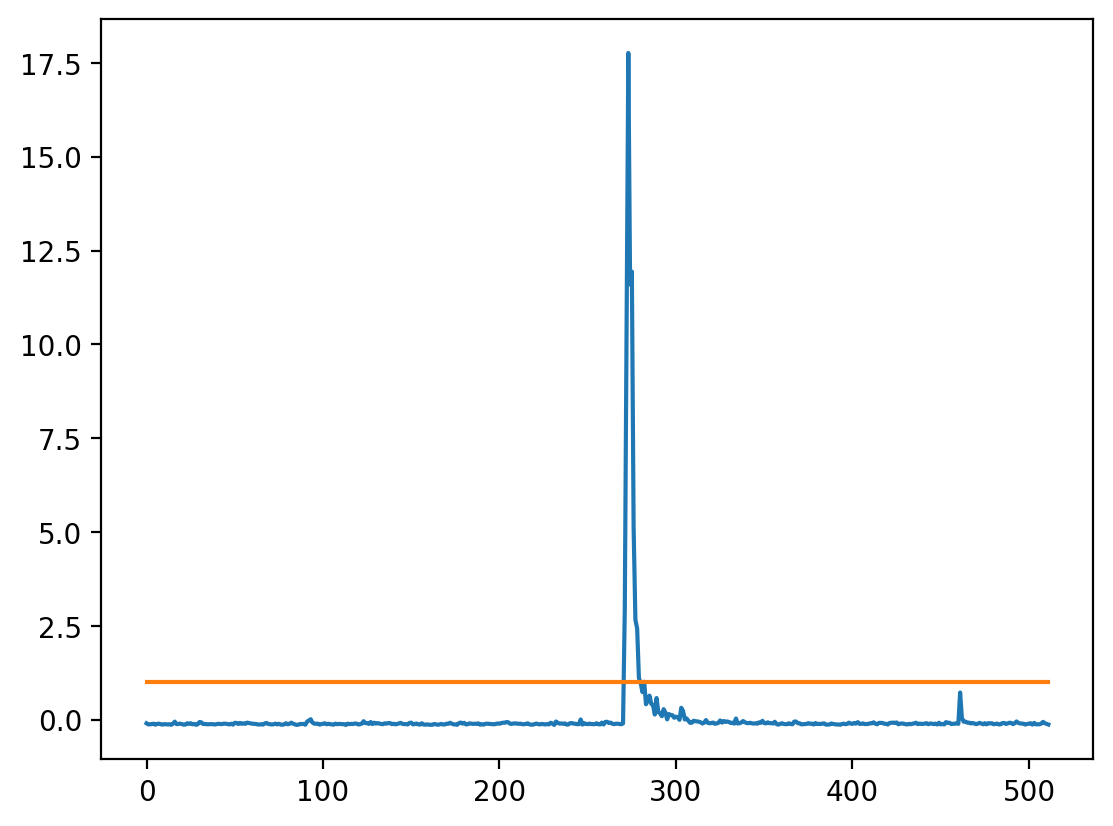

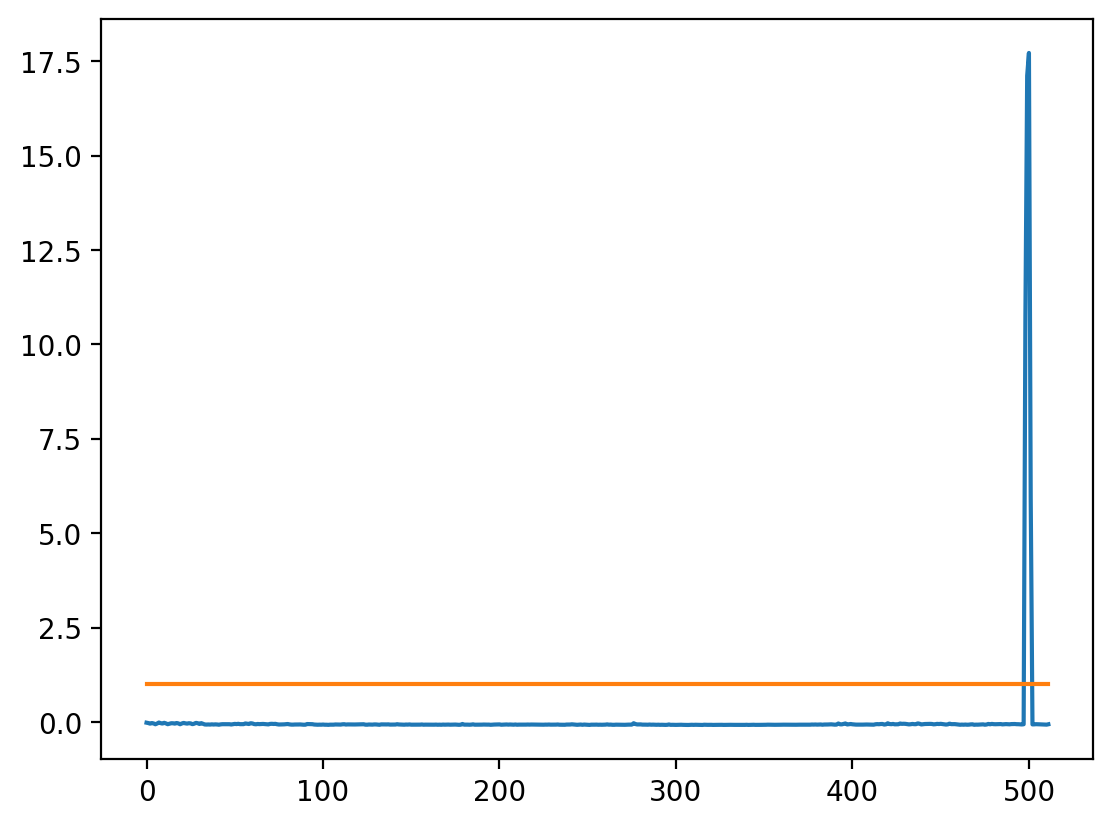

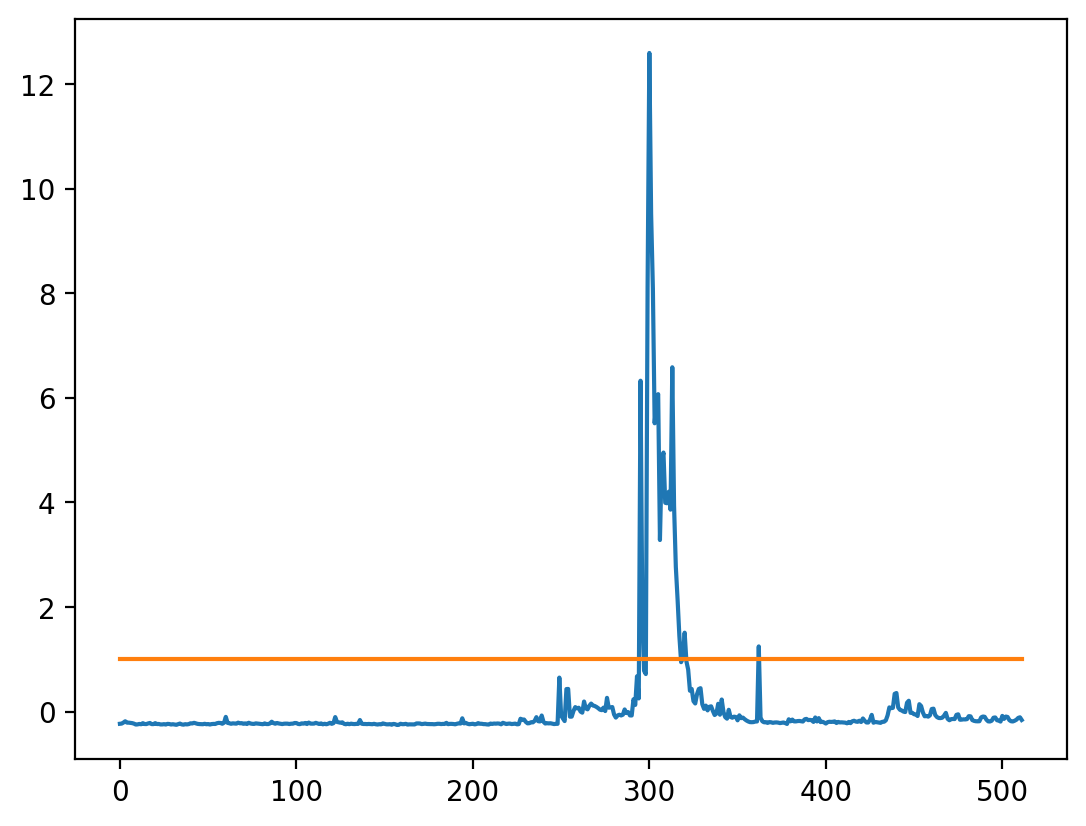

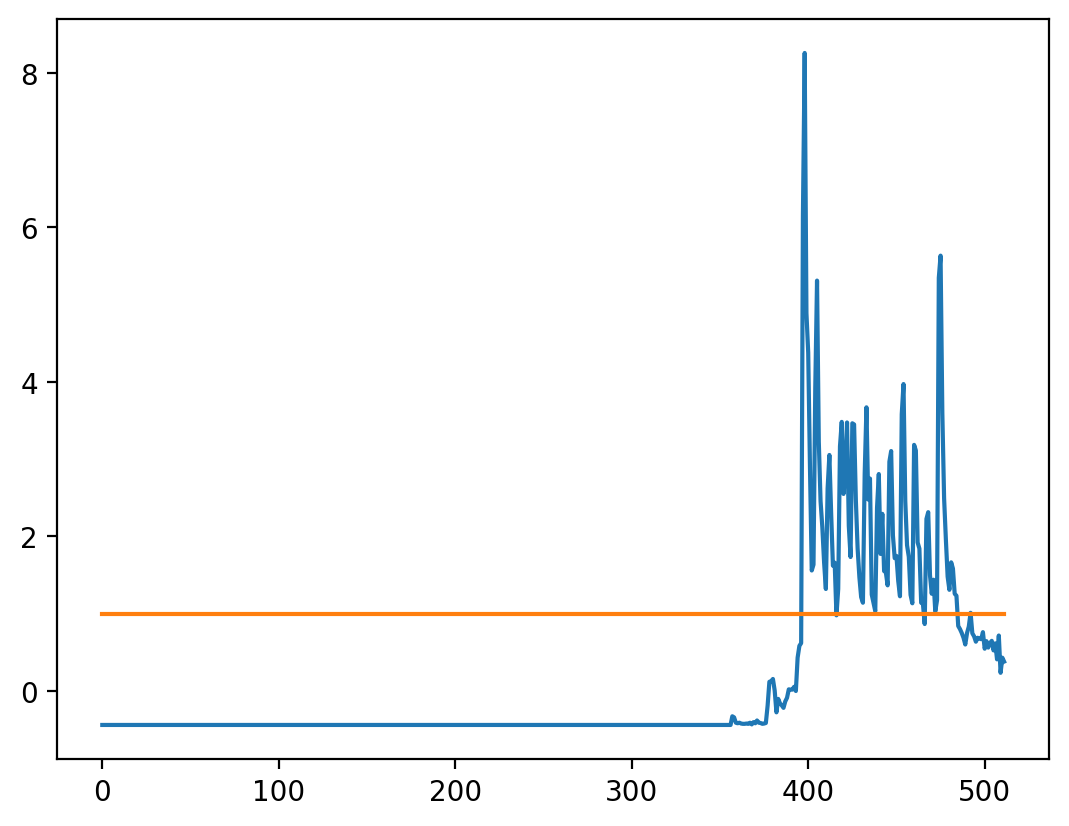

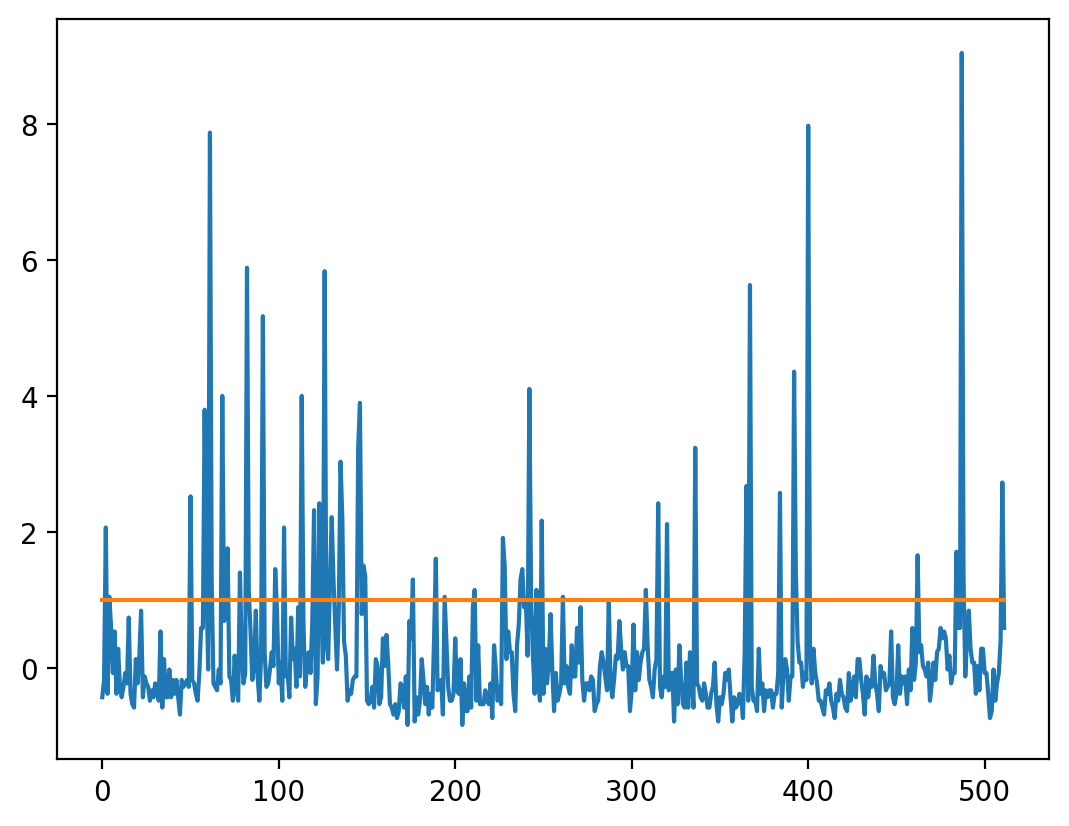

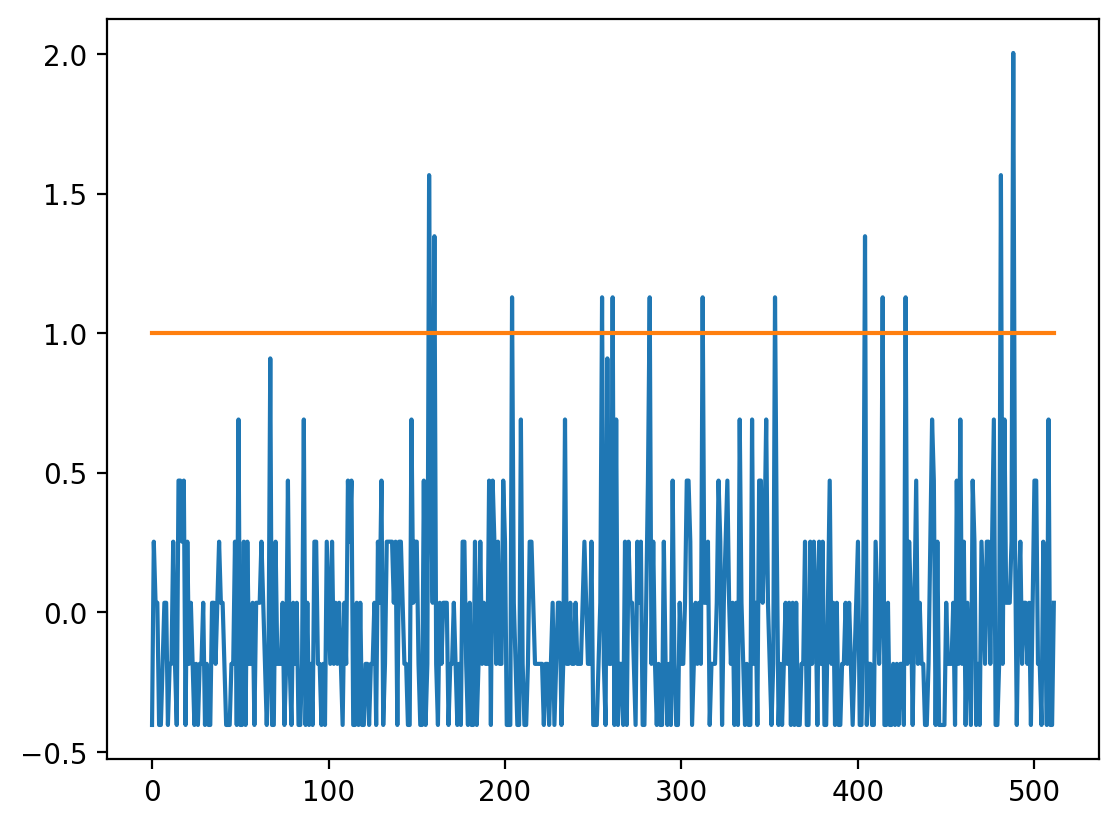

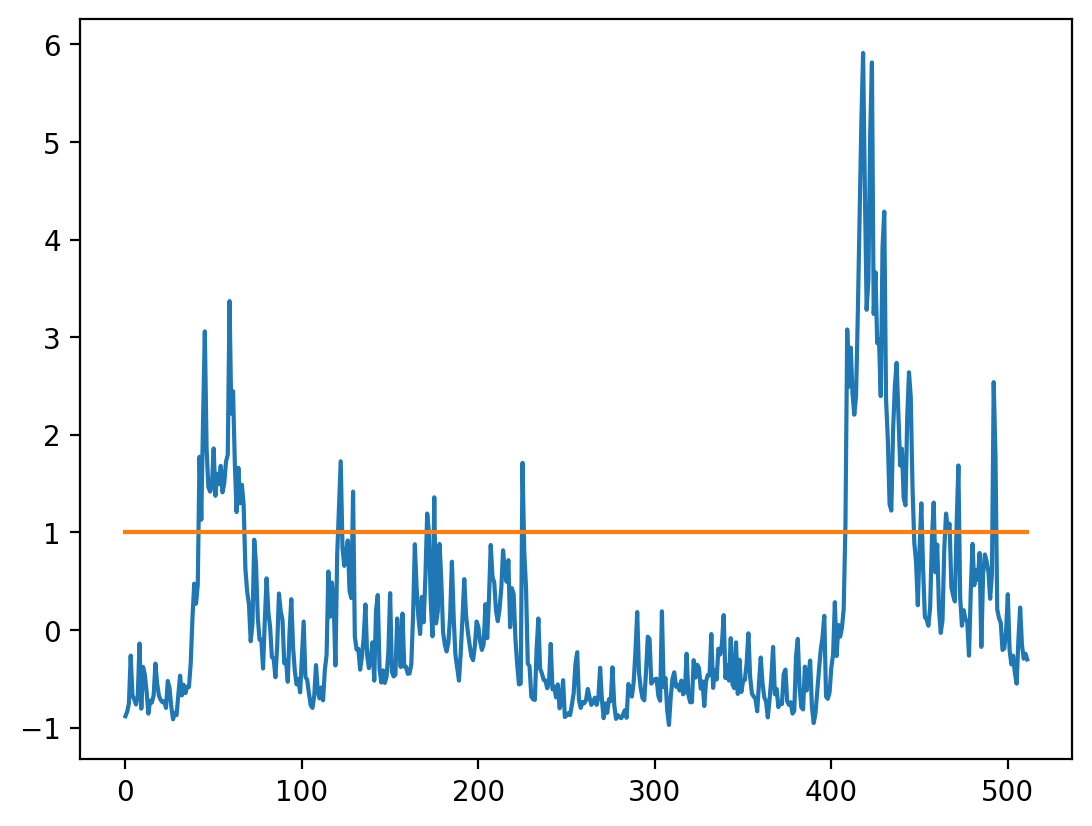

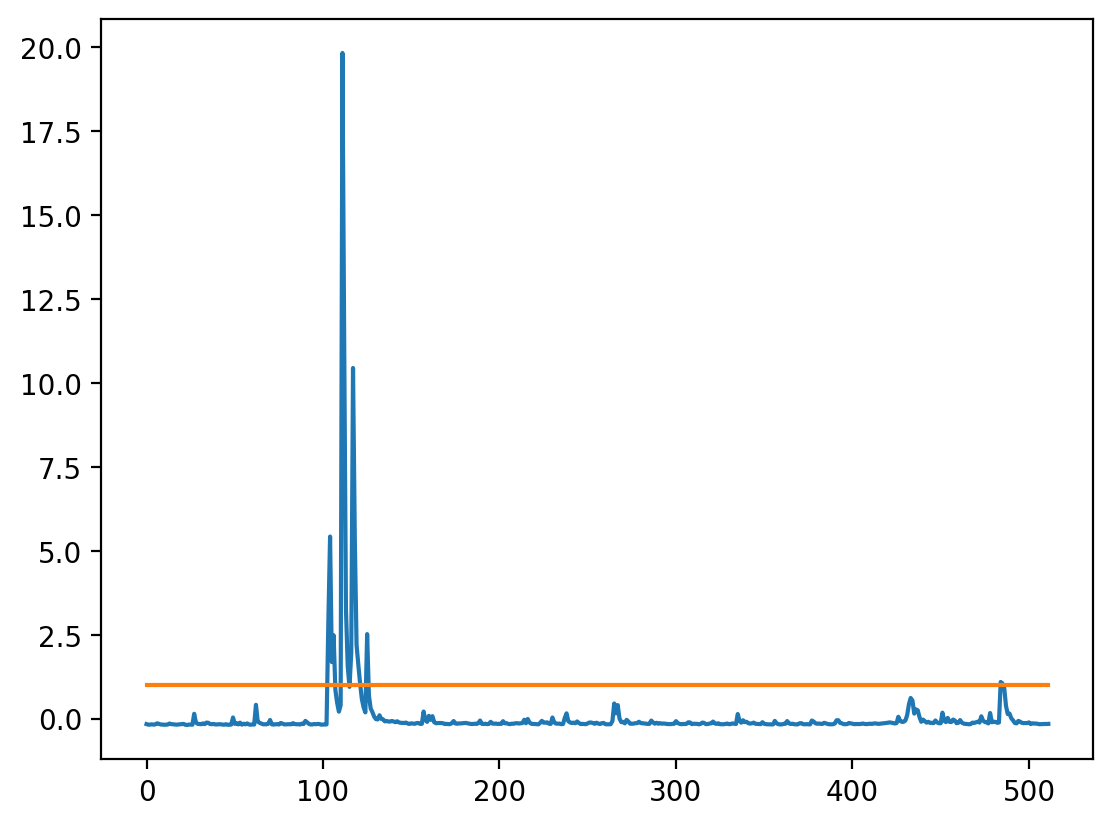

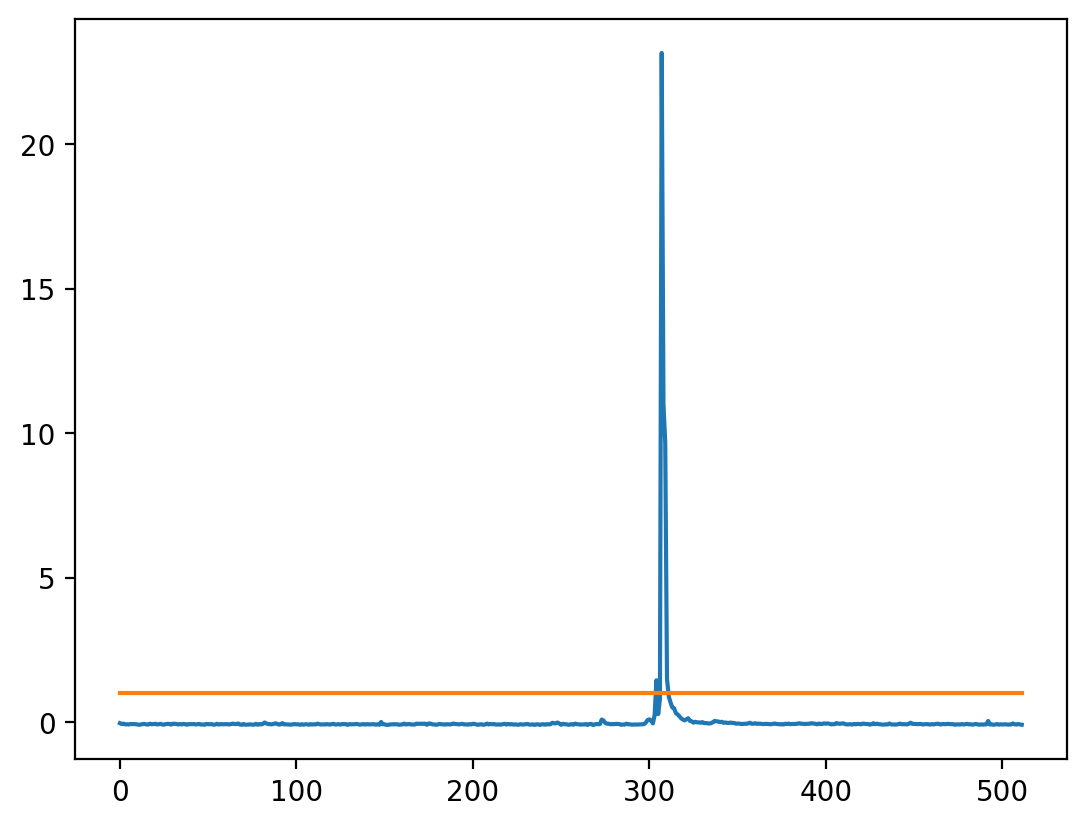

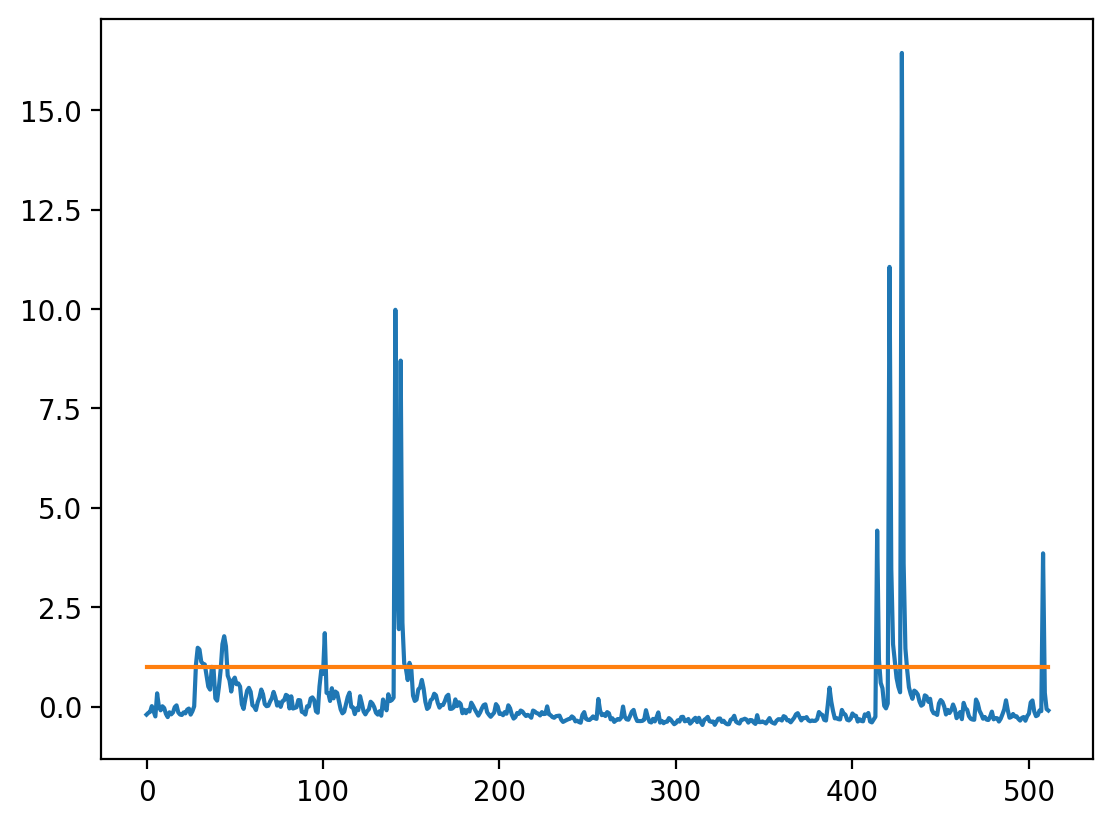

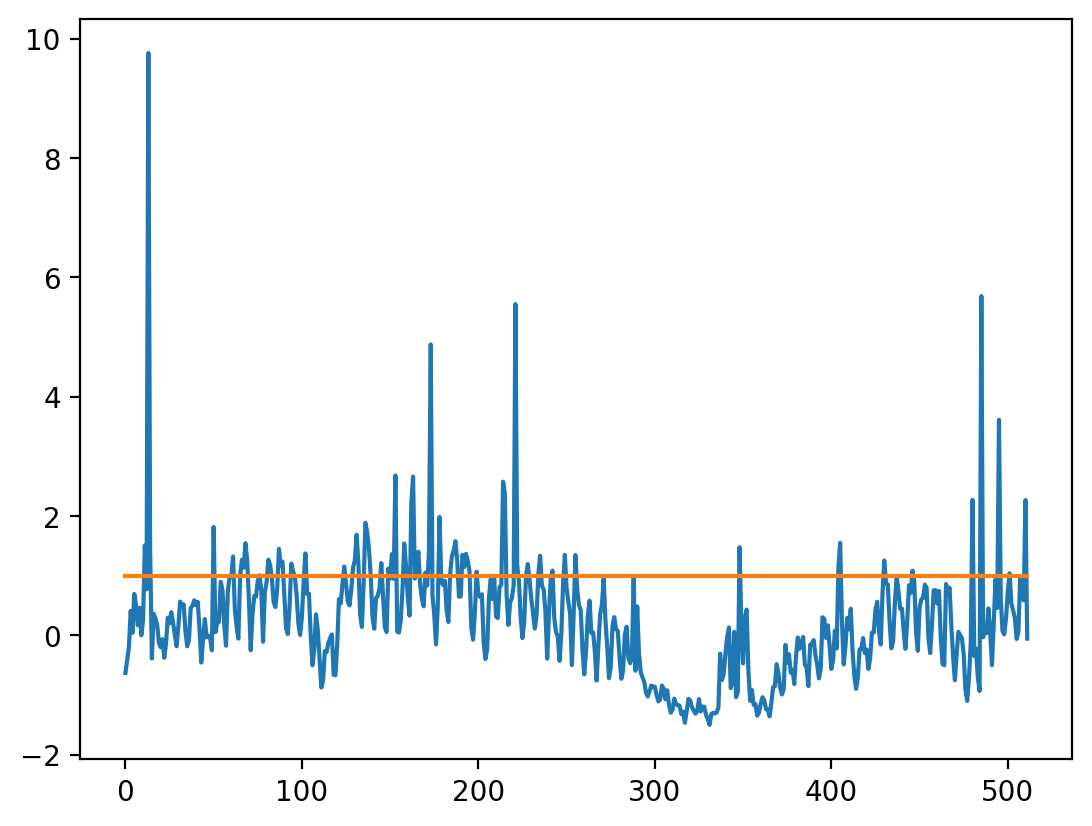

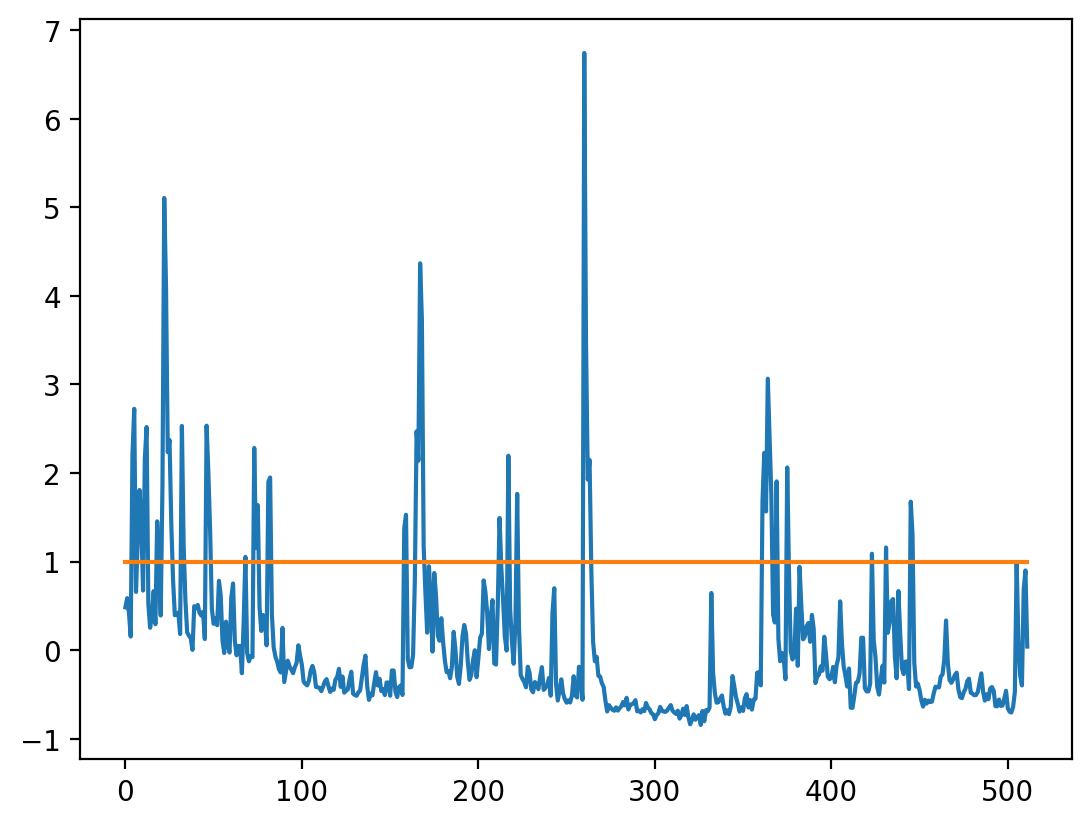

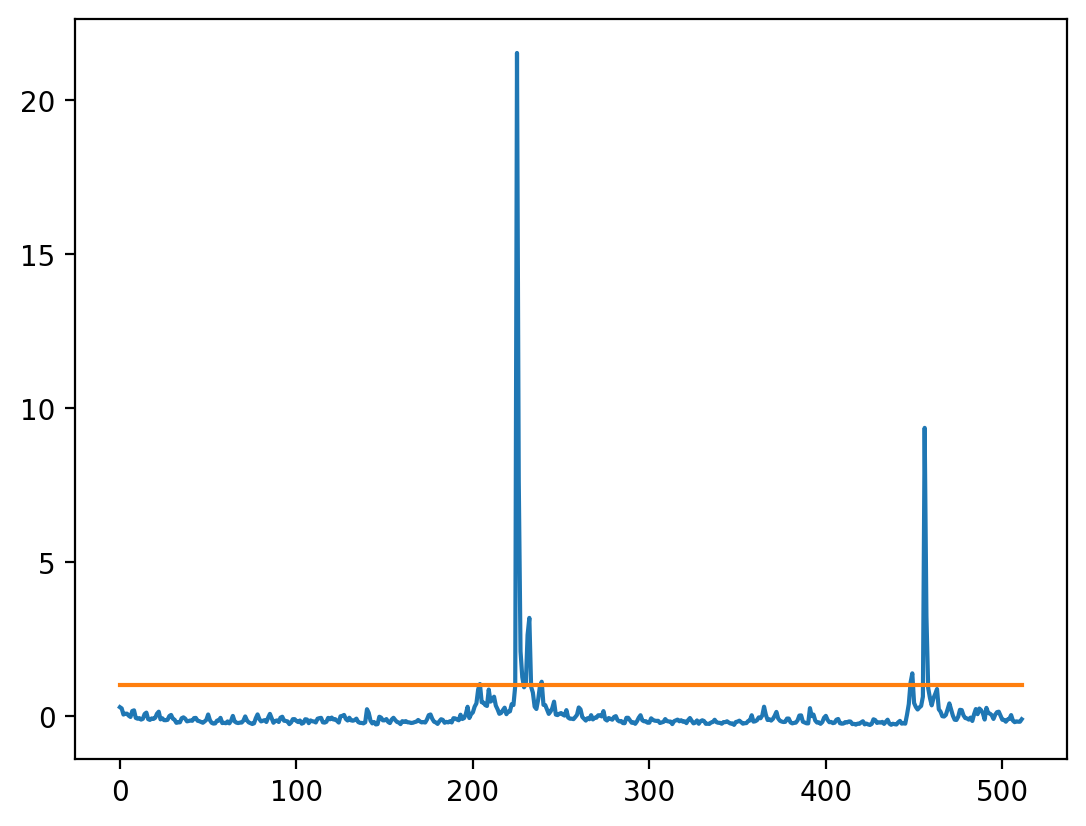

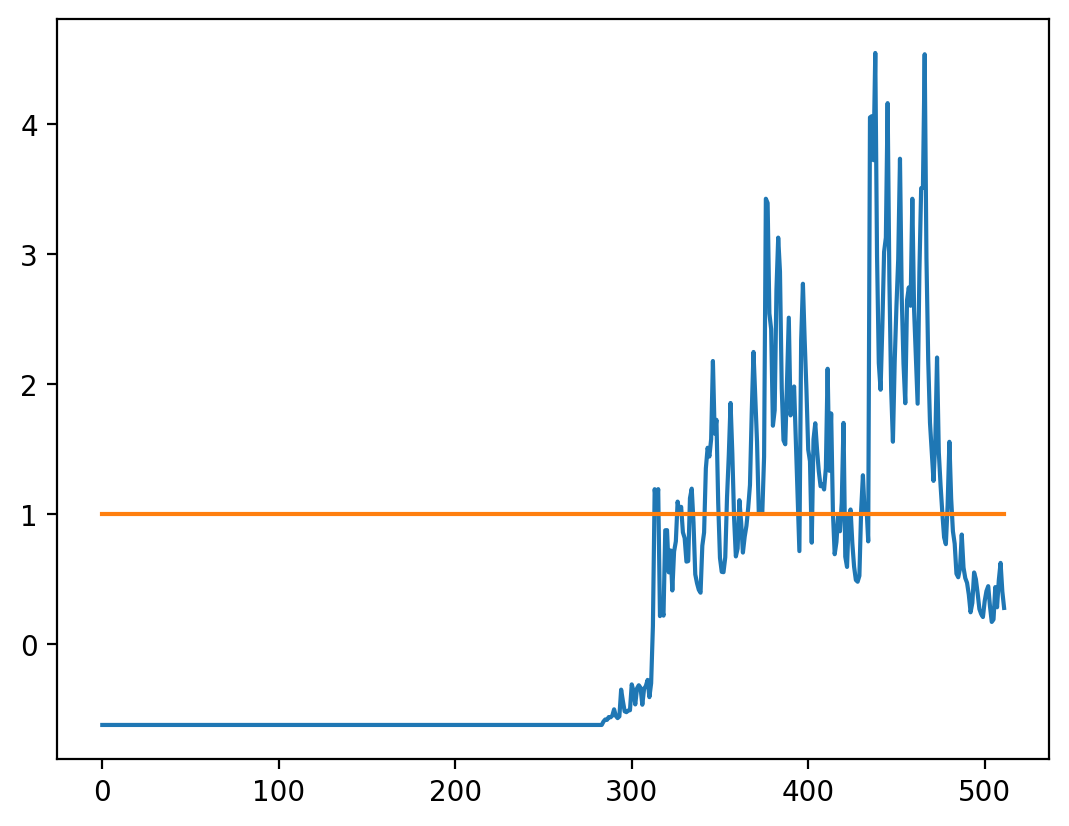

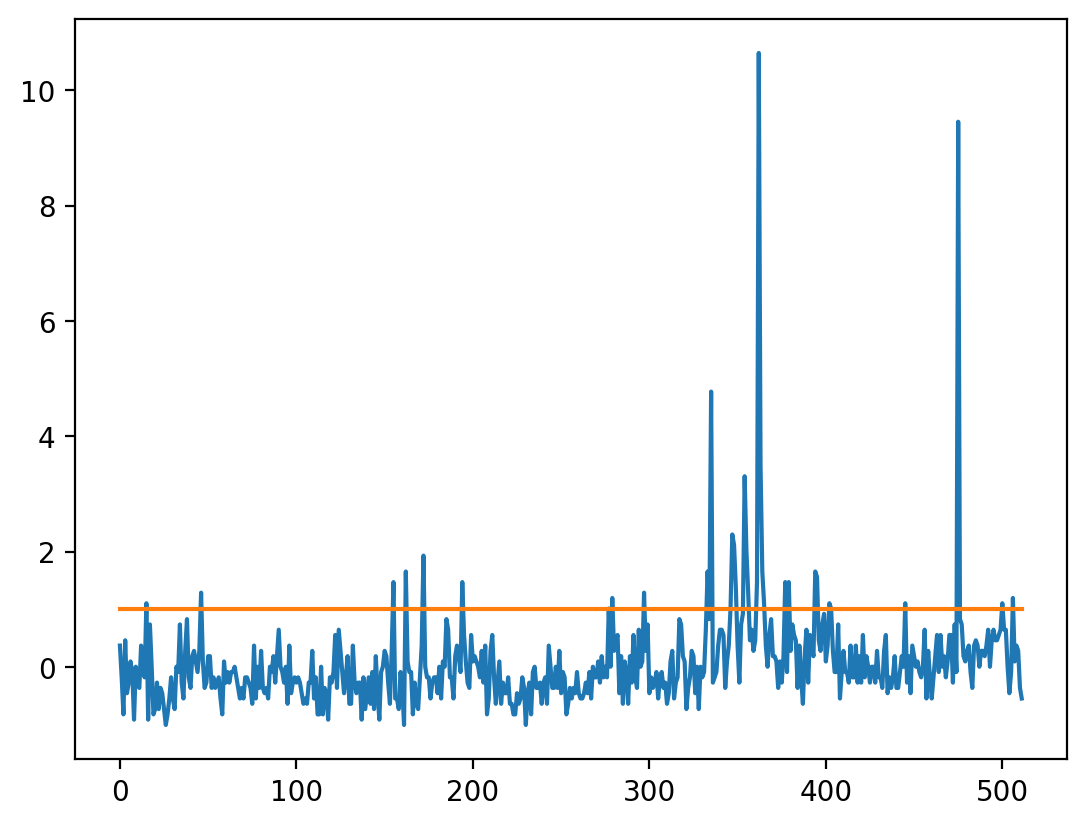

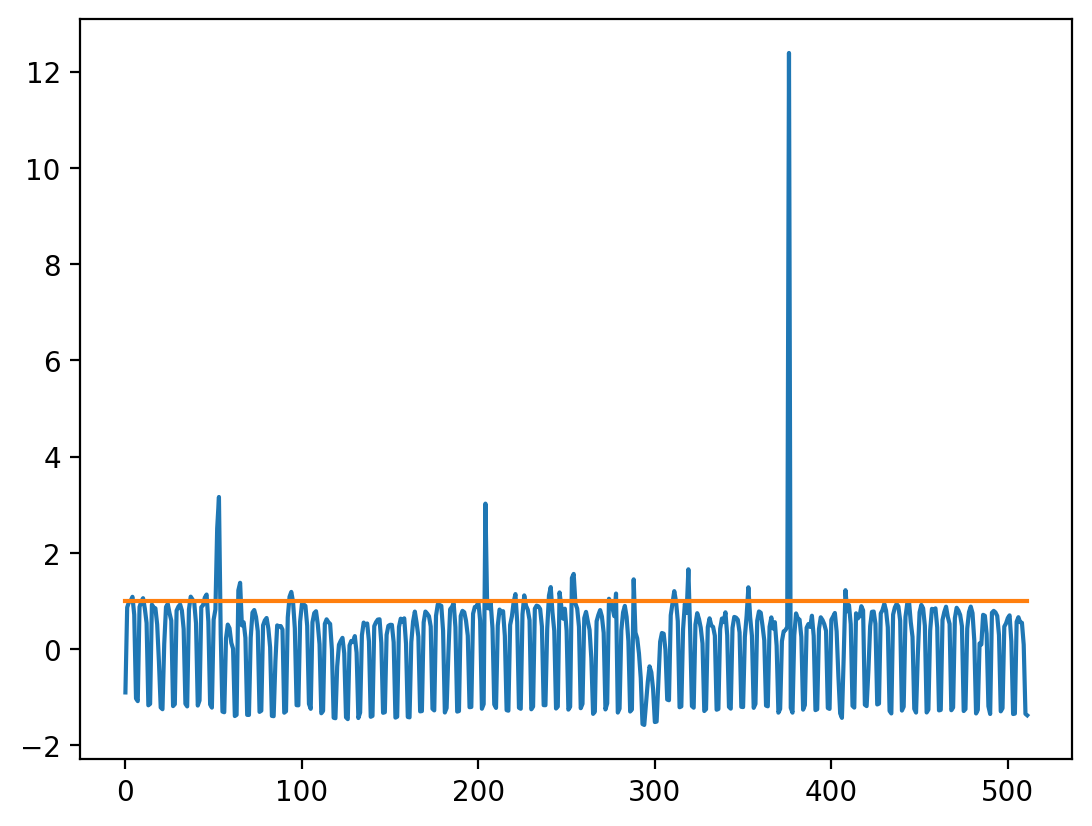

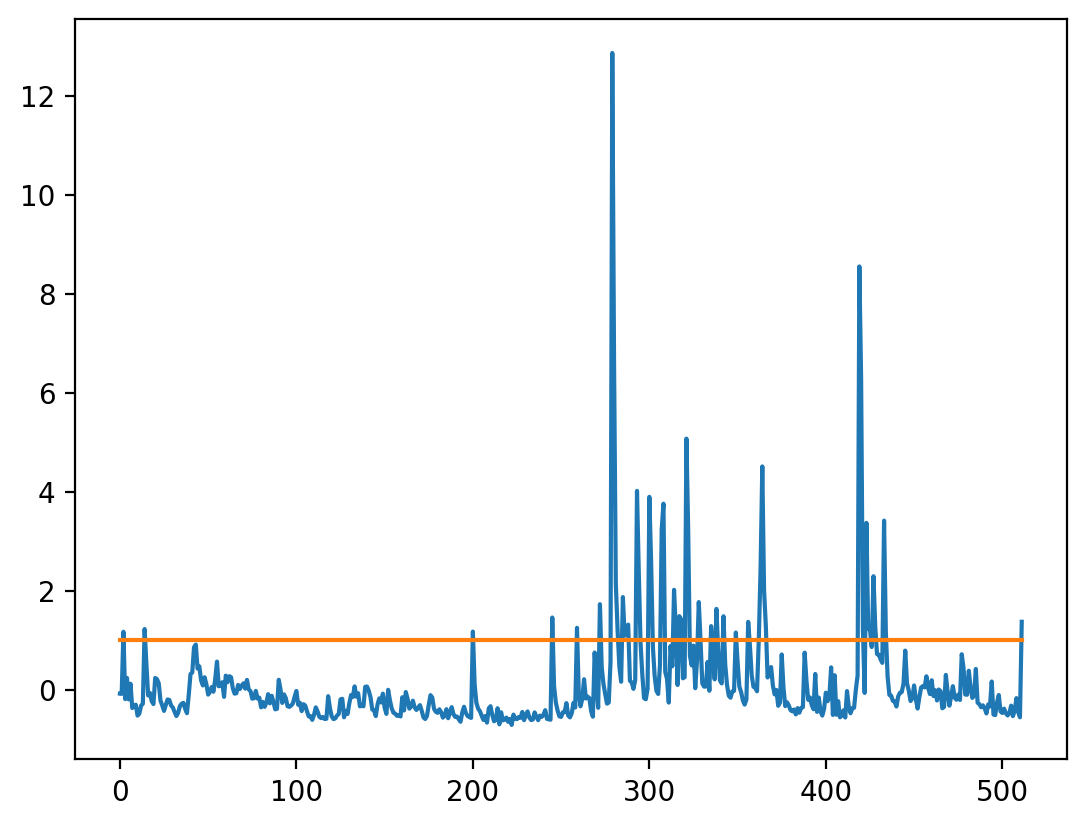

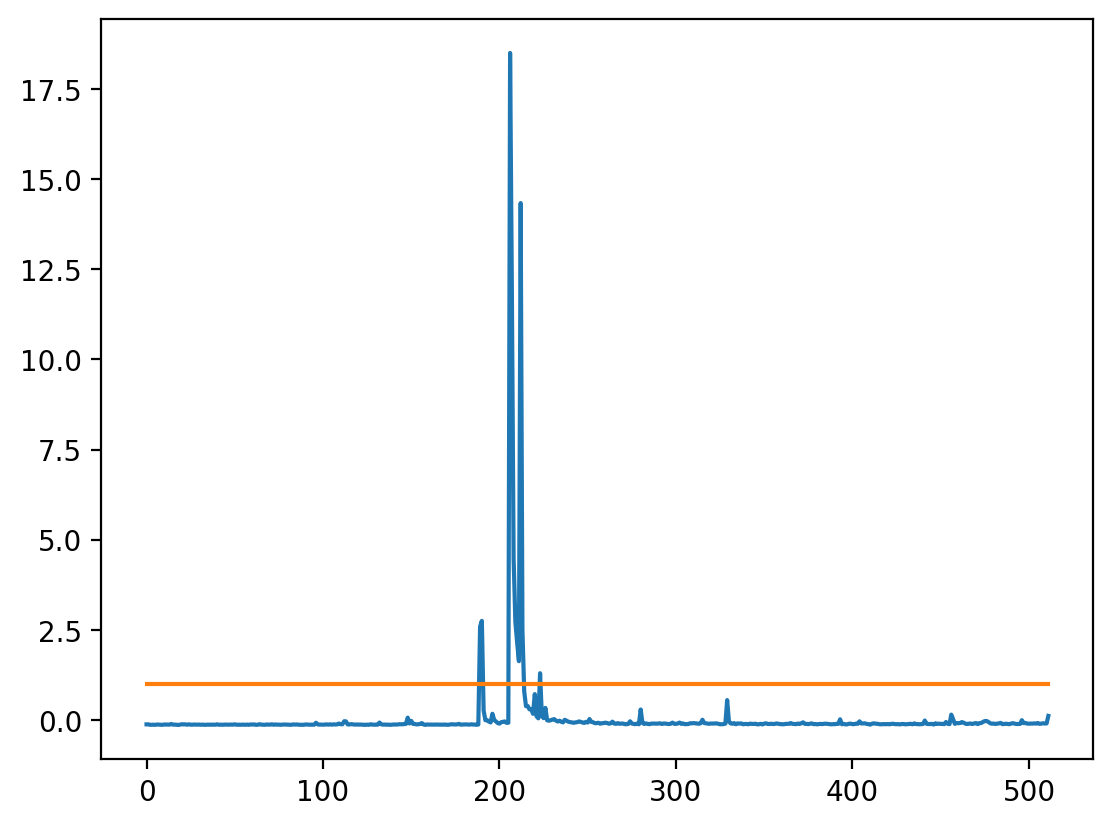

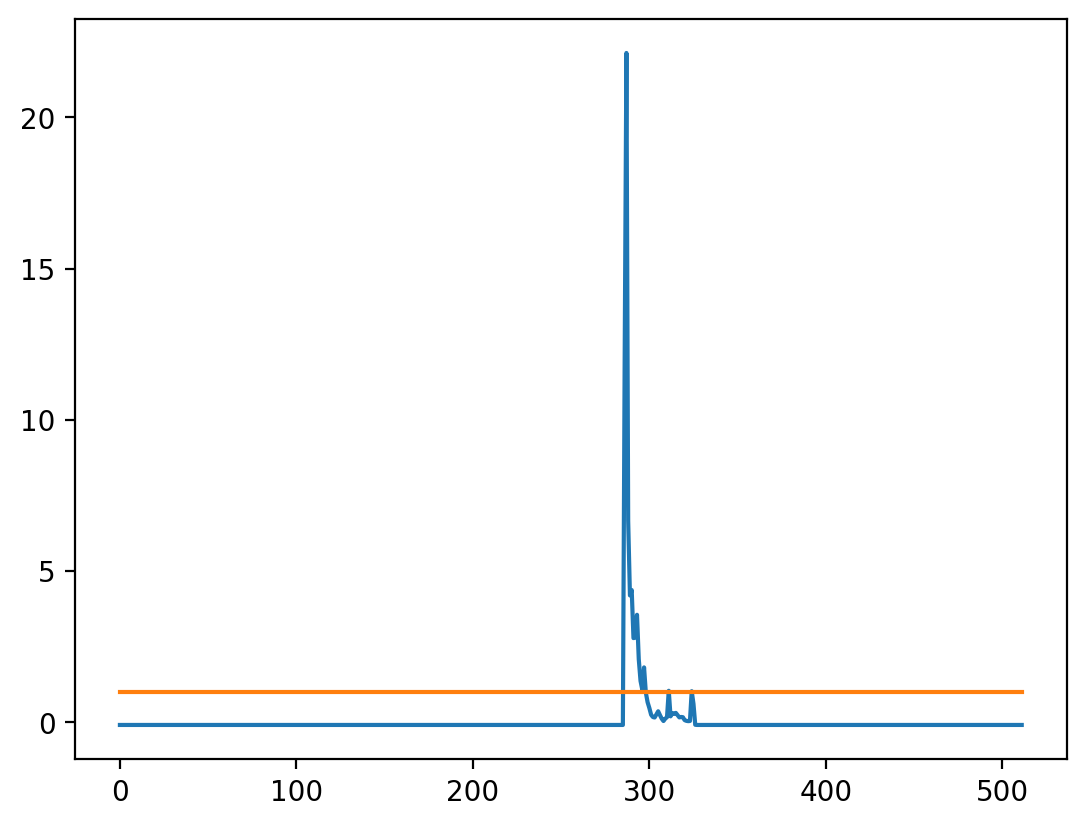

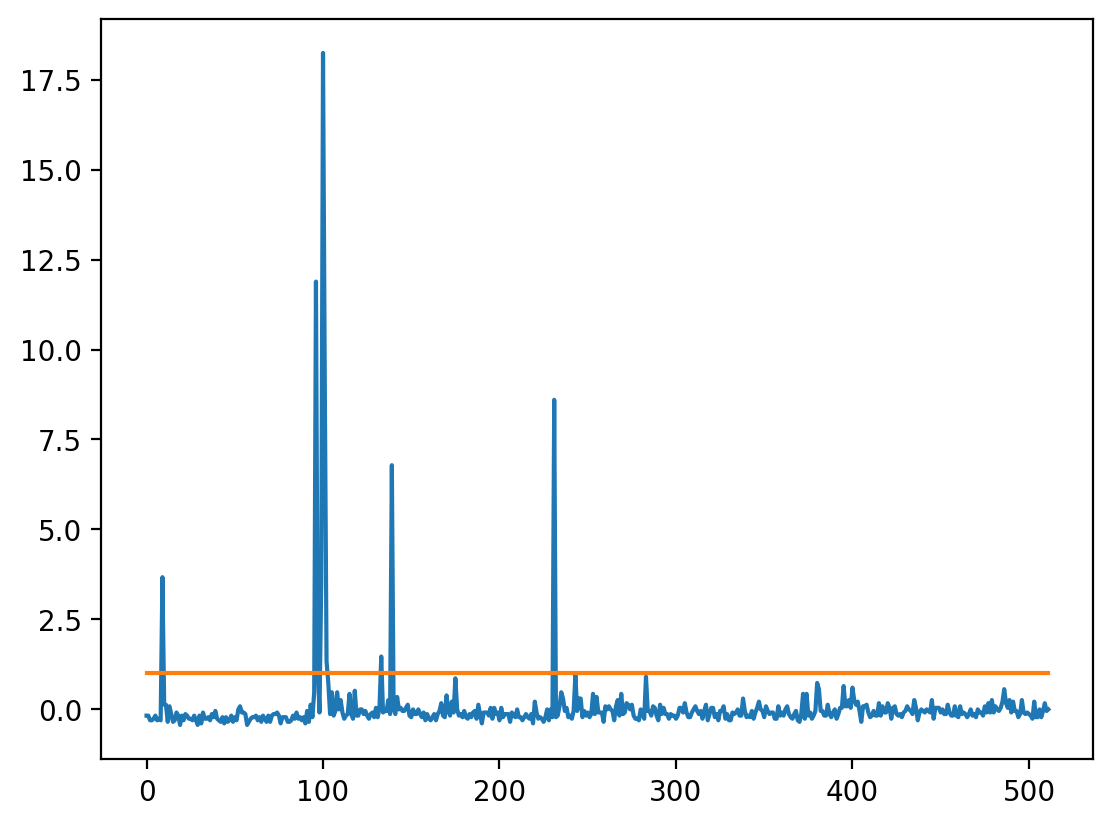

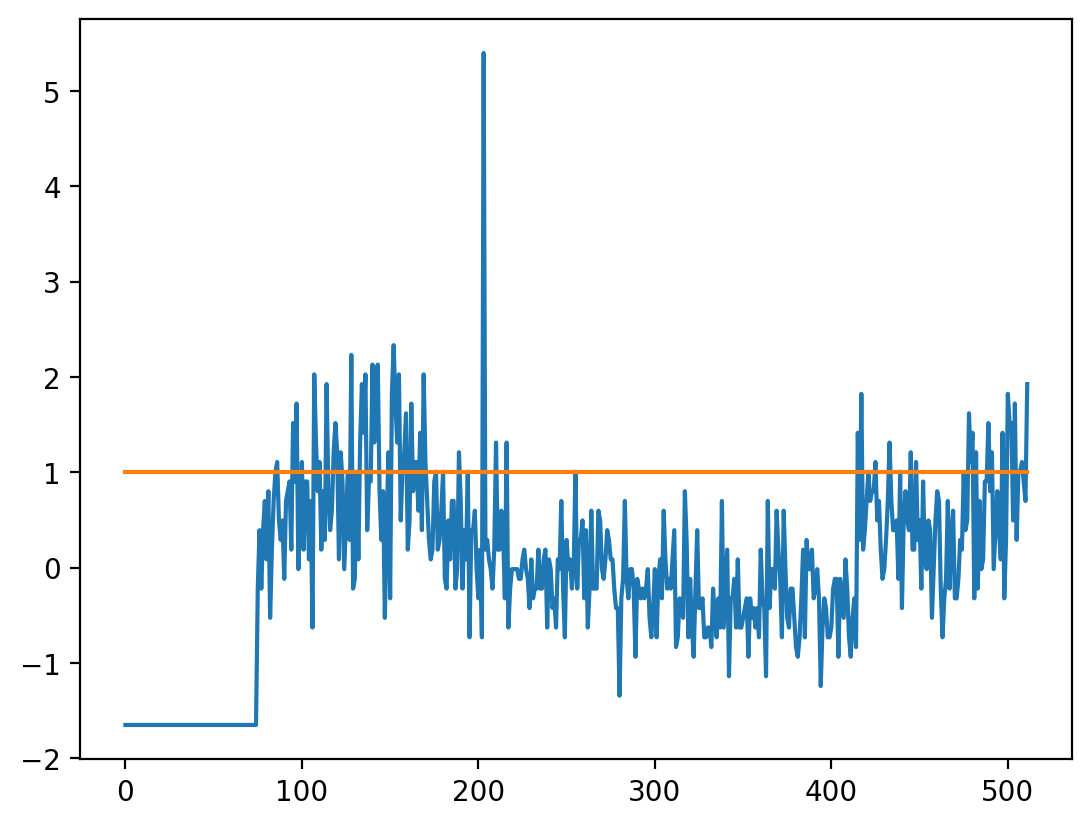

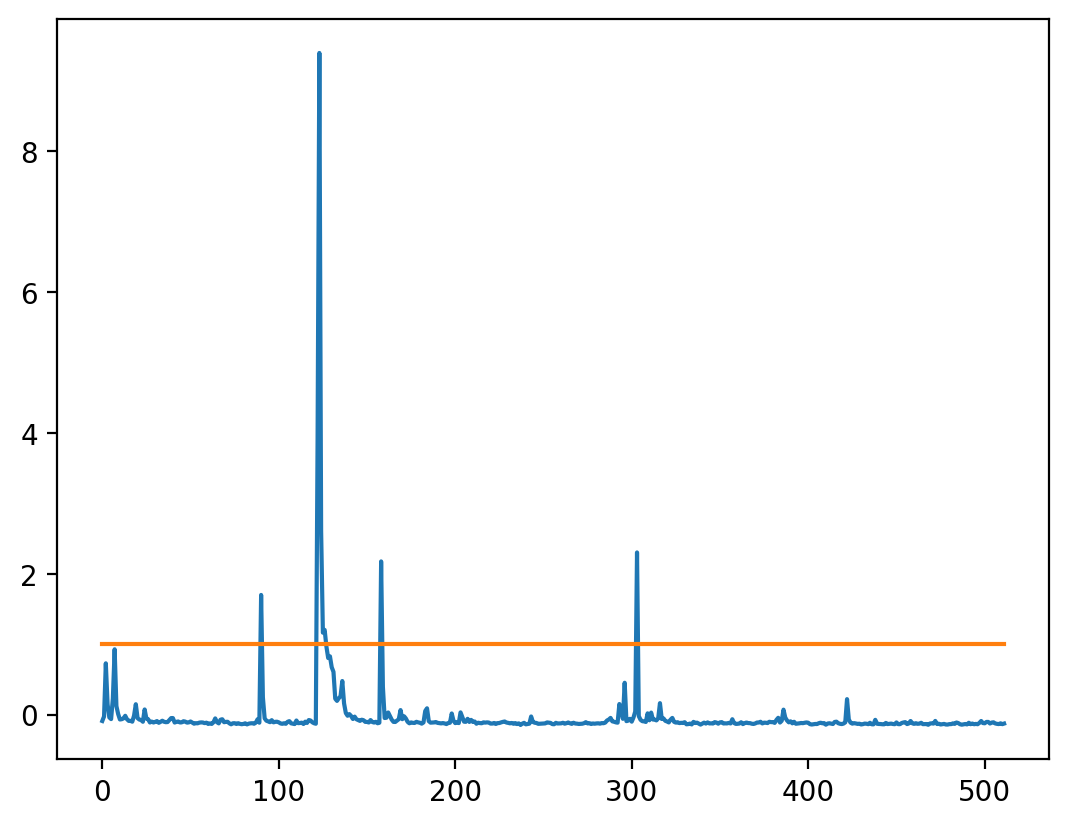

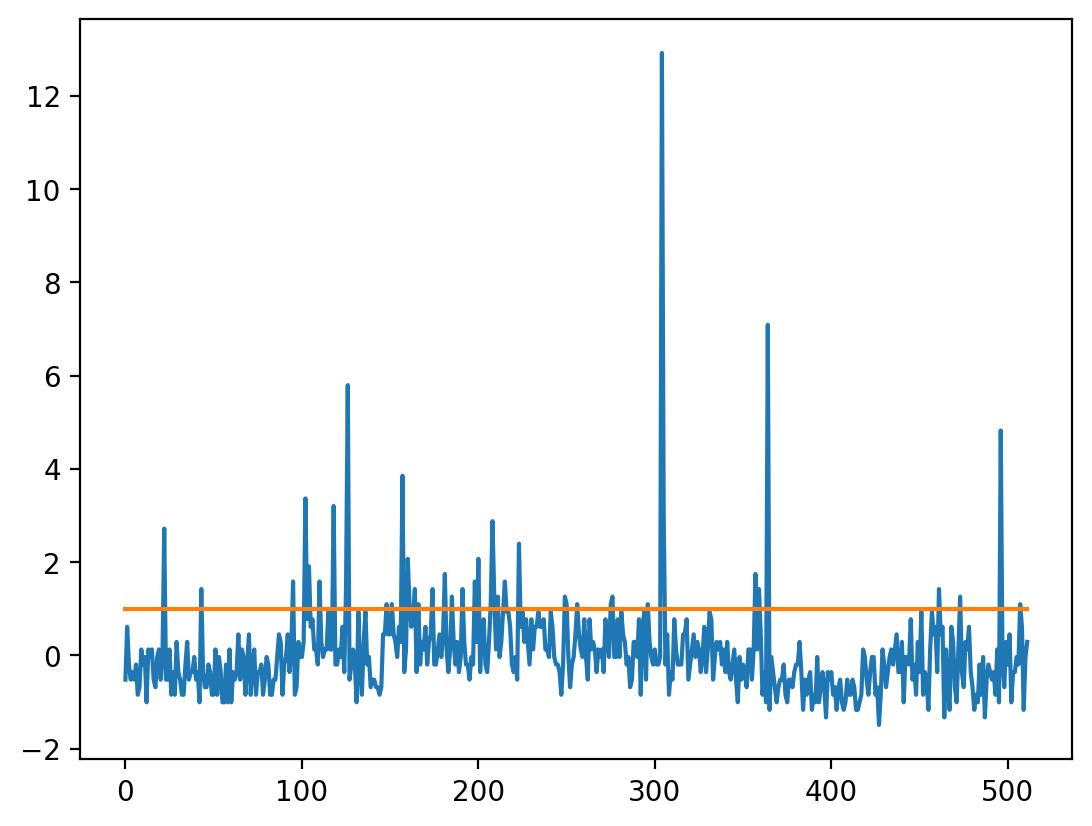

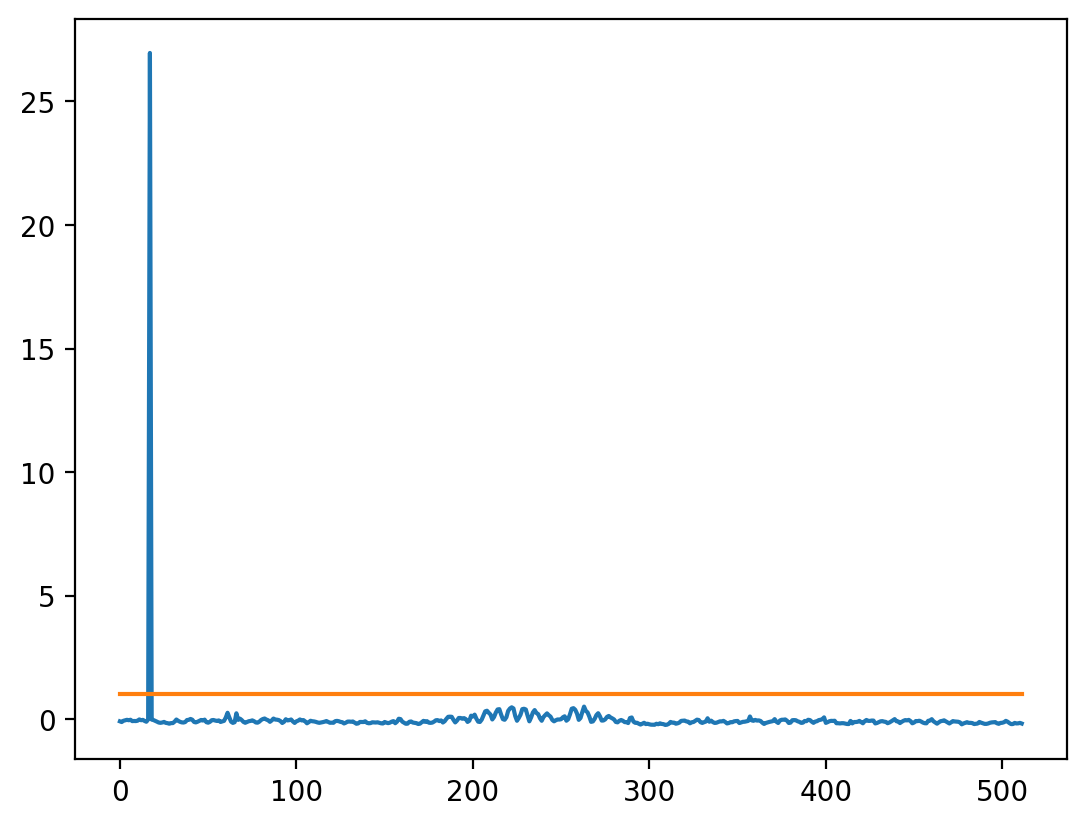

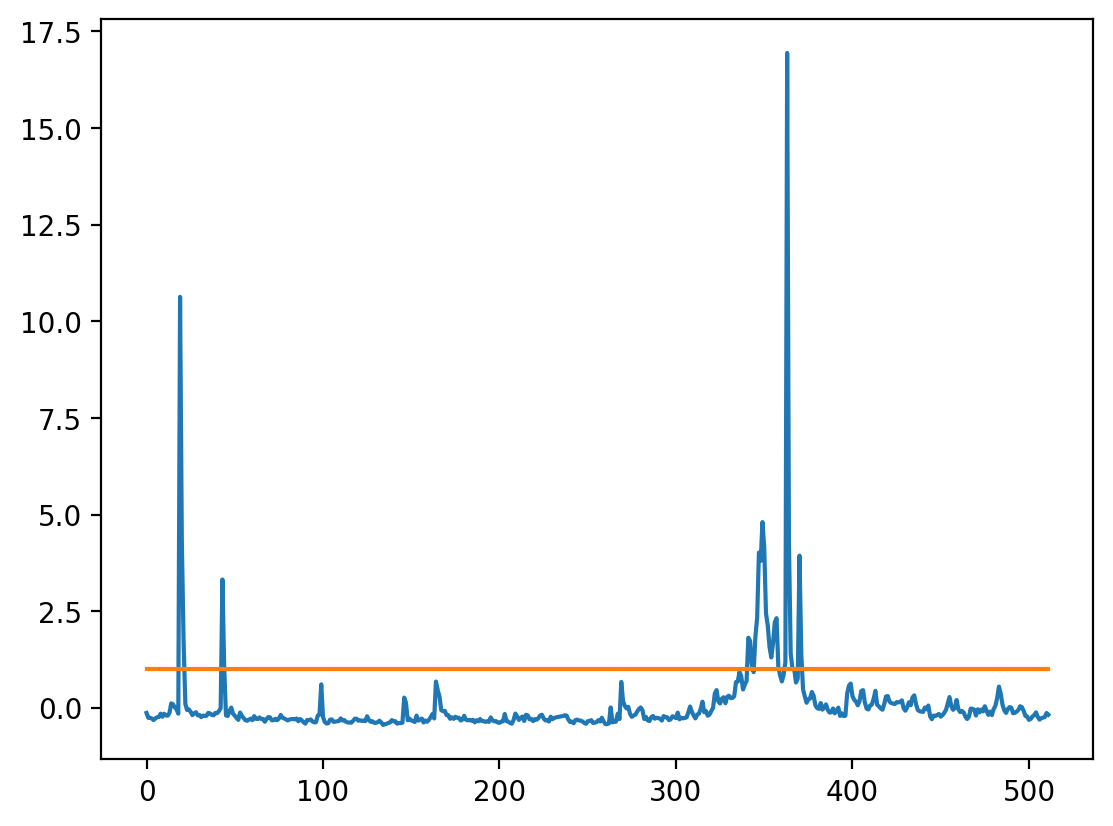

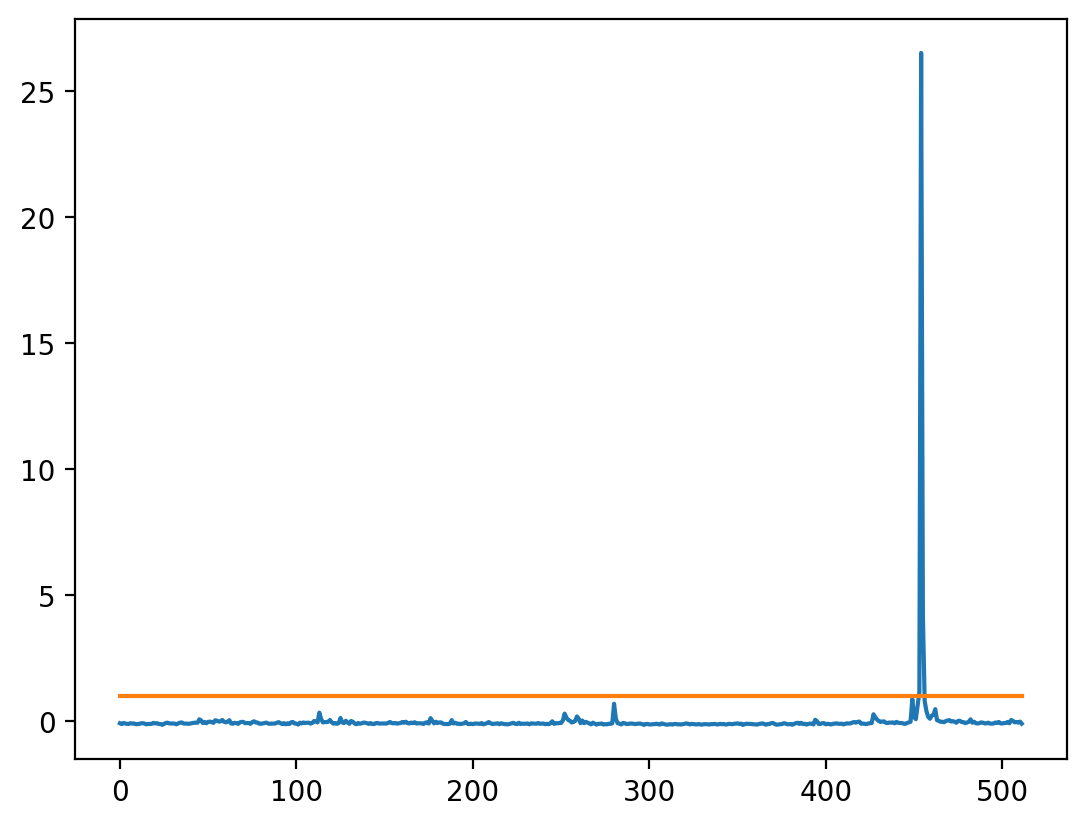

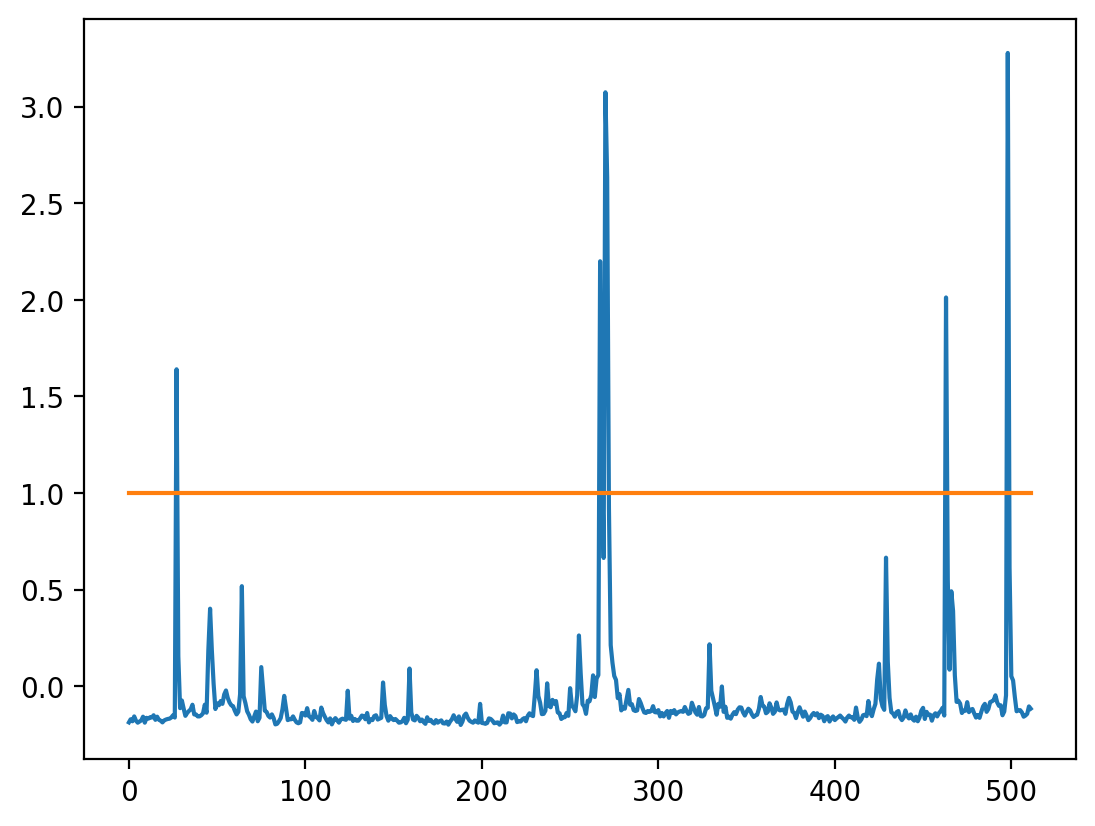

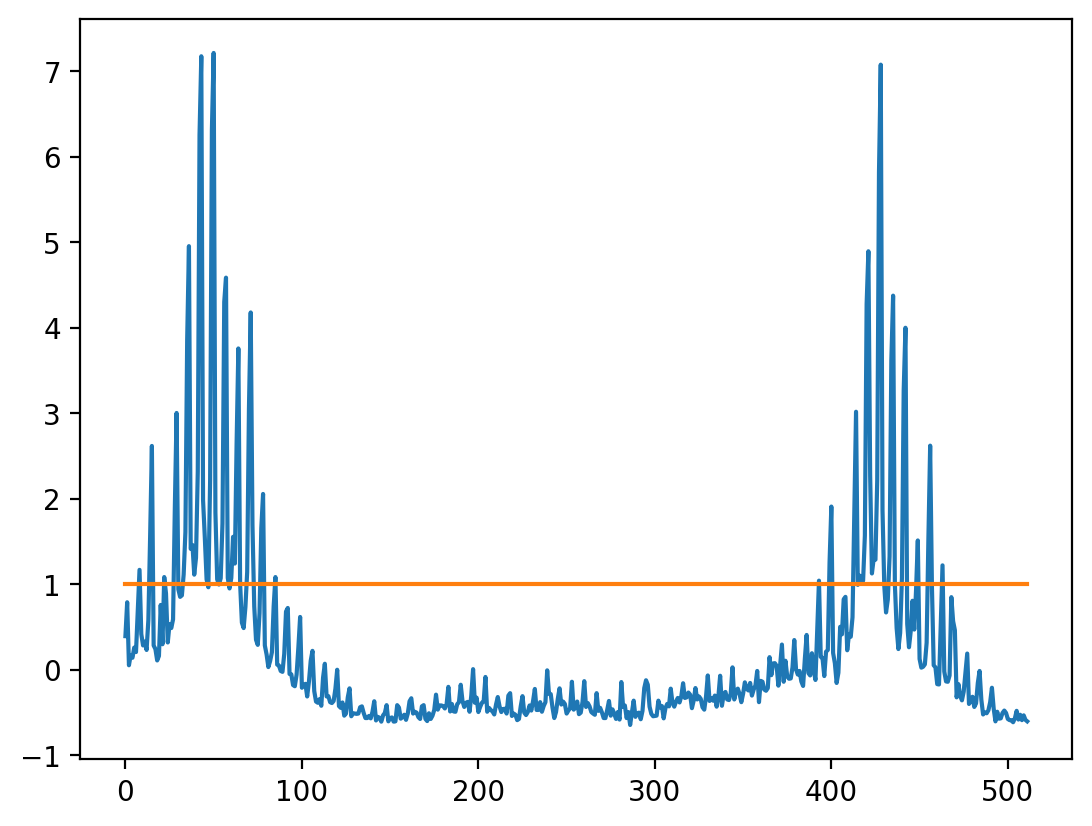

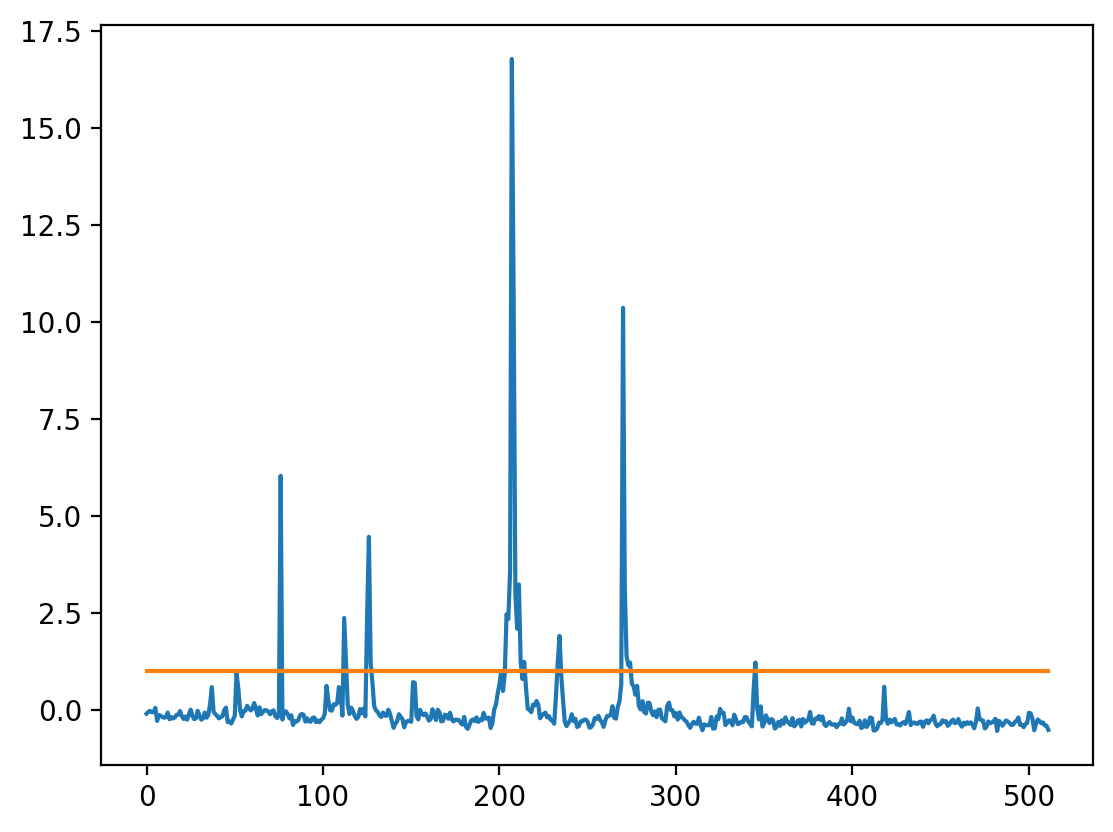

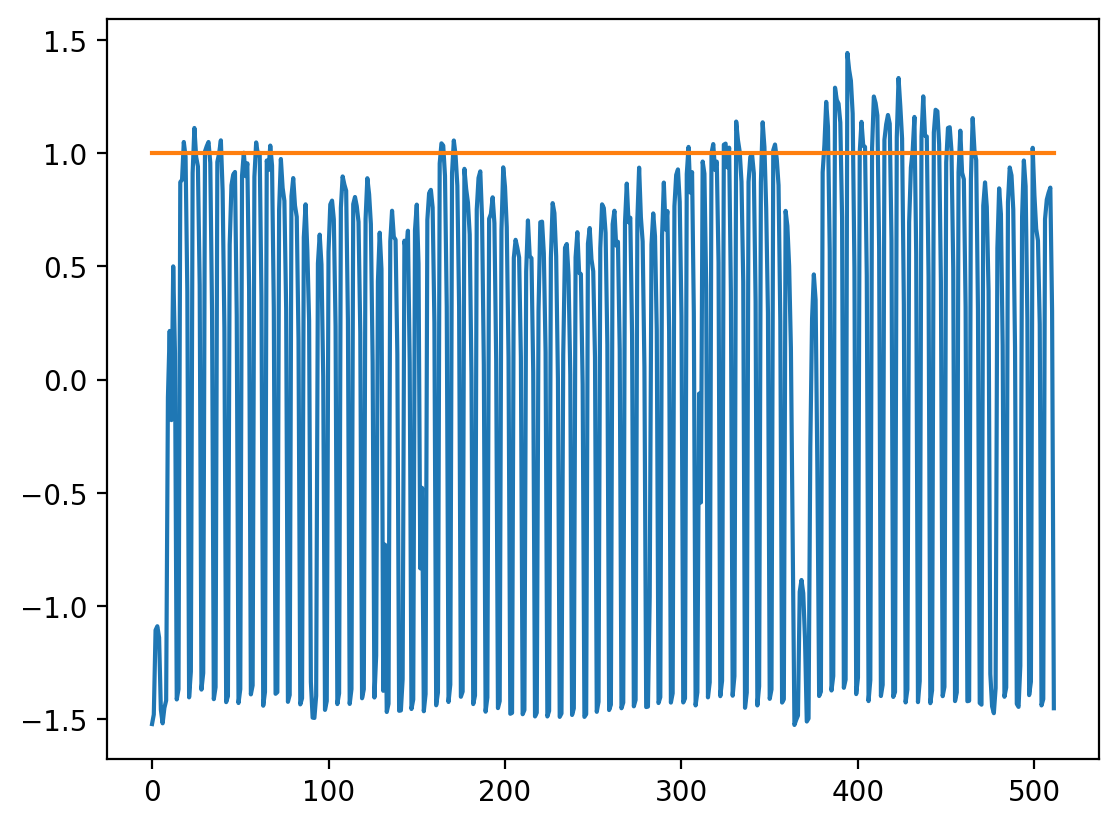

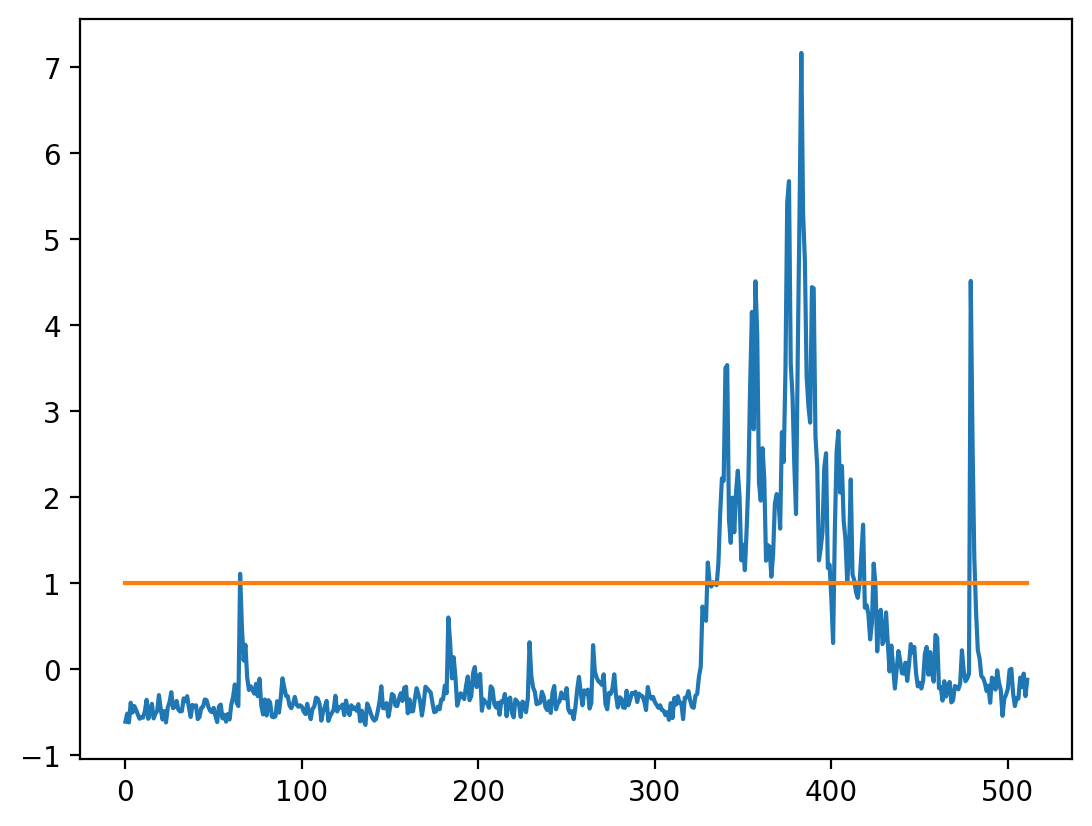

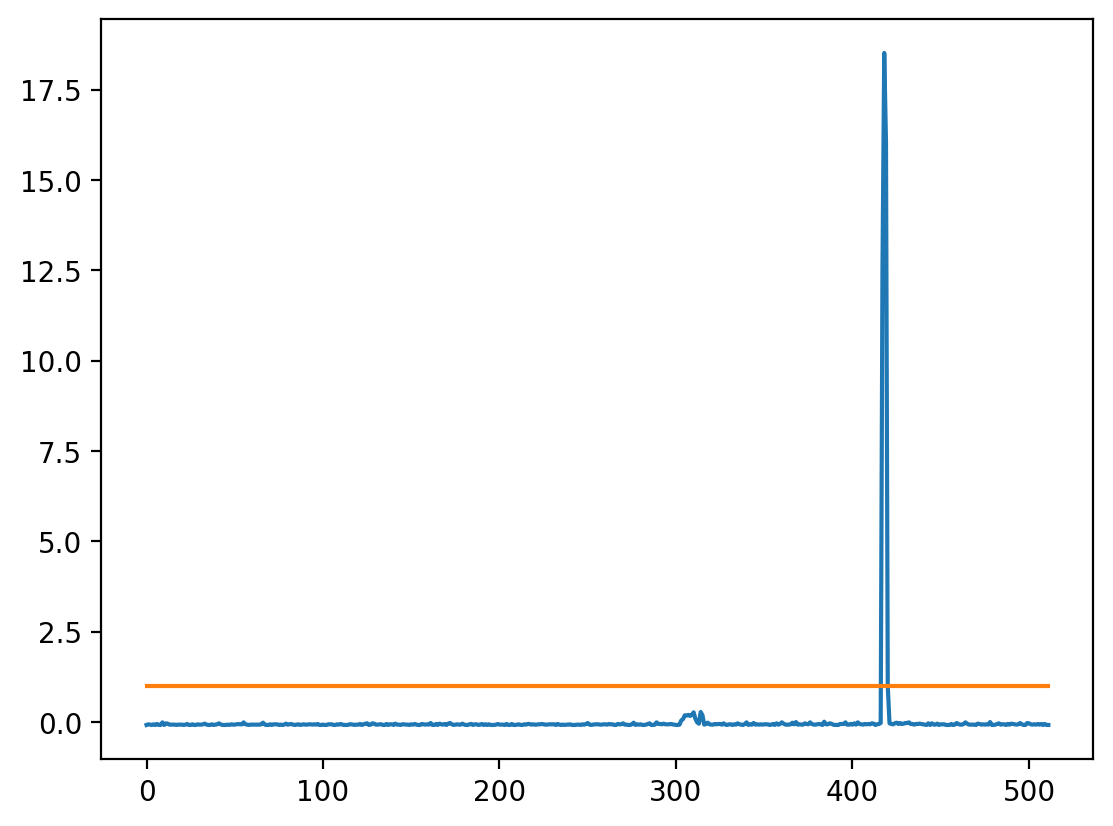

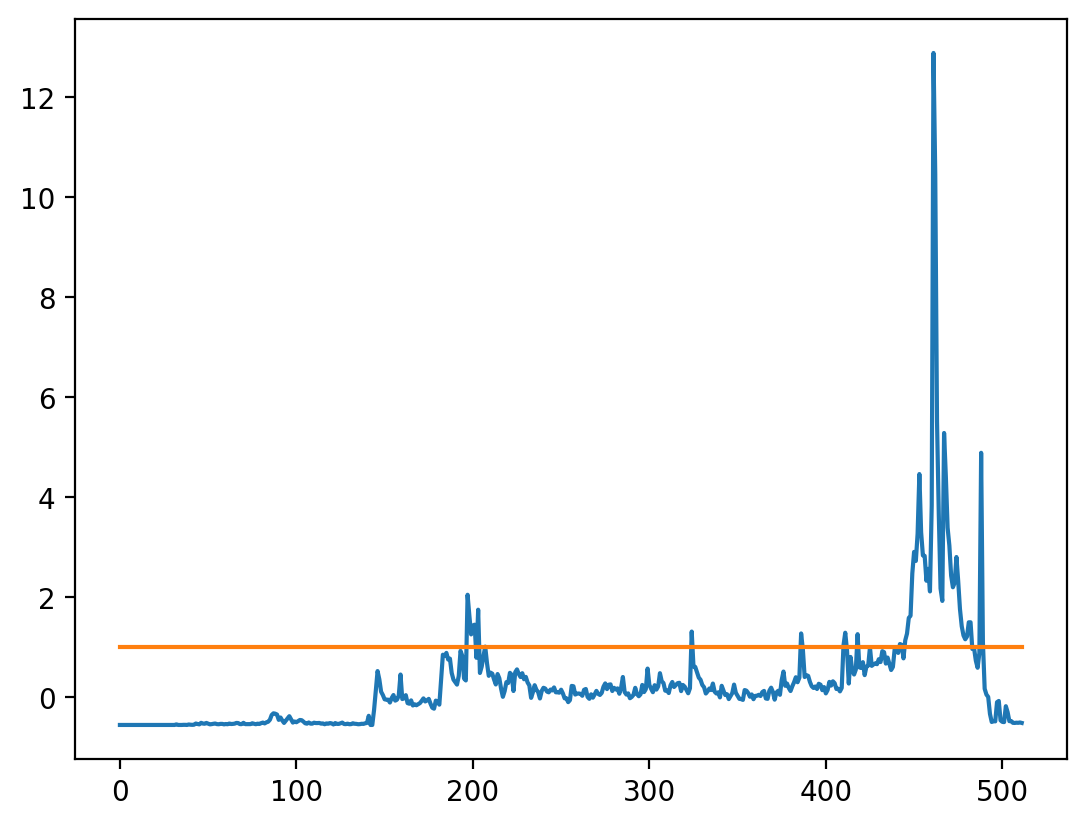

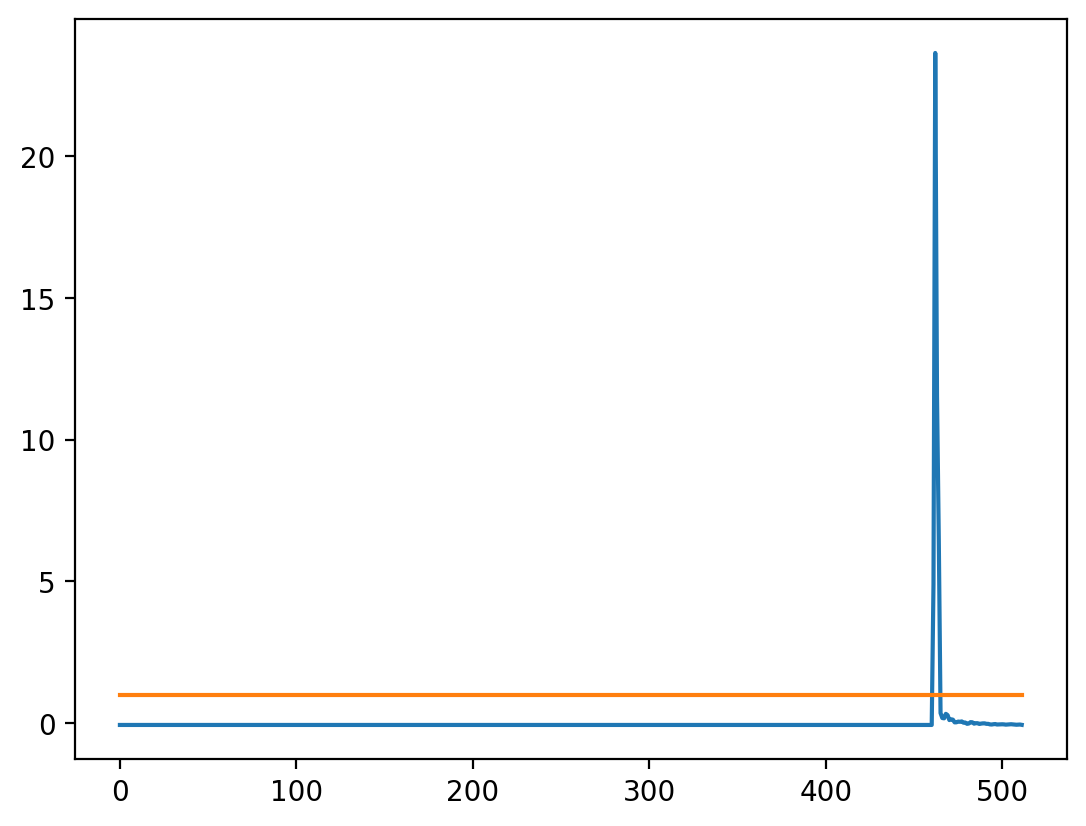

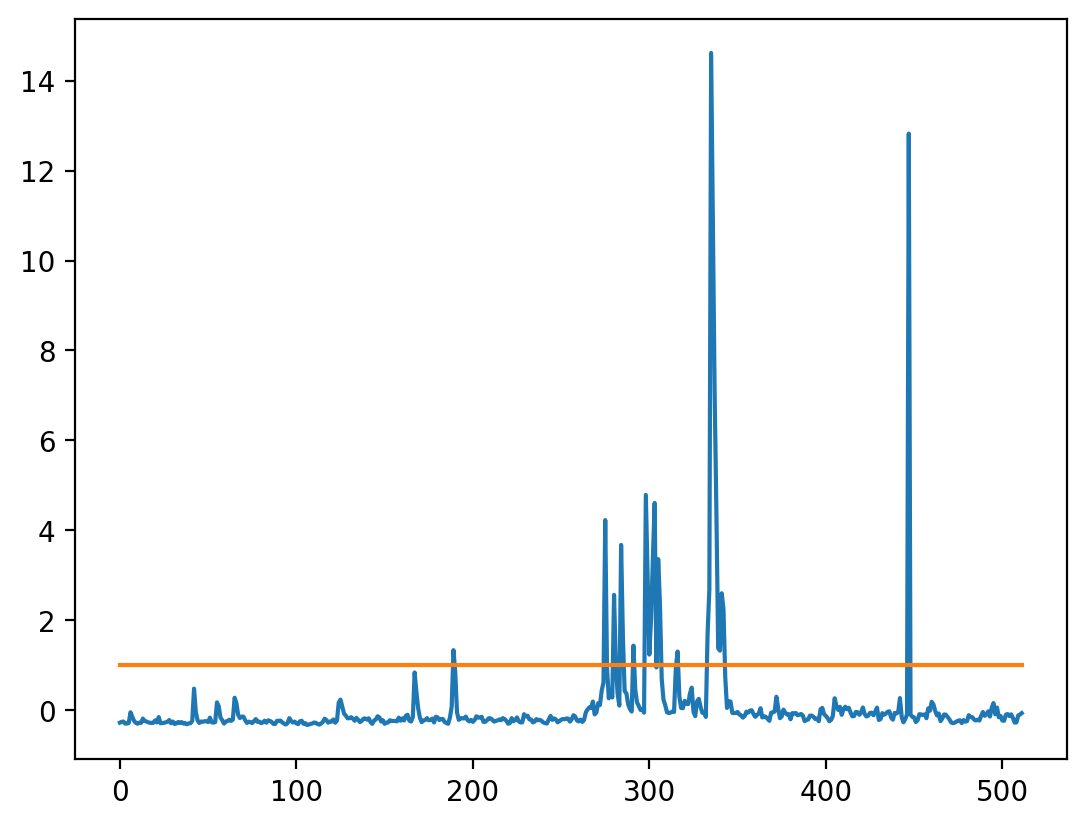

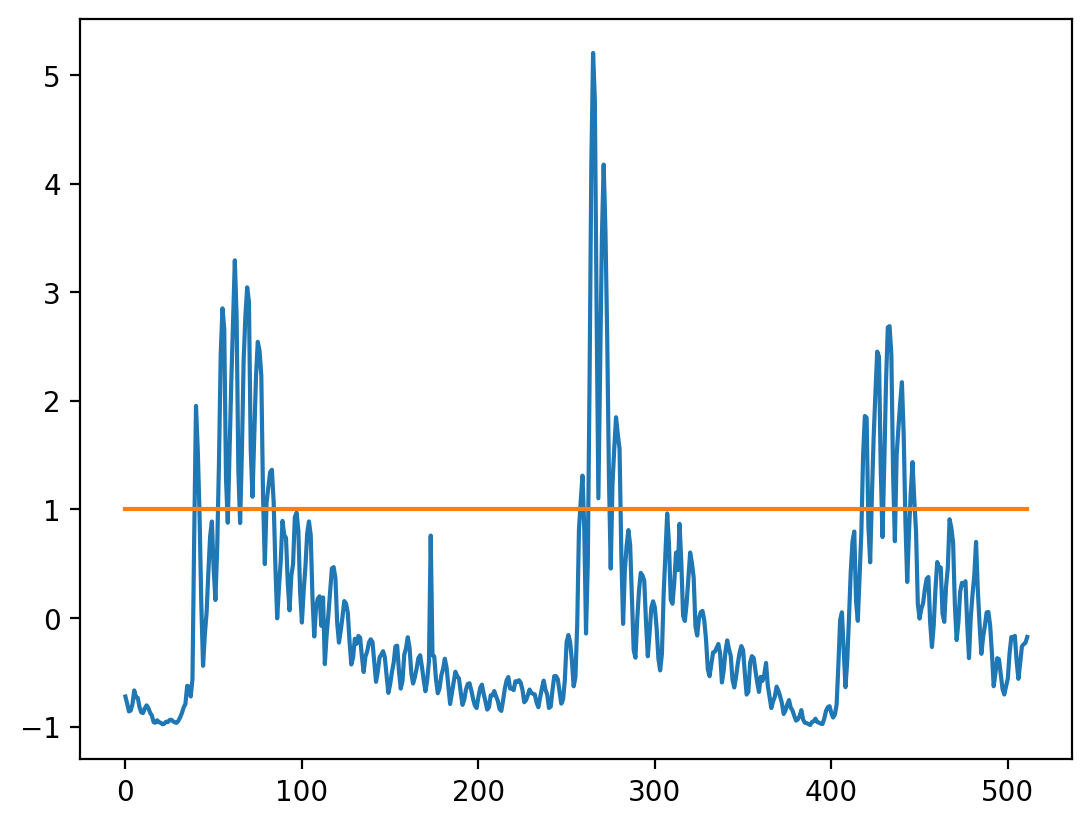

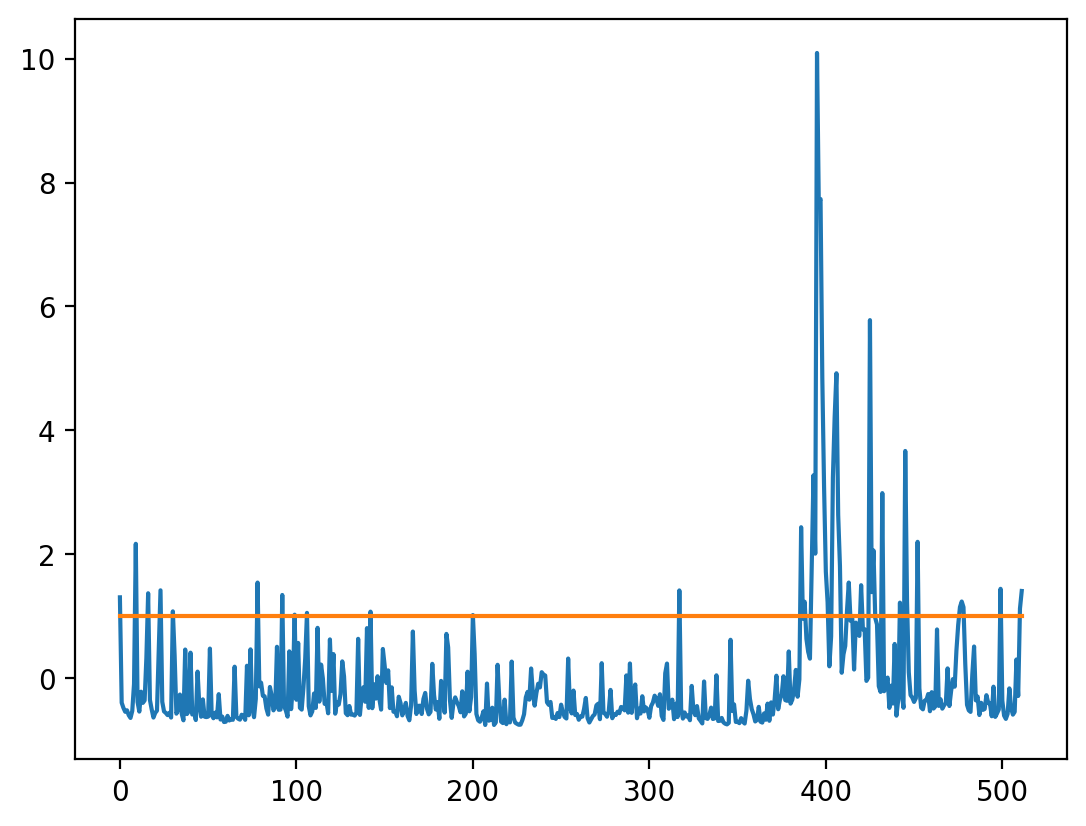

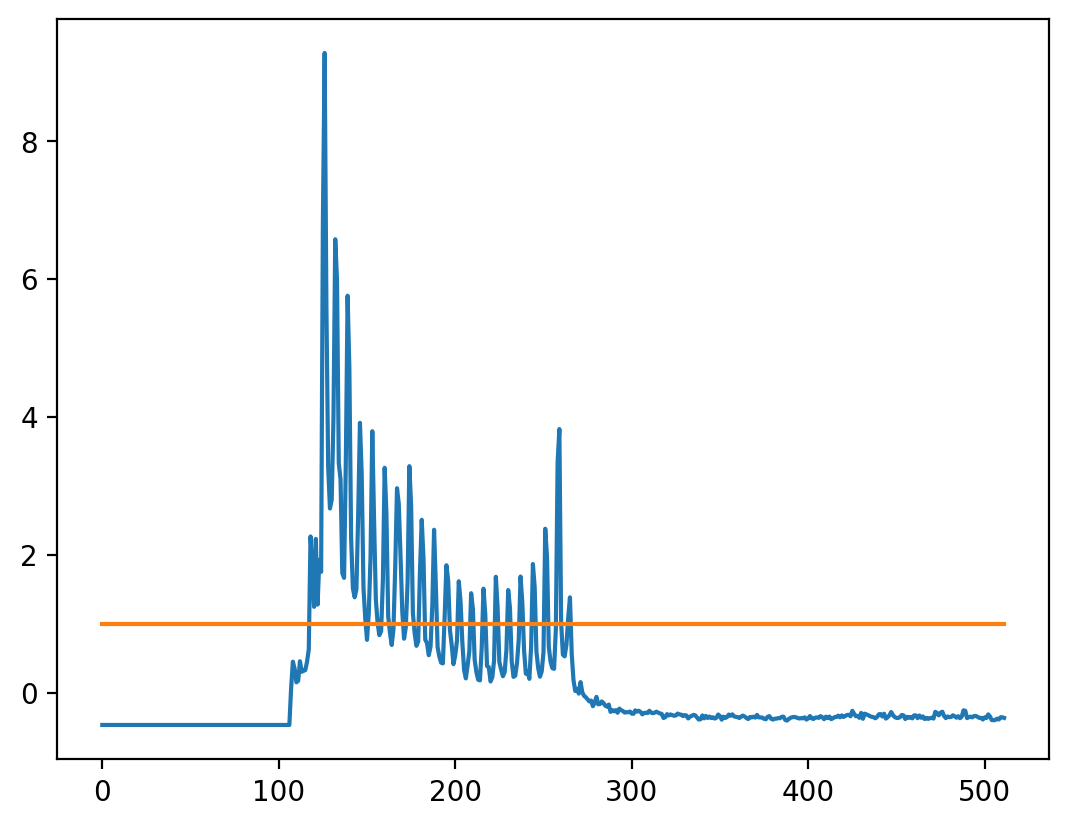

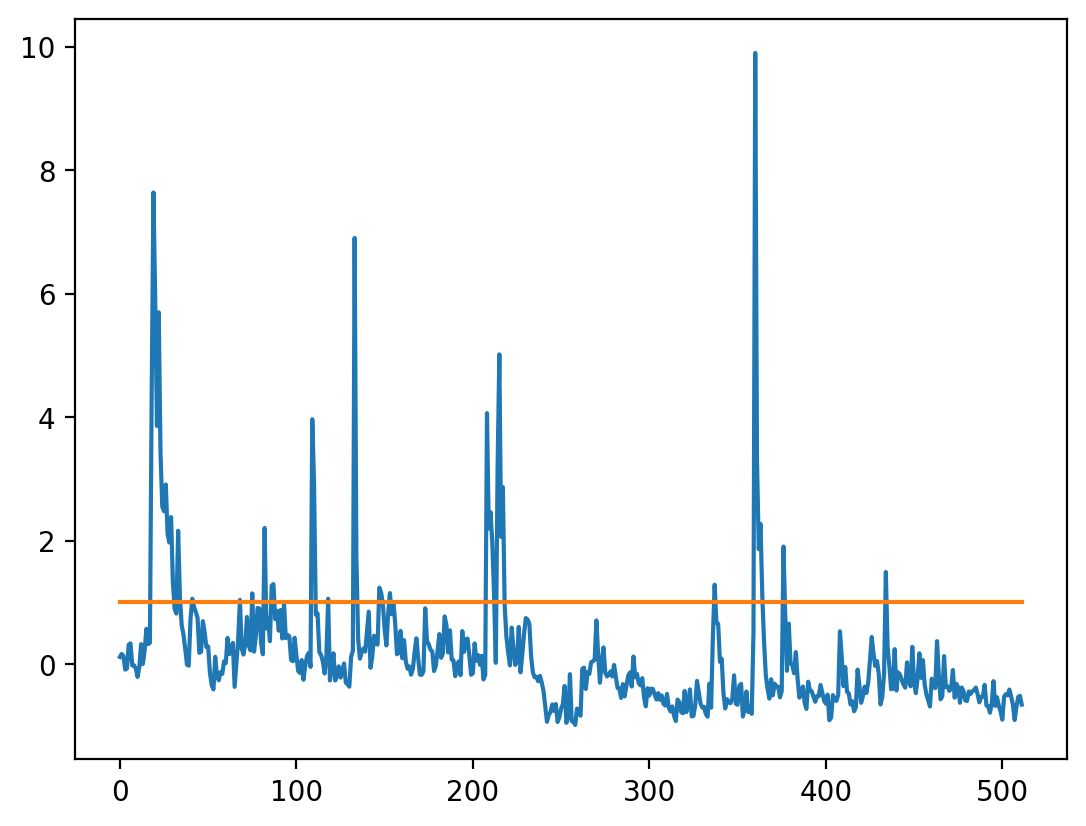

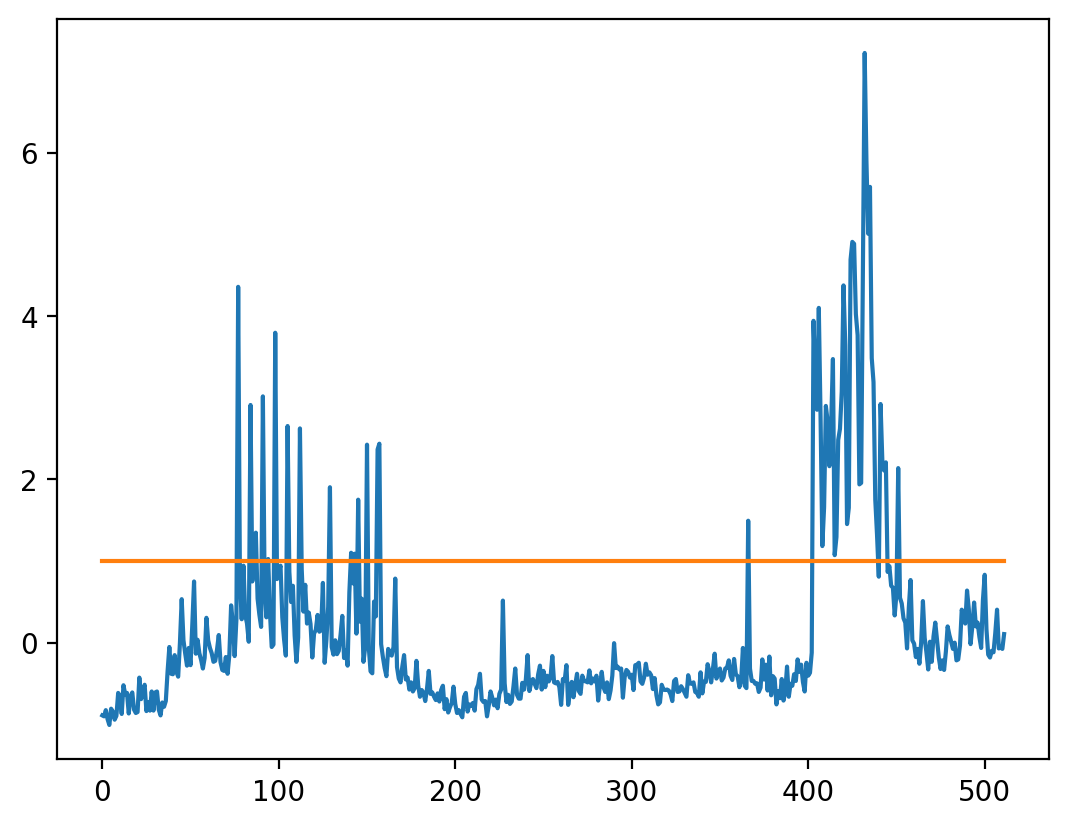

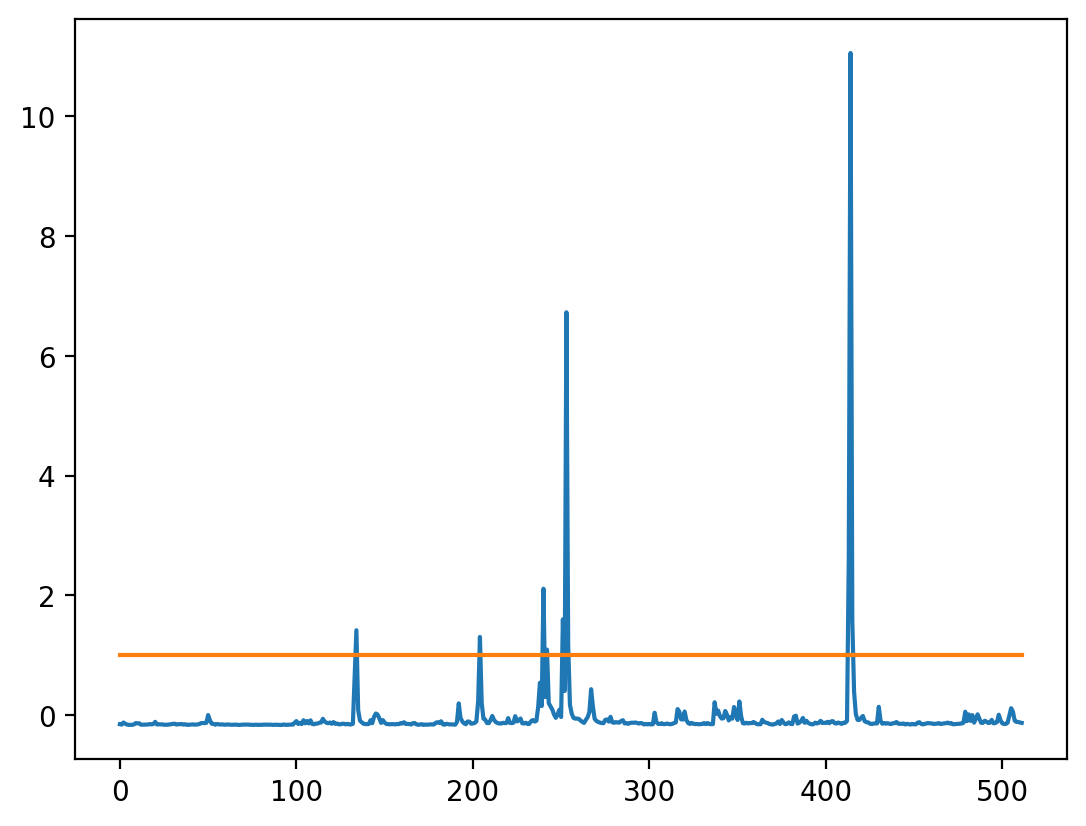

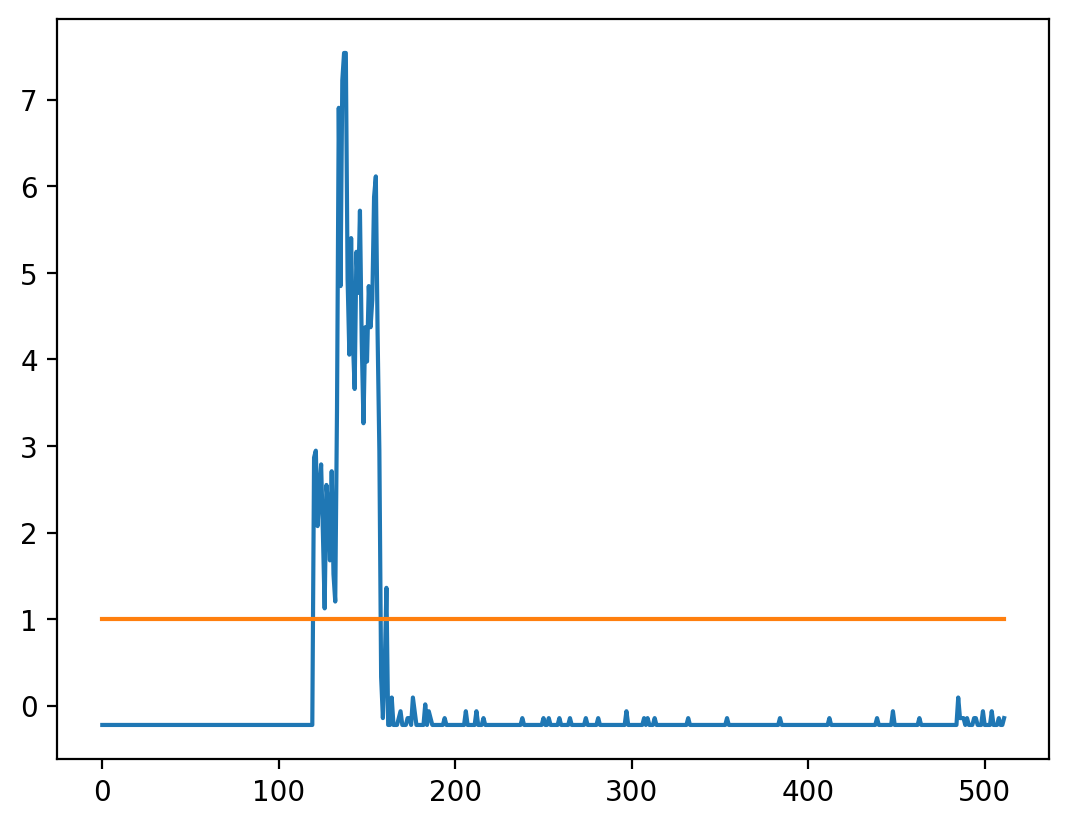

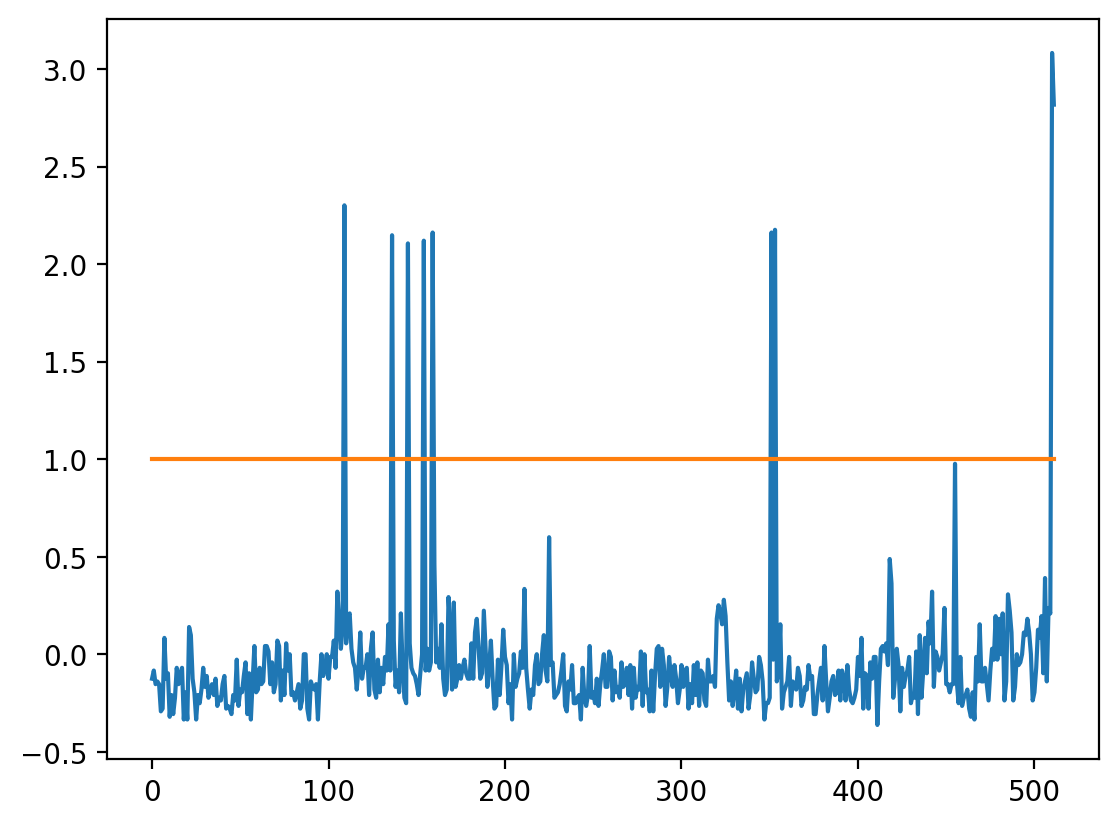

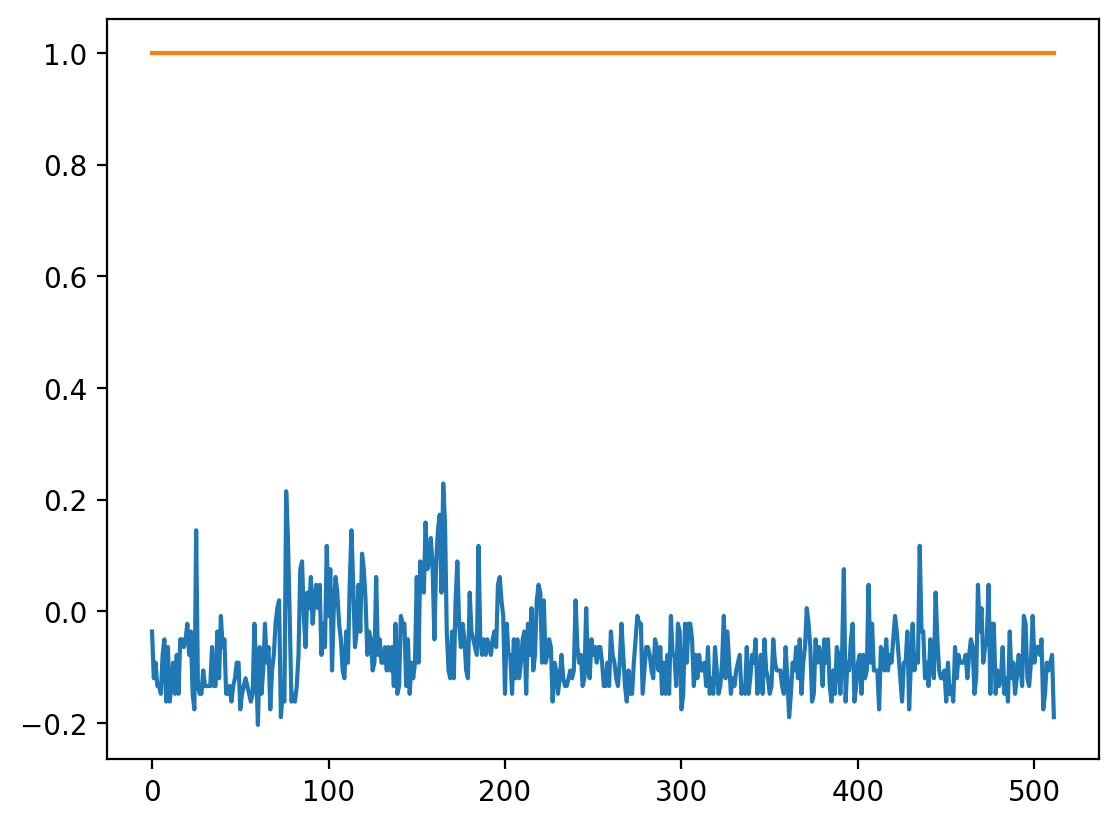

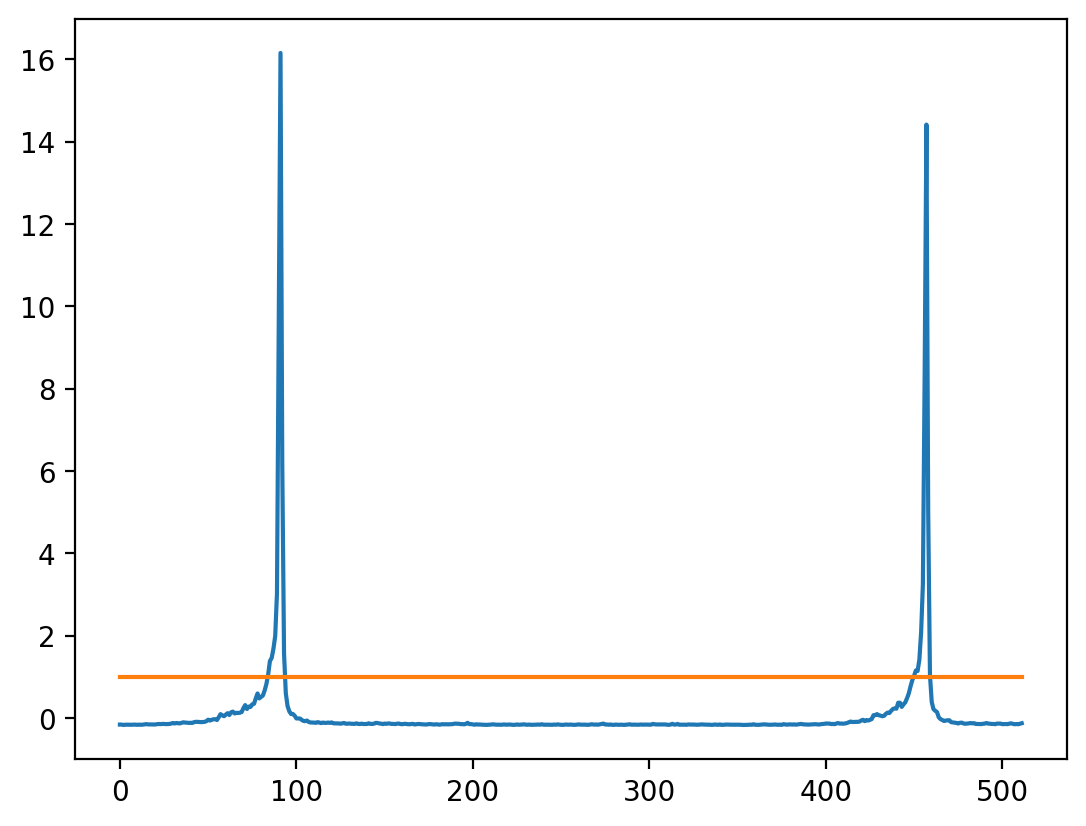

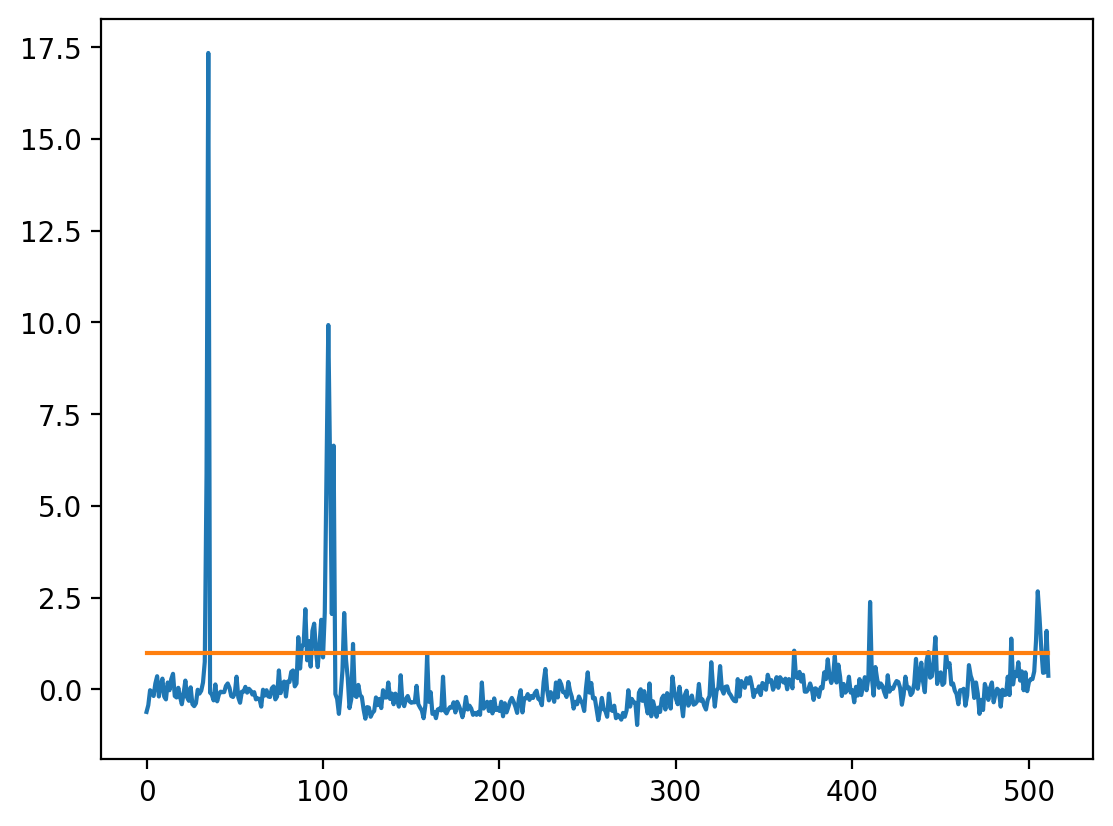

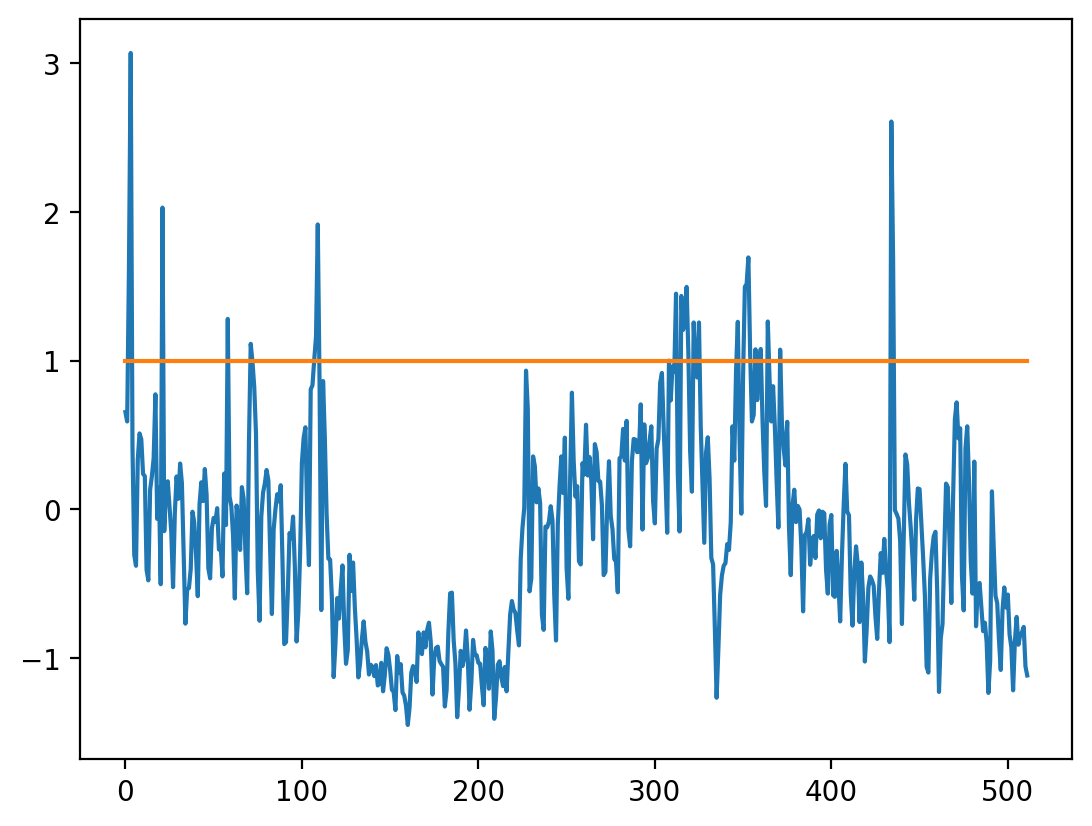

KeyboardInterrupt: 

In [24]:
max_seq_length = 512
batch_size = 64

train_dataset = TimeSeriesDataset(training_data_list, max_seq_length, train_masks)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

k = 0

for batch in train_dataloader:
    if k % 1 == 0:
        train, true, mask = batch
        plt.plot(train[0])
        # plt.plot(true[0])
        plt.plot(mask[0])
        plt.show()
        k += 1